In [7]:
%load_ext lab_black

# Jupyter notebook to plot petrological rock catalogue  


This notebook plot density and susceptibility relationship and boxplots for all rock samples devided by formation and rock type.

#### jupyter notebook written by Maximilian Lowe (maxwe32@bas.ac.uk). Last update 05/03/2024

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from cmcrameri import cm
import os
import cartopy.crs as ccrs
from shapely.geometry.polygon import Polygon

In [2]:
export_fig_path_NAPA = "Petrological_data/Figure/"
# Create path if it does not exists
if not os.path.exists(export_fig_path_NAPA):
    os.makedirs(export_fig_path_NAPA)

# load data

In [39]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

NAPA_measurments_df = pd.read_csv(
    "Petrological_data/Density_and_susceptibility_rock_sample_catalogue_northern_Victoria_Land_East_Antarctica.csv",
    skiprows=43,
)

NAPA_measurments_df["susceptibility_1 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_1 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_2 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_2 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_3 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_3 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_4 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_4 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_5 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_5 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_6 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_6 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_7 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_7 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_8 (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_8 (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_average (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_average (10-3 SI)"] * 1e-3
)
NAPA_measurments_df["susceptibility_std (10-3 SI)"] = (
    NAPA_measurments_df["susceptibility_std (10-3 SI)"] * 1e-3
)

filename = "DATA/GeoMap_Coastline_df.geojson"
file = open(filename)
Coastline = gpd.read_file(file)

# Sorted by formation

#### Berg Group

In [50]:
NAPA_Berg_Group_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Berg Group")
]

NAPA_Berg_Group_density_mean = np.mean(NAPA_Berg_Group_df["density (g/cm^3)"])
NAPA_Berg_Group_density_std = np.std(NAPA_Berg_Group_df["density (g/cm^3)"])
NAPA_Berg_Group_sus_mean = np.mean(
    NAPA_Berg_Group_df["susceptibility_average (10-3 SI)"]
)
NAPA_Berg_Group_sus_std = np.std(NAPA_Berg_Group_df["susceptibility_average (10-3 SI)"])

# create geopanda dataframe
NAPA_Berg_Group_gpdf = gpd.GeoDataFrame(
    NAPA_Berg_Group_df,
    geometry=gpd.points_from_xy(
        NAPA_Berg_Group_df["lon_decimal (degree_east)"],
        NAPA_Berg_Group_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Berg_Group_ps_gpdf = NAPA_Berg_Group_gpdf.to_crs(3031)

#### Bowers Supergroup

In [67]:
NAPA_Bowers_Supergroup_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Bowers Supergroup")
]

NAPA_Bowers_Supergroup_density_mean = np.mean(
    NAPA_Bowers_Supergroup_df["density (g/cm^3)"]
)
NAPA_Bowers_Supergroup_density_std = np.std(
    NAPA_Bowers_Supergroup_df["density (g/cm^3)"]
)
NAPA_Bowers_Supergroup_sus_mean = np.mean(
    NAPA_Bowers_Supergroup_df["susceptibility_average (10-3 SI)"]
)
NAPA_Bowers_Supergroup_sus_std = np.std(
    NAPA_Bowers_Supergroup_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Bowers_Supergroup_gpdf = gpd.GeoDataFrame(
    NAPA_Bowers_Supergroup_df,
    geometry=gpd.points_from_xy(
        NAPA_Bowers_Supergroup_df["lon_decimal (degree_east)"],
        NAPA_Bowers_Supergroup_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Bowers_Supergroup_ps_gpdf = NAPA_Bowers_Supergroup_gpdf.to_crs(3031)

#### Exposure Hill type deposits

In [72]:
NAPA_Exposure_Hill_type_deposits_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Exposure Hill type deposits")
]


NAPA_Exposure_Hill_type_deposits_density_mean = np.mean(
    NAPA_Exposure_Hill_type_deposits_df["density (g/cm^3)"]
)
NAPA_Exposure_Hill_type_deposits_density_std = np.std(
    NAPA_Exposure_Hill_type_deposits_df["density (g/cm^3)"]
)
NAPA_Exposure_Hill_type_deposits_sus_mean = np.mean(
    NAPA_Exposure_Hill_type_deposits_df["susceptibility_average (10-3 SI)"]
)
NAPA_Exposure_Hill_type_deposits_sus_std = np.std(
    NAPA_Exposure_Hill_type_deposits_df["susceptibility_average (10-3 SI)"]
)

# create geopanda dataframe
NAPA_Exposure_Hill_type_deposits_gpdf = gpd.GeoDataFrame(
    NAPA_Exposure_Hill_type_deposits_df,
    geometry=gpd.points_from_xy(
        NAPA_Exposure_Hill_type_deposits_df["lon_decimal (degree_east)"],
        NAPA_Exposure_Hill_type_deposits_df["lat_decimal (degree_north)"],
    ),
    crs="EPSG:4326",
)

# reproject geopanda dataframe to sterographic coordinates
NAPA_Exposure_Hill_type_deposits_ps_gpdf = NAPA_Exposure_Hill_type_deposits_gpdf.to_crs(
    3031
)

#### Ferrar

In [7]:
NAPA_Ferrar_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Ferrar Dolerites")
    | (NAPA_measurments_df["stratigraphy"] == "Ferrar Dolerite")
]


NAPA_Ferrar_density_mean = np.mean(NAPA_Ferrar_df["density [g/cm^3]"])
NAPA_Ferrar_density_std = np.std(NAPA_Ferrar_df["density [g/cm^3]"])
NAPA_Ferrar_sus_mean = np.mean(NAPA_Ferrar_df["susceptibility average [10-3 SI]"])
NAPA_Ferrar_sus_std = np.std(NAPA_Ferrar_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Ferrar_df["longitude"]
latitude_pd = NAPA_Ferrar_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Ferrar_df), 1))
lat_decimal = np.zeros((len(NAPA_Ferrar_df), 1))

for i in range(len(NAPA_Ferrar_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Ferrar_df = NAPA_Ferrar_df.assign(longitude_deg=lon_decimal)
NAPA_Ferrar_df = NAPA_Ferrar_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Ferrar_gpdf = gpd.GeoDataFrame(
    NAPA_Ferrar_df,
    geometry=gpd.points_from_xy(
        NAPA_Ferrar_df.longitude_deg, NAPA_Ferrar_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Ferrar_ps_gpdf = NAPA_Ferrar_gpdf.to_crs(3031)

#### Granite Harbour Intrusives

In [8]:
NAPA_GHI_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Granite Harbour Intrusives")
]


NAPA_GHI_density_mean = np.mean(NAPA_GHI_df["density [g/cm^3]"])
NAPA_GHI_density_std = np.std(NAPA_GHI_df["density [g/cm^3]"])
NAPA_GHI_sus_mean = np.mean(NAPA_GHI_df["susceptibility average [10-3 SI]"])
NAPA_GHI_sus_std = np.std(NAPA_GHI_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_GHI_df["longitude"]
latitude_pd = NAPA_GHI_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_GHI_df), 1))
lat_decimal = np.zeros((len(NAPA_GHI_df), 1))

for i in range(len(NAPA_GHI_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_GHI_df = NAPA_GHI_df.assign(longitude_deg=lon_decimal)
NAPA_GHI_df = NAPA_GHI_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_GHI_gpdf = gpd.GeoDataFrame(
    NAPA_GHI_df,
    geometry=gpd.points_from_xy(NAPA_GHI_df.longitude_deg, NAPA_GHI_df.latitude_deg),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_GHI_ps_gpdf = NAPA_GHI_gpdf.to_crs(3031)

print("GHI density mean: ", NAPA_GHI_density_mean)
print("GHI density std: ", NAPA_GHI_density_std)

print("GHI sus mean: ", NAPA_GHI_sus_mean)
print("GHI sus std: ", NAPA_GHI_sus_std)

GHI density mean:  2.6808591549295766
GHI density std:  0.17623769926306737
GHI sus mean:  0.0031463996478873235
GHI sus std:  0.006981043219150668


#### Kirkpatrick Basalts

In [9]:
NAPA_Kirkpatrick_Basalts_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Kirkpatrick Basalts")
    | (NAPA_measurments_df["stratigraphy"] == "Kirkpatrick Laven")
]


NAPA_Kirkpatrick_Basalts_density_mean = np.mean(
    NAPA_Kirkpatrick_Basalts_df["density [g/cm^3]"]
)
NAPA_Kirkpatrick_Basalts_density_std = np.std(
    NAPA_Kirkpatrick_Basalts_df["density [g/cm^3]"]
)
NAPA_Kirkpatrick_Basalts_sus_mean = np.mean(
    NAPA_Kirkpatrick_Basalts_df["susceptibility average [10-3 SI]"]
)
NAPA_Kirkpatrick_Basalts_sus_std = np.std(
    NAPA_Kirkpatrick_Basalts_df["susceptibility average [10-3 SI]"]
)


## convert lon lat to decimal
longitude_pd = NAPA_Kirkpatrick_Basalts_df["longitude"]
latitude_pd = NAPA_Kirkpatrick_Basalts_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Kirkpatrick_Basalts_df), 1))
lat_decimal = np.zeros((len(NAPA_Kirkpatrick_Basalts_df), 1))

for i in range(len(NAPA_Kirkpatrick_Basalts_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Kirkpatrick_Basalts_df = NAPA_Kirkpatrick_Basalts_df.assign(
    longitude_deg=lon_decimal
)
NAPA_Kirkpatrick_Basalts_df = NAPA_Kirkpatrick_Basalts_df.assign(
    latitude_deg=lat_decimal
)

## create geopanda dataframe
NAPA_Kirkpatrick_Basalts_gpdf = gpd.GeoDataFrame(
    NAPA_Kirkpatrick_Basalts_df,
    geometry=gpd.points_from_xy(
        NAPA_Kirkpatrick_Basalts_df.longitude_deg,
        NAPA_Kirkpatrick_Basalts_df.latitude_deg,
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Kirkpatrick_Basalts_ps_gpdf = NAPA_Kirkpatrick_Basalts_gpdf.to_crs(3031)

print("KPB density mean: ", NAPA_Kirkpatrick_Basalts_density_mean)
print("KPB density std: ", NAPA_Kirkpatrick_Basalts_density_std)

print("KPB sus mean: ", NAPA_Kirkpatrick_Basalts_sus_mean)
print("KPB sus std: ", NAPA_Kirkpatrick_Basalts_sus_std)

KPB density mean:  2.6852586206896554
KPB density std:  0.2055574053845843
KPB sus mean:  0.006189611853448276
KPB sus std:  0.0058036960730877205


#### Meander Intrusives

In [10]:
NAPA_Meander_Intrusives_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Meander Intrusives")
]

NAPA_Meander_Intrusives_density_mean = np.mean(
    NAPA_Meander_Intrusives_df["density [g/cm^3]"]
)
NAPA_Meander_Intrusives_density_std = np.std(
    NAPA_Meander_Intrusives_df["density [g/cm^3]"]
)
NAPA_Meander_Intrusives_sus_mean = np.mean(
    NAPA_Meander_Intrusives_df["susceptibility average [10-3 SI]"]
)
NAPA_Meander_Intrusives_sus_std = np.std(
    NAPA_Meander_Intrusives_df["susceptibility average [10-3 SI]"]
)

## convert lon lat to decimal
longitude_pd = NAPA_Meander_Intrusives_df["longitude"]
latitude_pd = NAPA_Meander_Intrusives_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Meander_Intrusives_df), 1))
lat_decimal = np.zeros((len(NAPA_Meander_Intrusives_df), 1))

for i in range(len(NAPA_Meander_Intrusives_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Meander_Intrusives_df = NAPA_Meander_Intrusives_df.assign(
    longitude_deg=lon_decimal
)
NAPA_Meander_Intrusives_df = NAPA_Meander_Intrusives_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Meander_Intrusives_gpdf = gpd.GeoDataFrame(
    NAPA_Meander_Intrusives_df,
    geometry=gpd.points_from_xy(
        NAPA_Meander_Intrusives_df.longitude_deg,
        NAPA_Meander_Intrusives_df.latitude_deg,
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Meander_Intrusives_ps_gpdf = NAPA_Meander_Intrusives_gpdf.to_crs(3031)

#### Oates Coast Granites 

In [11]:
NAPA_Oates_Coast_Granites_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Oates Coast Granites")
]


NAPA_Oates_Coast_Granites_density_mean = np.mean(
    NAPA_Oates_Coast_Granites_df["density [g/cm^3]"]
)
NAPA_Oates_Coast_Granites_density_std = np.std(
    NAPA_Oates_Coast_Granites_df["density [g/cm^3]"]
)
NAPA_Oates_Coast_Granites_sus_mean = np.mean(
    NAPA_Oates_Coast_Granites_df["susceptibility average [10-3 SI]"]
)
NAPA_Oates_Coast_Granites_sus_std = np.std(
    NAPA_Oates_Coast_Granites_df["susceptibility average [10-3 SI]"]
)


## convert lon lat to decimal
longitude_pd = NAPA_Oates_Coast_Granites_df["longitude"]
latitude_pd = NAPA_Oates_Coast_Granites_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Oates_Coast_Granites_df), 1))
lat_decimal = np.zeros((len(NAPA_Oates_Coast_Granites_df), 1))

for i in range(len(NAPA_Oates_Coast_Granites_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Oates_Coast_Granites_df = NAPA_Oates_Coast_Granites_df.assign(
    longitude_deg=lon_decimal
)
NAPA_Oates_Coast_Granites_df = NAPA_Oates_Coast_Granites_df.assign(
    latitude_deg=lat_decimal
)

## create geopanda dataframe
NAPA_Oates_Coast_Granites_gpdf = gpd.GeoDataFrame(
    NAPA_Oates_Coast_Granites_df,
    geometry=gpd.points_from_xy(
        NAPA_Oates_Coast_Granites_df.longitude_deg,
        NAPA_Oates_Coast_Granites_df.latitude_deg,
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Oates_Coast_Granites_ps_gpdf = NAPA_Oates_Coast_Granites_gpdf.to_crs(3031)

#### Robertson Bay Group

In [12]:
NAPA_Robertson_Bay_Group_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Robertson Bay Group")
]


NAPA_Robertson_Bay_Group_density_mean = np.mean(
    NAPA_Robertson_Bay_Group_df["density [g/cm^3]"]
)
NAPA_Robertson_Bay_Group_density_std = np.std(
    NAPA_Robertson_Bay_Group_df["density [g/cm^3]"]
)
NAPA_Robertson_Bay_Group_sus_mean = np.mean(
    NAPA_Robertson_Bay_Group_df["susceptibility average [10-3 SI]"]
)
NAPA_Robertson_Bay_Group_sus_std = np.std(
    NAPA_Robertson_Bay_Group_df["susceptibility average [10-3 SI]"]
)


## convert lon lat to decimal
longitude_pd = NAPA_Robertson_Bay_Group_df["longitude"]
latitude_pd = NAPA_Robertson_Bay_Group_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Robertson_Bay_Group_df), 1))
lat_decimal = np.zeros((len(NAPA_Robertson_Bay_Group_df), 1))

for i in range(len(NAPA_Robertson_Bay_Group_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Robertson_Bay_Group_df = NAPA_Robertson_Bay_Group_df.assign(
    longitude_deg=lon_decimal
)
NAPA_Robertson_Bay_Group_df = NAPA_Robertson_Bay_Group_df.assign(
    latitude_deg=lat_decimal
)

## create geopanda dataframe
NAPA_Robertson_Bay_Group_gpdf = gpd.GeoDataFrame(
    NAPA_Robertson_Bay_Group_df,
    geometry=gpd.points_from_xy(
        NAPA_Robertson_Bay_Group_df.longitude_deg,
        NAPA_Robertson_Bay_Group_df.latitude_deg,
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Robertson_Bay_Group_ps_gpdf = NAPA_Robertson_Bay_Group_gpdf.to_crs(3031)

#### Wilson Metamorphic Complex

In [13]:
NAPA_Wilson_Metamorphic_Complex_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Wilson Metamorphic Complex")
]

NAPA_Wilson_Metamorphic_Complex_density_mean = np.mean(
    NAPA_Wilson_Metamorphic_Complex_df["density [g/cm^3]"]
)
NAPA_Wilson_Metamorphic_Complex_density_std = np.std(
    NAPA_Wilson_Metamorphic_Complex_df["density [g/cm^3]"]
)
NAPA_Wilson_Metamorphic_Complex_sus_mean = np.mean(
    NAPA_Wilson_Metamorphic_Complex_df["susceptibility average [10-3 SI]"]
)
NAPA_Wilson_Metamorphic_Complex_sus_std = np.std(
    NAPA_Wilson_Metamorphic_Complex_df["susceptibility average [10-3 SI]"]
)


## convert lon lat to decimal
longitude_pd = NAPA_Wilson_Metamorphic_Complex_df["longitude"]
latitude_pd = NAPA_Wilson_Metamorphic_Complex_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Wilson_Metamorphic_Complex_df), 1))
lat_decimal = np.zeros((len(NAPA_Wilson_Metamorphic_Complex_df), 1))

for i in range(len(NAPA_Wilson_Metamorphic_Complex_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Wilson_Metamorphic_Complex_df = NAPA_Wilson_Metamorphic_Complex_df.assign(
    longitude_deg=lon_decimal
)
NAPA_Wilson_Metamorphic_Complex_df = NAPA_Wilson_Metamorphic_Complex_df.assign(
    latitude_deg=lat_decimal
)

## create geopanda dataframe
NAPA_Wilson_Metamorphic_Complex_gpdf = gpd.GeoDataFrame(
    NAPA_Wilson_Metamorphic_Complex_df,
    geometry=gpd.points_from_xy(
        NAPA_Wilson_Metamorphic_Complex_df.longitude_deg,
        NAPA_Wilson_Metamorphic_Complex_df.latitude_deg,
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Wilson_Metamorphic_Complex_ps_gpdf = NAPA_Wilson_Metamorphic_Complex_gpdf.to_crs(
    3031
)

#### Wilson Polymetamorphic Complex

In [14]:
NAPA_Wilson_Polymetamorphic_Complex_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Wilson Polymetamorphic Complex")
]


NAPA_Wilson_Polymetamorphic_Complex_density_mean = np.mean(
    NAPA_Wilson_Polymetamorphic_Complex_df["density [g/cm^3]"]
)
NAPA_Wilson_Polymetamorphic_Complex_density_std = np.std(
    NAPA_Wilson_Polymetamorphic_Complex_df["density [g/cm^3]"]
)
NAPA_Wilson_Polymetamorphic_Complex_sus_mean = np.mean(
    NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility average [10-3 SI]"]
)
NAPA_Wilson_Polymetamorphic_Complex_sus_std = np.std(
    NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility average [10-3 SI]"]
)


## convert lon lat to decimal
longitude_pd = NAPA_Wilson_Polymetamorphic_Complex_df["longitude"]
latitude_pd = NAPA_Wilson_Polymetamorphic_Complex_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Wilson_Polymetamorphic_Complex_df), 1))
lat_decimal = np.zeros((len(NAPA_Wilson_Polymetamorphic_Complex_df), 1))

for i in range(len(NAPA_Wilson_Polymetamorphic_Complex_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Wilson_Polymetamorphic_Complex_df = NAPA_Wilson_Polymetamorphic_Complex_df.assign(
    longitude_deg=lon_decimal
)
NAPA_Wilson_Polymetamorphic_Complex_df = NAPA_Wilson_Polymetamorphic_Complex_df.assign(
    latitude_deg=lat_decimal
)

## create geopanda dataframe
NAPA_Wilson_Polymetamorphic_Complex_gpdf = gpd.GeoDataFrame(
    NAPA_Wilson_Polymetamorphic_Complex_df,
    geometry=gpd.points_from_xy(
        NAPA_Wilson_Polymetamorphic_Complex_df.longitude_deg,
        NAPA_Wilson_Polymetamorphic_Complex_df.latitude_deg,
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf = (
    NAPA_Wilson_Polymetamorphic_Complex_gpdf.to_crs(3031)
)

#### Wilson Schist

In [15]:
NAPA_Wilson_Schist_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Wilson Schist")
]


NAPA_Wilson_Schist_density_mean = np.mean(NAPA_Wilson_Schist_df["density [g/cm^3]"])
NAPA_Wilson_Schist_density_std = np.std(NAPA_Wilson_Schist_df["density [g/cm^3]"])
NAPA_Wilson_Schist_sus_mean = np.mean(
    NAPA_Wilson_Schist_df["susceptibility average [10-3 SI]"]
)
NAPA_Wilson_Schist_sus_std = np.std(
    NAPA_Wilson_Schist_df["susceptibility average [10-3 SI]"]
)


## convert lon lat to decimal
longitude_pd = NAPA_Wilson_Schist_df["longitude"]
latitude_pd = NAPA_Wilson_Schist_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Wilson_Schist_df), 1))
lat_decimal = np.zeros((len(NAPA_Wilson_Schist_df), 1))

for i in range(len(NAPA_Wilson_Schist_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Wilson_Schist_df = NAPA_Wilson_Schist_df.assign(longitude_deg=lon_decimal)
NAPA_Wilson_Schist_df = NAPA_Wilson_Schist_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Wilson_Schist_gpdf = gpd.GeoDataFrame(
    NAPA_Wilson_Schist_df,
    geometry=gpd.points_from_xy(
        NAPA_Wilson_Schist_df.longitude_deg, NAPA_Wilson_Schist_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Wilson_Schist_ps_gpdf = NAPA_Wilson_Schist_gpdf.to_crs(3031)

#### Millen Schist

In [16]:
NAPA_Millen_Schist_df = NAPA_measurments_df[
    (NAPA_measurments_df["stratigraphy"] == "Millen Schist")
]


NAPA_Millen_Schist_density_mean = np.mean(NAPA_Millen_Schist_df["density [g/cm^3]"])
NAPA_Millen_Schist_density_std = np.std(NAPA_Millen_Schist_df["density [g/cm^3]"])
NAPA_Millen_Schist_sus_mean = np.mean(
    NAPA_Millen_Schist_df["susceptibility average [10-3 SI]"]
)
NAPA_Millen_Schist_sus_std = np.std(
    NAPA_Millen_Schist_df["susceptibility average [10-3 SI]"]
)


## convert lon lat to decimal
longitude_pd = NAPA_Millen_Schist_df["longitude"]
latitude_pd = NAPA_Millen_Schist_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Millen_Schist_df), 1))
lat_decimal = np.zeros((len(NAPA_Millen_Schist_df), 1))

for i in range(len(NAPA_Millen_Schist_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Millen_Schist_df = NAPA_Millen_Schist_df.assign(longitude_deg=lon_decimal)
NAPA_Millen_Schist_df = NAPA_Millen_Schist_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Millen_Schist_gpdf = gpd.GeoDataFrame(
    NAPA_Millen_Schist_df,
    geometry=gpd.points_from_xy(
        NAPA_Millen_Schist_df.longitude_deg, NAPA_Millen_Schist_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Millen_Schist_ps_gpdf = NAPA_Millen_Schist_gpdf.to_crs(3031)

# Plot rock formation data

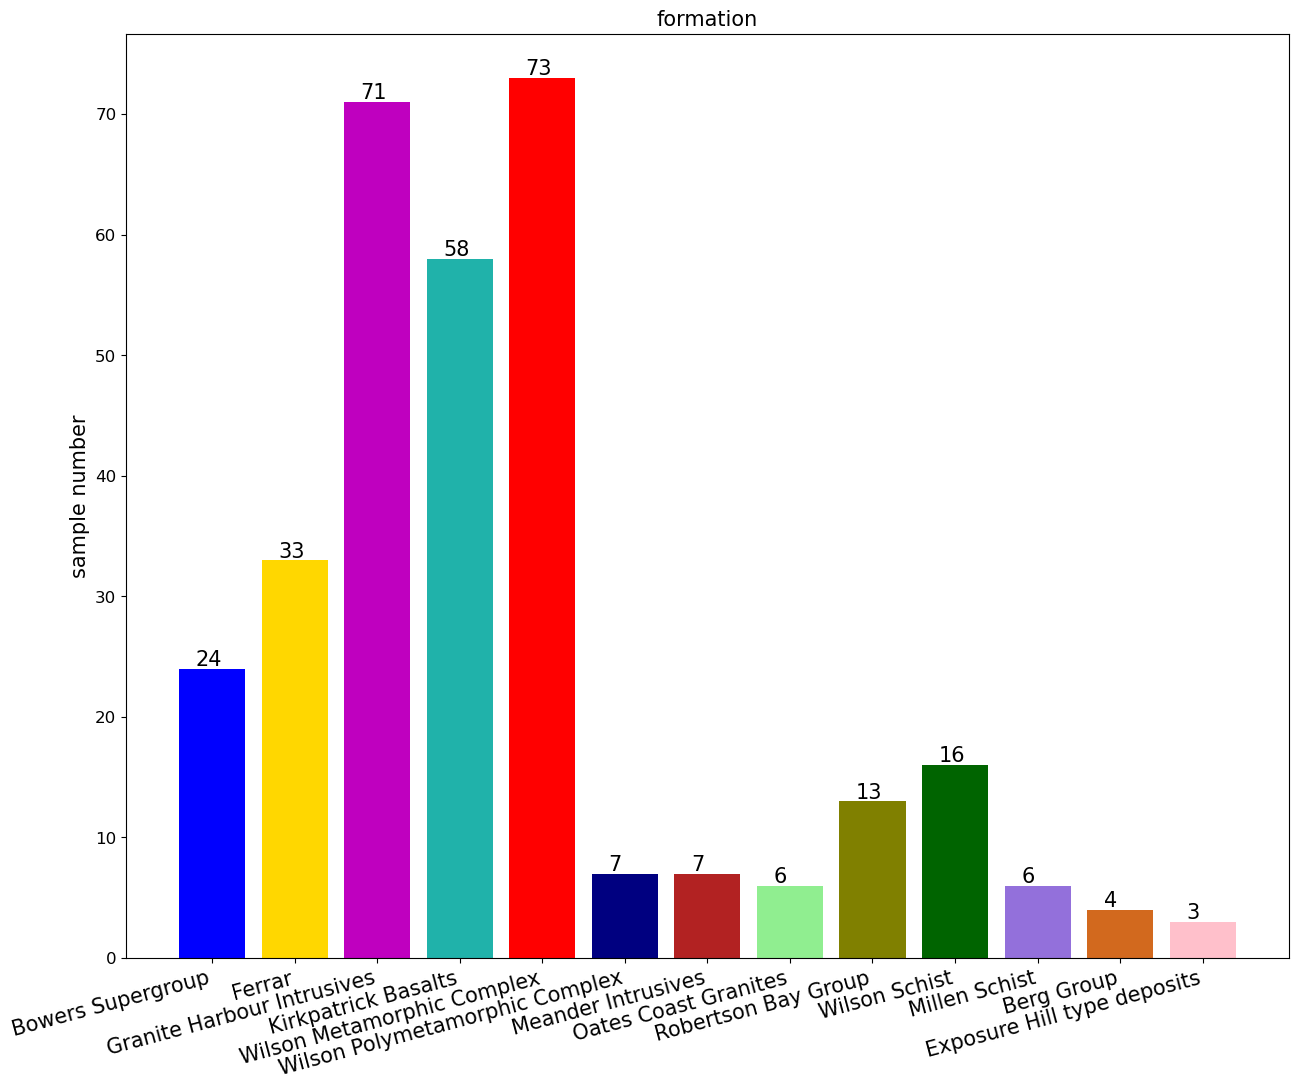

In [17]:
x_category = [
    "Bowers Supergroup",
    "Ferrar",
    "Granite Harbour Intrusives",
    "Kirkpatrick Basalts",
    "Wilson Metamorphic Complex",
    "Wilson Polymetamorphic Complex",
    "Meander Intrusives",
    "Oates Coast Granites",
    "Robertson Bay Group",
    "Wilson Schist",
    "Millen Schist",
    "Berg Group",
    "Exposure Hill type deposits",
]

y_sample_num = [
    len(NAPA_Bowers_Supergroup_df),
    len(NAPA_Ferrar_df),
    len(NAPA_GHI_df),
    len(NAPA_Kirkpatrick_Basalts_df),
    len(NAPA_Wilson_Metamorphic_Complex_df),
    len(NAPA_Wilson_Polymetamorphic_Complex_df),
    len(NAPA_Meander_Intrusives_df),
    len(NAPA_Oates_Coast_Granites_df),
    len(NAPA_Robertson_Bay_Group_df),
    len(NAPA_Wilson_Schist_df),
    len(NAPA_Millen_Schist_df),
    len(NAPA_Berg_Group_df),
    len(NAPA_Exposure_Hill_type_deposits_df),
]

# plot
figure1 = plt.figure(figsize=(15, 12), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

plt.bar(
    x_category,
    y_sample_num,
    color=[
        "blue",
        "gold",
        "m",
        "lightseagreen",
        "red",
        "navy",
        "firebrick",
        "lightgreen",
        "olive",
        "darkgreen",
        "mediumpurple",
        "chocolate",
        "pink",
    ],
)

plt.title("formation", fontsize=15)
plt.ylabel("sample number", fontsize=15)
plt.setp(ax1.get_xticklabels(), rotation=15, ha="right")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.xaxis.set_tick_params(labelsize=15)
# ax1.grid(visible=True, which='major' ,axis='y' , color='k', linestyle='-' , alpha=0.35)

for p in ax1.patches:
    ax1.annotate(
        "{:.0f}".format(p.get_height()),
        (p.get_x() + 0.20, p.get_height() + 0.25),
        fontsize=15,
    )

plt.savefig(
    export_fig_path_NAPA + "sample_histogramm_formation.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

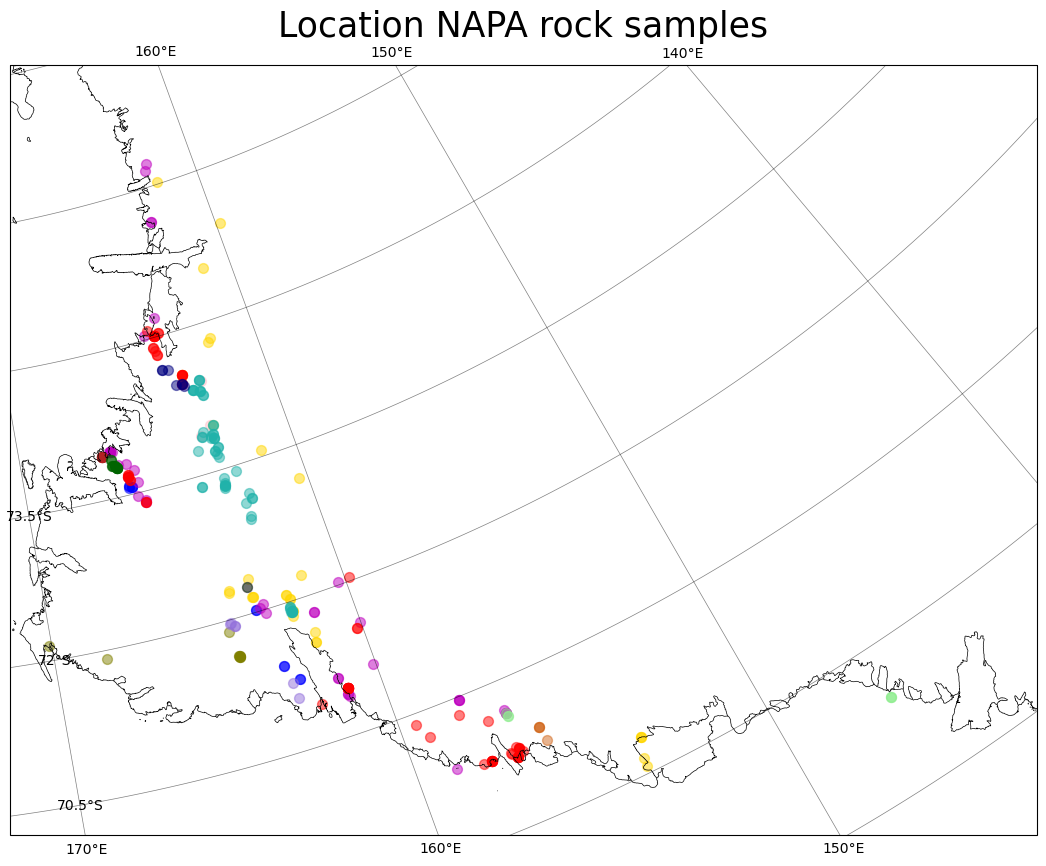

In [18]:
makersize_ix = 15

# create figure
figure1 = plt.figure(figsize=(15, 10), facecolor="white")

# subplot BA gravity data
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
plt.title("Location NAPA rock samples", fontsize=25)


NAPA_Berg_Group_ps_gpdf.plot(
    ax=ax1, marker="o", color="chocolate", markersize=50, alpha=0.5, label="Berg Group"
)

NAPA_Bowers_Supergroup_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="blue",
    markersize=50,
    alpha=0.5,
    label="Bowers Supergroup",
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="pink",
    markersize=50,
    alpha=0.5,
    label="Exposure Hill type deposits",
)

NAPA_Ferrar_ps_gpdf.plot(
    ax=ax1, marker="o", color="gold", markersize=50, alpha=0.5, label="Ferrar"
)

NAPA_GHI_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="m",
    markersize=50,
    alpha=0.5,
    label="Granite Harbour Intrusives",
)

NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="lightseagreen",
    markersize=50,
    alpha=0.5,
    label="Kirkpatrick Basalts",
)

NAPA_Meander_Intrusives_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="firebrick",
    markersize=50,
    alpha=0.5,
    label="Meander Intrusives",
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="lightgreen",
    markersize=50,
    alpha=0.5,
    label="Oates Coast Granites",
)

NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="olive",
    markersize=50,
    alpha=0.5,
    label="Robertson Bay Group",
)

NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="red",
    markersize=50,
    alpha=0.5,
    label="Wilson Metamorphic Complex",
)

NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="navy",
    markersize=50,
    alpha=0.5,
    label="Wilson Polymetamorphic",
)

NAPA_Wilson_Schist_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="darkgreen",
    markersize=50,
    alpha=0.5,
    label="Wilson Schist",
)

NAPA_Millen_Schist_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="mediumpurple",
    markersize=50,
    alpha=0.5,
    label="Millen Schist",
)

ax1.set_xlim([0.3e6, 1.5e6])
ax1.set_ylim([-2.2e6, -1.3e6])

# ax1.legend(loc='upper right')
ax1.gridlines(
    linewidth=0.5,
    draw_labels=True,
    color="k",
    alpha=0.5,
    linestyle="-",
    rotate_labels=0,
)
Coastline.plot(ax=ax1, color="k", linewidth=0.5)
plt.savefig(
    export_fig_path_NAPA + "formation_location_zoom_paper.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

#### Susceptibility box plots

In [19]:
Berg_Group_all_sus_NAPA = np.vstack(
    [
        NAPA_Berg_Group_df["susceptibility 1 [10-3 SI]"],
        NAPA_Berg_Group_df["susceptibility 2 [10-3 SI]"],
        NAPA_Berg_Group_df["susceptibility 3 [10-3 SI]"],
        NAPA_Berg_Group_df["susceptibility 4 [10-3 SI]"],
        NAPA_Berg_Group_df["susceptibility 5 [10-3 SI]"],
        NAPA_Berg_Group_df["susceptibility 6 [10-3 SI]"],
        NAPA_Berg_Group_df["susceptibility 7 [10-3 SI]"],
        NAPA_Berg_Group_df["susceptibility 8 [10-3 SI]"],
    ]
).T

Bowers_Supergroup_all_sus_NAPA = np.vstack(
    [
        NAPA_Bowers_Supergroup_df["susceptibility 1 [10-3 SI]"],
        NAPA_Bowers_Supergroup_df["susceptibility 2 [10-3 SI]"],
        NAPA_Bowers_Supergroup_df["susceptibility 3 [10-3 SI]"],
        NAPA_Bowers_Supergroup_df["susceptibility 4 [10-3 SI]"],
        NAPA_Bowers_Supergroup_df["susceptibility 5 [10-3 SI]"],
        NAPA_Bowers_Supergroup_df["susceptibility 6 [10-3 SI]"],
        NAPA_Bowers_Supergroup_df["susceptibility 7 [10-3 SI]"],
        NAPA_Bowers_Supergroup_df["susceptibility 8 [10-3 SI]"],
    ]
).T

Exposure_Hill_type_deposits_all_sus_NAPA = np.vstack(
    [
        NAPA_Exposure_Hill_type_deposits_df["susceptibility 1 [10-3 SI]"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility 2 [10-3 SI]"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility 3 [10-3 SI]"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility 4 [10-3 SI]"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility 5 [10-3 SI]"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility 6 [10-3 SI]"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility 7 [10-3 SI]"],
        NAPA_Exposure_Hill_type_deposits_df["susceptibility 8 [10-3 SI]"],
    ]
).T

Ferrar_all_sus_NAPA = np.vstack(
    [
        NAPA_Ferrar_df["susceptibility 1 [10-3 SI]"],
        NAPA_Ferrar_df["susceptibility 2 [10-3 SI]"],
        NAPA_Ferrar_df["susceptibility 3 [10-3 SI]"],
        NAPA_Ferrar_df["susceptibility 4 [10-3 SI]"],
        NAPA_Ferrar_df["susceptibility 5 [10-3 SI]"],
        NAPA_Ferrar_df["susceptibility 6 [10-3 SI]"],
        NAPA_Ferrar_df["susceptibility 7 [10-3 SI]"],
        NAPA_Ferrar_df["susceptibility 8 [10-3 SI]"],
    ]
).T

Granite_Harbour_Intrusives_all_sus_NAPA = np.vstack(
    [
        NAPA_GHI_df["susceptibility 1 [10-3 SI]"],
        NAPA_GHI_df["susceptibility 2 [10-3 SI]"],
        NAPA_GHI_df["susceptibility 3 [10-3 SI]"],
        NAPA_GHI_df["susceptibility 4 [10-3 SI]"],
        NAPA_GHI_df["susceptibility 5 [10-3 SI]"],
        NAPA_GHI_df["susceptibility 6 [10-3 SI]"],
        NAPA_GHI_df["susceptibility 7 [10-3 SI]"],
        NAPA_GHI_df["susceptibility 8 [10-3 SI]"],
    ]
).T

Kirkpatrick_Basalts_all_sus_NAPA = np.vstack(
    [
        NAPA_Kirkpatrick_Basalts_df["susceptibility 1 [10-3 SI]"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility 2 [10-3 SI]"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility 3 [10-3 SI]"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility 4 [10-3 SI]"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility 5 [10-3 SI]"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility 6 [10-3 SI]"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility 7 [10-3 SI]"],
        NAPA_Kirkpatrick_Basalts_df["susceptibility 8 [10-3 SI]"],
    ]
).T

Meander_Intrusives_all_sus_NAPA = np.vstack(
    [
        NAPA_Meander_Intrusives_df["susceptibility 1 [10-3 SI]"],
        NAPA_Meander_Intrusives_df["susceptibility 2 [10-3 SI]"],
        NAPA_Meander_Intrusives_df["susceptibility 3 [10-3 SI]"],
        NAPA_Meander_Intrusives_df["susceptibility 4 [10-3 SI]"],
        NAPA_Meander_Intrusives_df["susceptibility 5 [10-3 SI]"],
        NAPA_Meander_Intrusives_df["susceptibility 6 [10-3 SI]"],
        NAPA_Meander_Intrusives_df["susceptibility 7 [10-3 SI]"],
        NAPA_Meander_Intrusives_df["susceptibility 8 [10-3 SI]"],
    ]
).T

NAPA_Oates_Coast_Granites_all_sus_NAPA = np.vstack(
    [
        NAPA_Oates_Coast_Granites_df["susceptibility 1 [10-3 SI]"],
        NAPA_Oates_Coast_Granites_df["susceptibility 2 [10-3 SI]"],
        NAPA_Oates_Coast_Granites_df["susceptibility 3 [10-3 SI]"],
        NAPA_Oates_Coast_Granites_df["susceptibility 4 [10-3 SI]"],
        NAPA_Oates_Coast_Granites_df["susceptibility 5 [10-3 SI]"],
        NAPA_Oates_Coast_Granites_df["susceptibility 6 [10-3 SI]"],
        NAPA_Oates_Coast_Granites_df["susceptibility 7 [10-3 SI]"],
        NAPA_Oates_Coast_Granites_df["susceptibility 8 [10-3 SI]"],
    ]
).T

Robertson_Bay_Group_all_sus_NAPA = np.vstack(
    [
        NAPA_Robertson_Bay_Group_df["susceptibility 1 [10-3 SI]"],
        NAPA_Robertson_Bay_Group_df["susceptibility 2 [10-3 SI]"],
        NAPA_Robertson_Bay_Group_df["susceptibility 3 [10-3 SI]"],
        NAPA_Robertson_Bay_Group_df["susceptibility 4 [10-3 SI]"],
        NAPA_Robertson_Bay_Group_df["susceptibility 5 [10-3 SI]"],
        NAPA_Robertson_Bay_Group_df["susceptibility 6 [10-3 SI]"],
        NAPA_Robertson_Bay_Group_df["susceptibility 7 [10-3 SI]"],
        NAPA_Robertson_Bay_Group_df["susceptibility 8 [10-3 SI]"],
    ]
).T

Wilson_Metamorphic_Complex_all_sus_NAPA = np.vstack(
    [
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility 1 [10-3 SI]"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility 2 [10-3 SI]"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility 3 [10-3 SI]"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility 4 [10-3 SI]"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility 5 [10-3 SI]"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility 6 [10-3 SI]"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility 7 [10-3 SI]"],
        NAPA_Wilson_Metamorphic_Complex_df["susceptibility 8 [10-3 SI]"],
    ]
).T

Wilson_Polymetamorphic_Complex_all_sus_NAPA = np.vstack(
    [
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility 1 [10-3 SI]"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility 2 [10-3 SI]"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility 3 [10-3 SI]"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility 4 [10-3 SI]"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility 5 [10-3 SI]"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility 6 [10-3 SI]"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility 7 [10-3 SI]"],
        NAPA_Wilson_Polymetamorphic_Complex_df["susceptibility 8 [10-3 SI]"],
    ]
).T

Wilson_Schist_all_sus_NAPA = np.vstack(
    [
        NAPA_Wilson_Schist_df["susceptibility 1 [10-3 SI]"],
        NAPA_Wilson_Schist_df["susceptibility 2 [10-3 SI]"],
        NAPA_Wilson_Schist_df["susceptibility 3 [10-3 SI]"],
        NAPA_Wilson_Schist_df["susceptibility 4 [10-3 SI]"],
        NAPA_Wilson_Schist_df["susceptibility 5 [10-3 SI]"],
        NAPA_Wilson_Schist_df["susceptibility 6 [10-3 SI]"],
        NAPA_Wilson_Schist_df["susceptibility 7 [10-3 SI]"],
        NAPA_Wilson_Schist_df["susceptibility 8 [10-3 SI]"],
    ]
).T

Millen_Schist_all_sus_NAPA = np.vstack(
    [
        NAPA_Millen_Schist_df["susceptibility 1 [10-3 SI]"],
        NAPA_Millen_Schist_df["susceptibility 2 [10-3 SI]"],
        NAPA_Millen_Schist_df["susceptibility 3 [10-3 SI]"],
        NAPA_Millen_Schist_df["susceptibility 4 [10-3 SI]"],
        NAPA_Millen_Schist_df["susceptibility 5 [10-3 SI]"],
        NAPA_Millen_Schist_df["susceptibility 6 [10-3 SI]"],
        NAPA_Millen_Schist_df["susceptibility 7 [10-3 SI]"],
        NAPA_Millen_Schist_df["susceptibility 8 [10-3 SI]"],
    ]
).T

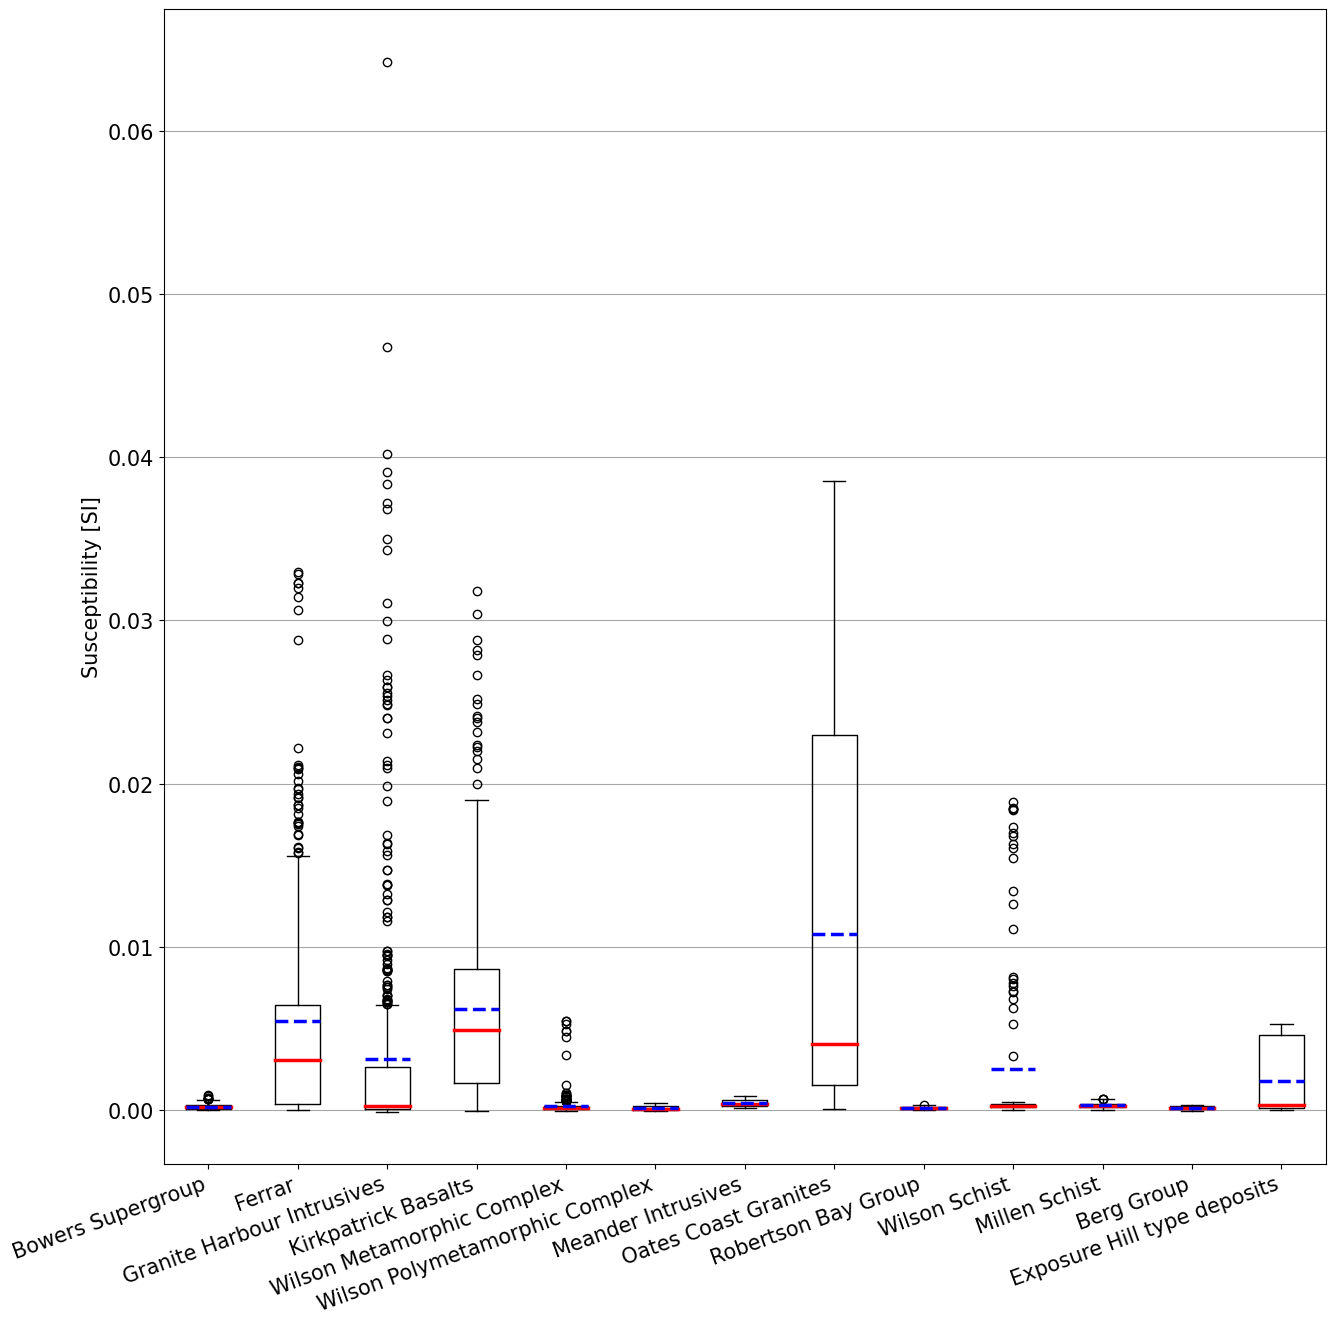

In [20]:
medianprops = dict(linestyle="-", linewidth=2.5, color="r")
mean = dict(linestyle="--", linewidth=2.5, color="b")

sus_values_ls = [
    Bowers_Supergroup_all_sus_NAPA.flatten(),
    Ferrar_all_sus_NAPA.flatten(),
    Granite_Harbour_Intrusives_all_sus_NAPA.flatten(),
    Kirkpatrick_Basalts_all_sus_NAPA.flatten(),
    Wilson_Metamorphic_Complex_all_sus_NAPA.flatten(),
    Wilson_Polymetamorphic_Complex_all_sus_NAPA.flatten(),
    Meander_Intrusives_all_sus_NAPA.flatten(),
    NAPA_Oates_Coast_Granites_all_sus_NAPA.flatten(),
    Robertson_Bay_Group_all_sus_NAPA.flatten(),
    Wilson_Schist_all_sus_NAPA.flatten(),
    Millen_Schist_all_sus_NAPA.flatten(),
    Berg_Group_all_sus_NAPA.flatten(),
    Exposure_Hill_type_deposits_all_sus_NAPA.flatten(),
]

figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)
ax1.boxplot(
    sus_values_ls,
    medianprops=medianprops,
    meanline=True,
    showmeans=True,
    meanprops=mean,
)
x_labels = [
    "Bowers Supergroup",
    "Ferrar",
    "Granite Harbour Intrusives",
    "Kirkpatrick Basalts",
    "Wilson Metamorphic Complex",
    "Wilson Polymetamorphic Complex",
    "Meander Intrusives",
    "Oates Coast Granites",
    "Robertson Bay Group",
    "Wilson Schist",
    "Millen Schist",
    "Berg Group",
    "Exposure Hill type deposits",
]
x_ticks_num = np.arange(1, 14, 1)
plt.xticks(x_ticks_num, x_labels)
plt.setp(ax1.get_xticklabels(), rotation=20, ha="right")
ax1.set_ylabel("Susceptibility [SI]", fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.grid(visible=True, which="major", axis="y", color="k", linestyle="-", alpha=0.35)
plt.savefig(
    export_fig_path_NAPA + "box_plot_susceptbility_formation.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

##### Density box plots

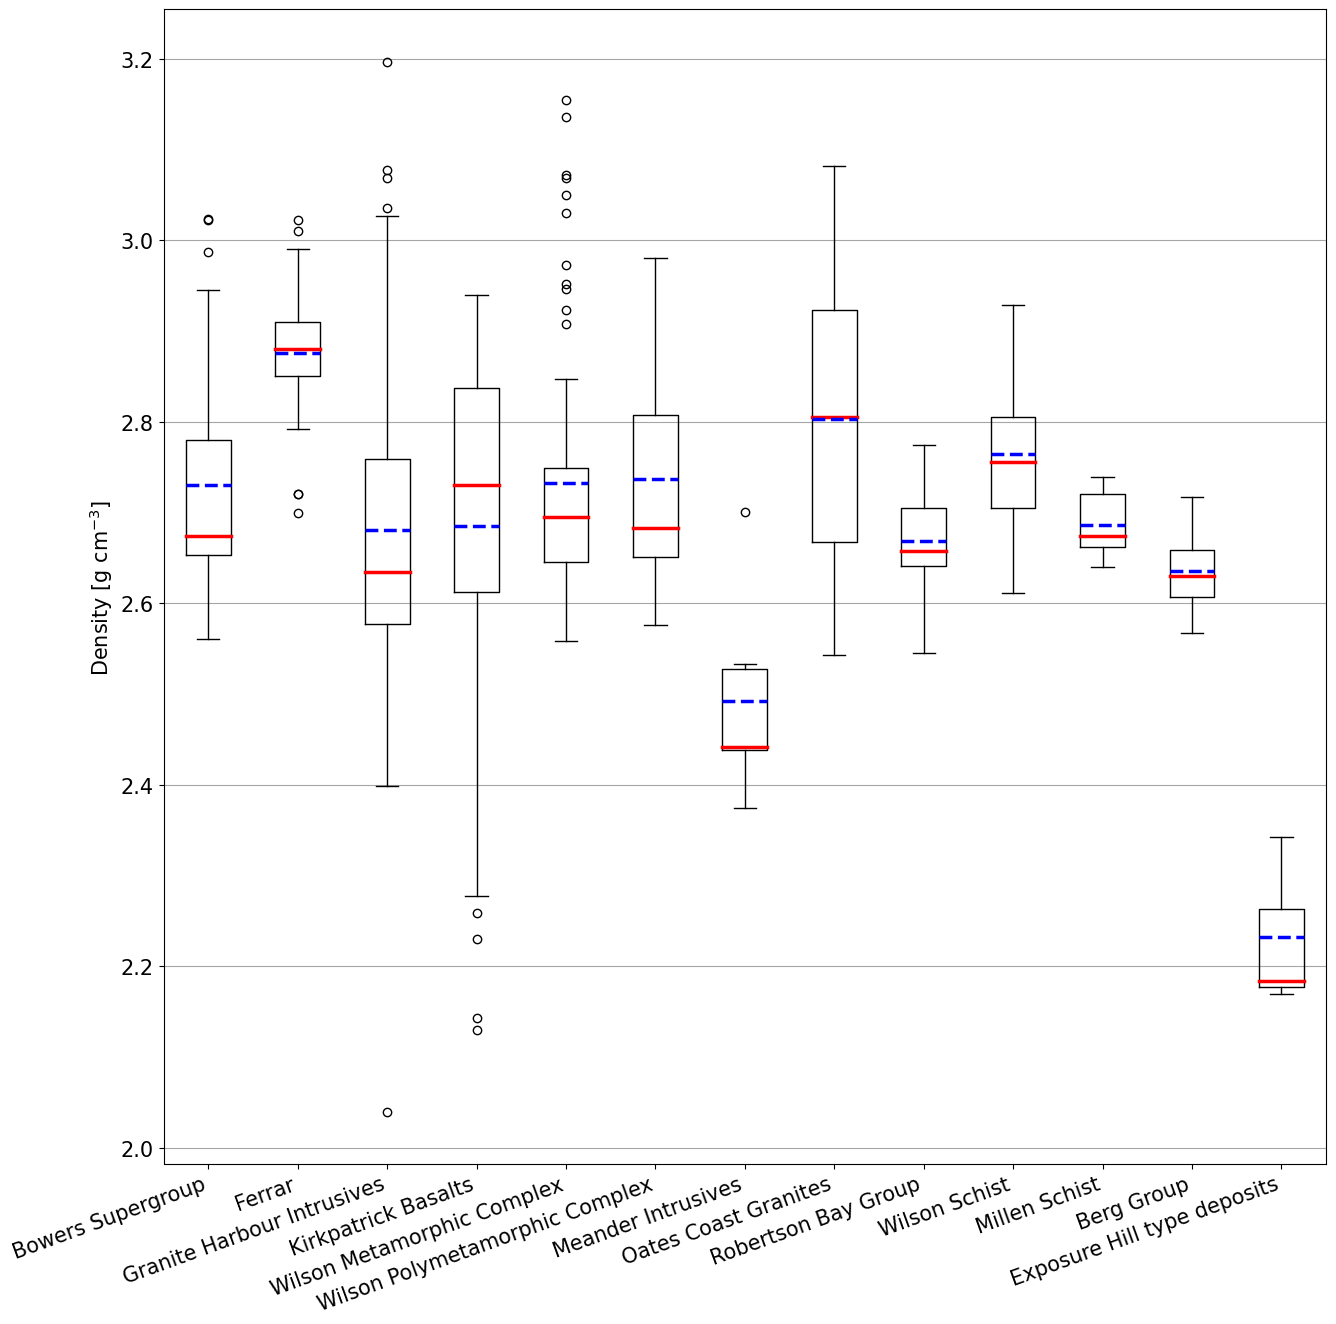

In [21]:
medianprops = dict(linestyle="-", linewidth=2.5, color="r")
mean = dict(linestyle="--", linewidth=2.5, color="b")


dens_values_ls = [
    NAPA_Bowers_Supergroup_df["density [g/cm^3]"],
    NAPA_Ferrar_df["density [g/cm^3]"],
    NAPA_GHI_df["density [g/cm^3]"],
    NAPA_Kirkpatrick_Basalts_df["density [g/cm^3]"],
    NAPA_Wilson_Metamorphic_Complex_df["density [g/cm^3]"],
    NAPA_Wilson_Polymetamorphic_Complex_df["density [g/cm^3]"],
    NAPA_Meander_Intrusives_df["density [g/cm^3]"],
    NAPA_Oates_Coast_Granites_df["density [g/cm^3]"],
    NAPA_Robertson_Bay_Group_df["density [g/cm^3]"],
    NAPA_Wilson_Schist_df["density [g/cm^3]"],
    NAPA_Millen_Schist_df["density [g/cm^3]"],
    NAPA_Berg_Group_df["density [g/cm^3]"],
    NAPA_Exposure_Hill_type_deposits_df["density [g/cm^3]"],
]

figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

ax1.boxplot(
    dens_values_ls,
    medianprops=medianprops,
    meanline=True,
    showmeans=True,
    meanprops=mean,
)

x_labels = [
    "Bowers Supergroup",
    "Ferrar",
    "Granite Harbour Intrusives",
    "Kirkpatrick Basalts",
    "Wilson Metamorphic Complex",
    "Wilson Polymetamorphic Complex",
    "Meander Intrusives",
    "Oates Coast Granites",
    "Robertson Bay Group",
    "Wilson Schist",
    "Millen Schist",
    "Berg Group",
    "Exposure Hill type deposits",
]


x_ticks_num = np.arange(1, 14, 1)
plt.xticks(x_ticks_num, x_labels)
plt.setp(ax1.get_xticklabels(), rotation=20, ha="right")
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.grid(visible=True, which="major", axis="y", color="k", linestyle="-", alpha=0.35)
plt.savefig(
    export_fig_path_NAPA + "box_plot_desnity_formation.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

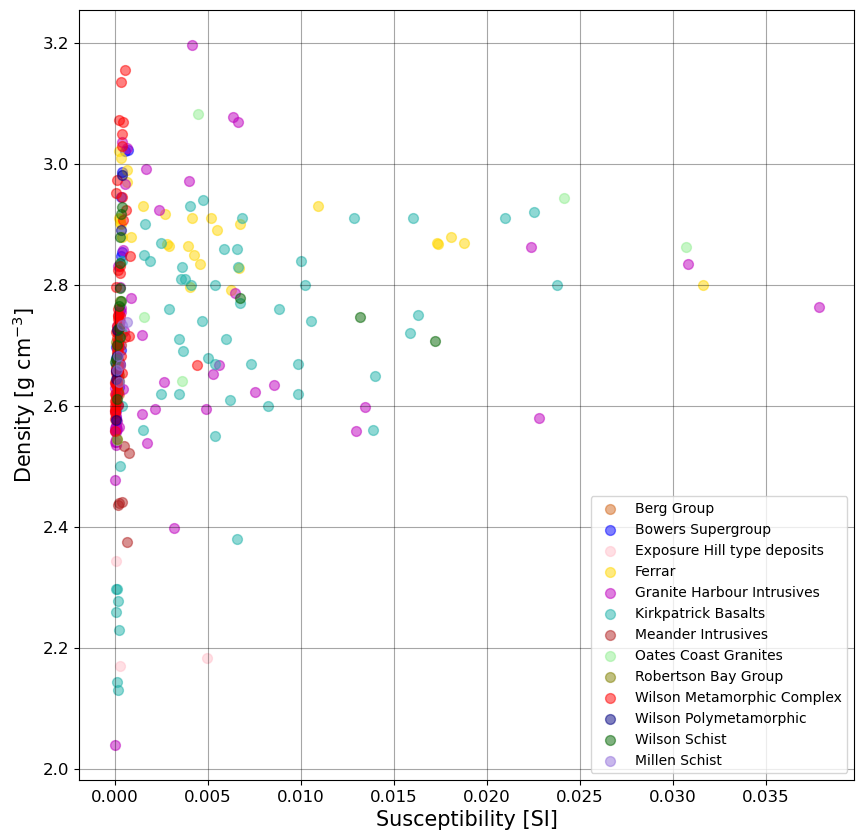

In [22]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


NAPA_Berg_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
    label="Berg Group",
)

NAPA_Bowers_Supergroup_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    color="blue",
    alpha=0.5,
    label="Bowers Supergroup",
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="pink",
    s=50,
    alpha=0.5,
    label="Exposure Hill type deposits",
)


NAPA_Ferrar_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="gold",
    s=50,
    alpha=0.5,
    label="Ferrar",
)


NAPA_GHI_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="m",
    s=50,
    alpha=0.5,
    label="Granite Harbour Intrusives",
)

NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="lightseagreen",
    s=50,
    alpha=0.5,
    label="Kirkpatrick Basalts",
)


NAPA_Meander_Intrusives_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="firebrick",
    s=50,
    alpha=0.5,
    label="Meander Intrusives",
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="lightgreen",
    s=50,
    alpha=0.5,
    label="Oates Coast Granites",
)


NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="olive",
    s=50,
    alpha=0.5,
    label="Robertson Bay Group",
)


NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="red",
    s=50,
    alpha=0.5,
    label="Wilson Metamorphic Complex",
)


NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="navy",
    s=50,
    alpha=0.5,
    label="Wilson Polymetamorphic",
)


NAPA_Wilson_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="darkgreen",
    s=50,
    alpha=0.5,
    label="Wilson Schist",
)


NAPA_Millen_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="mediumpurple",
    s=50,
    alpha=0.5,
    label="Millen Schist",
)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_formation_colored.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

In [23]:
zoom_x = [-0.0005, 0.002, 0.002, -0.0005, -0.0005]
zoom_y = [2, 2, 3.2, 3.2, 2]

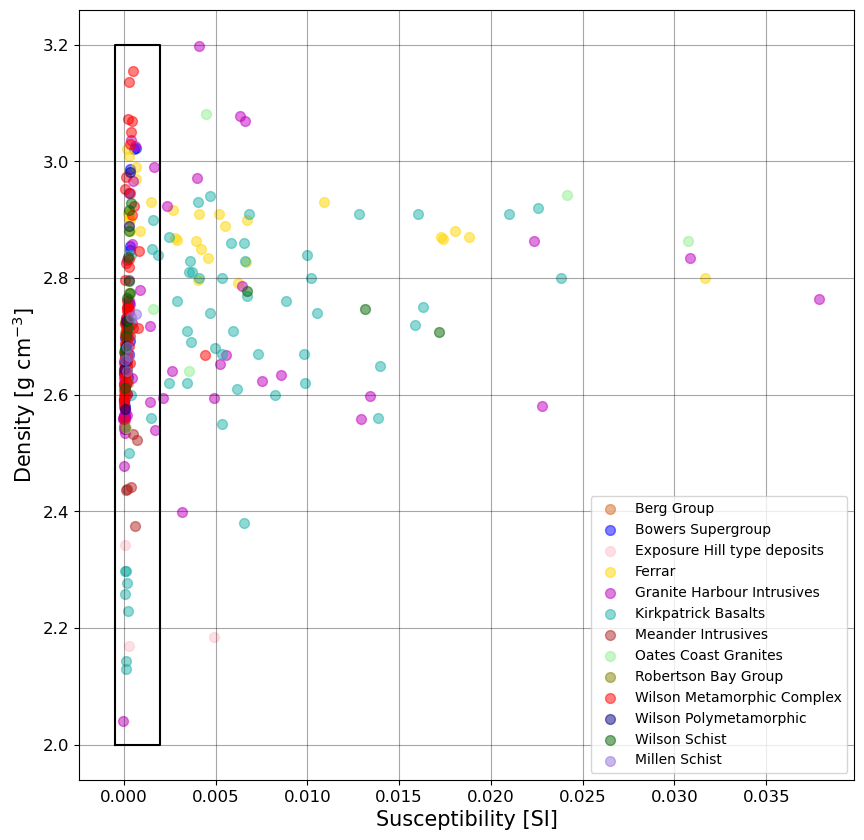

In [24]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


NAPA_Berg_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
    label="Berg Group",
)

NAPA_Bowers_Supergroup_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    color="blue",
    alpha=0.5,
    label="Bowers Supergroup",
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="pink",
    s=50,
    alpha=0.5,
    label="Exposure Hill type deposits",
)


NAPA_Ferrar_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="gold",
    s=50,
    alpha=0.5,
    label="Ferrar",
)


NAPA_GHI_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="m",
    s=50,
    alpha=0.5,
    label="Granite Harbour Intrusives",
)

NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="lightseagreen",
    s=50,
    alpha=0.5,
    label="Kirkpatrick Basalts",
)


NAPA_Meander_Intrusives_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="firebrick",
    s=50,
    alpha=0.5,
    label="Meander Intrusives",
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="lightgreen",
    s=50,
    alpha=0.5,
    label="Oates Coast Granites",
)


NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="olive",
    s=50,
    alpha=0.5,
    label="Robertson Bay Group",
)


NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="red",
    s=50,
    alpha=0.5,
    label="Wilson Metamorphic Complex",
)


NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="navy",
    s=50,
    alpha=0.5,
    label="Wilson Polymetamorphic",
)


NAPA_Wilson_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="darkgreen",
    s=50,
    alpha=0.5,
    label="Wilson Schist",
)


NAPA_Millen_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="mediumpurple",
    s=50,
    alpha=0.5,
    label="Millen Schist",
)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend(loc="lower right")
ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)

plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_formation_colored_zoom_area.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

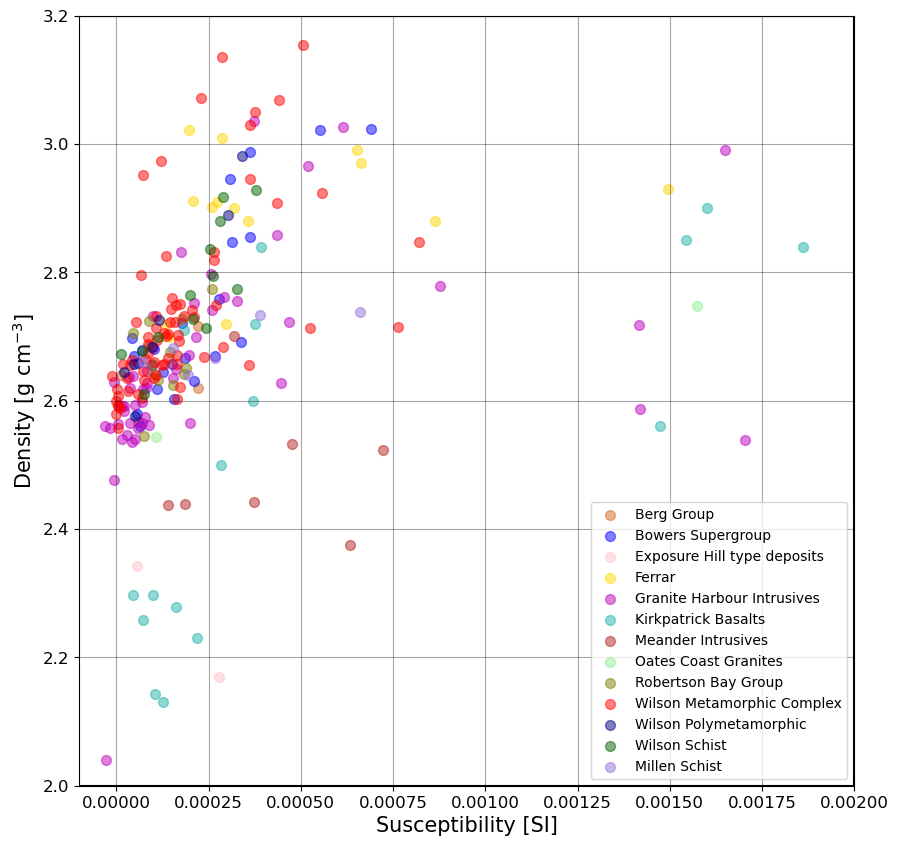

In [25]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


NAPA_Berg_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
    label="Berg Group",
)

NAPA_Bowers_Supergroup_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    color="blue",
    alpha=0.5,
    label="Bowers Supergroup",
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="pink",
    s=50,
    alpha=0.5,
    label="Exposure Hill type deposits",
)


NAPA_Ferrar_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="gold",
    s=50,
    alpha=0.5,
    label="Ferrar",
)


NAPA_GHI_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="m",
    s=50,
    alpha=0.5,
    label="Granite Harbour Intrusives",
)

NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="lightseagreen",
    s=50,
    alpha=0.5,
    label="Kirkpatrick Basalts",
)


NAPA_Meander_Intrusives_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="firebrick",
    s=50,
    alpha=0.5,
    label="Meander Intrusives",
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="lightgreen",
    s=50,
    alpha=0.5,
    label="Oates Coast Granites",
)


NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="olive",
    s=50,
    alpha=0.5,
    label="Robertson Bay Group",
)


NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="red",
    s=50,
    alpha=0.5,
    label="Wilson Metamorphic Complex",
)


NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="navy",
    s=50,
    alpha=0.5,
    label="Wilson Polymetamorphic",
)


NAPA_Wilson_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="darkgreen",
    s=50,
    alpha=0.5,
    label="Wilson Schist",
)


NAPA_Millen_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="mediumpurple",
    s=50,
    alpha=0.5,
    label="Millen Schist",
)

ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend(loc="lower right")
ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)

ax1.set_xlim([-0.0001, 0.002])
ax1.set_ylim([2, 3.2])

plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_formation_colored_zoomed.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

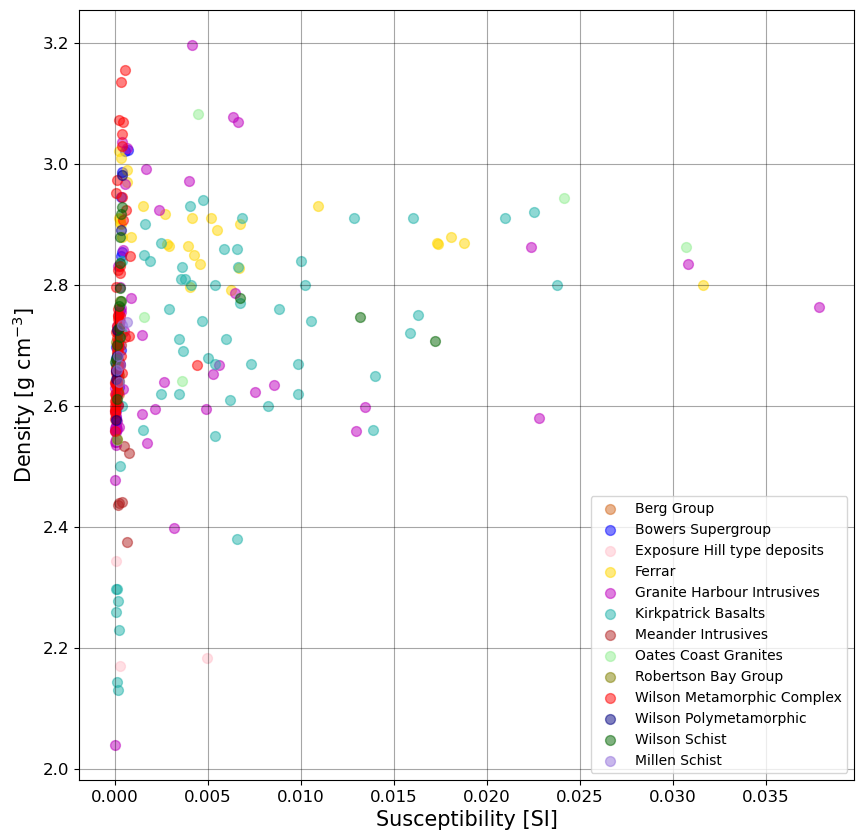

In [26]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


NAPA_Berg_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
    label="Berg Group",
)

NAPA_Bowers_Supergroup_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    color="blue",
    alpha=0.5,
    label="Bowers Supergroup",
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="pink",
    s=50,
    alpha=0.5,
    label="Exposure Hill type deposits",
)


NAPA_Ferrar_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="gold",
    s=50,
    alpha=0.5,
    label="Ferrar",
)


NAPA_GHI_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="m",
    s=50,
    alpha=0.5,
    label="Granite Harbour Intrusives",
)

NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="lightseagreen",
    s=50,
    alpha=0.5,
    label="Kirkpatrick Basalts",
)


NAPA_Meander_Intrusives_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="firebrick",
    s=50,
    alpha=0.5,
    label="Meander Intrusives",
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="lightgreen",
    s=50,
    alpha=0.5,
    label="Oates Coast Granites",
)


NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="olive",
    s=50,
    alpha=0.5,
    label="Robertson Bay Group",
)


NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="red",
    s=50,
    alpha=0.5,
    label="Wilson Metamorphic Complex",
)


NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="navy",
    s=50,
    alpha=0.5,
    label="Wilson Polymetamorphic",
)


NAPA_Wilson_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="darkgreen",
    s=50,
    alpha=0.5,
    label="Wilson Schist",
)


NAPA_Millen_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="mediumpurple",
    s=50,
    alpha=0.5,
    label="Millen Schist",
)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend(loc="lower right")
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_formation_colored_error_bars.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

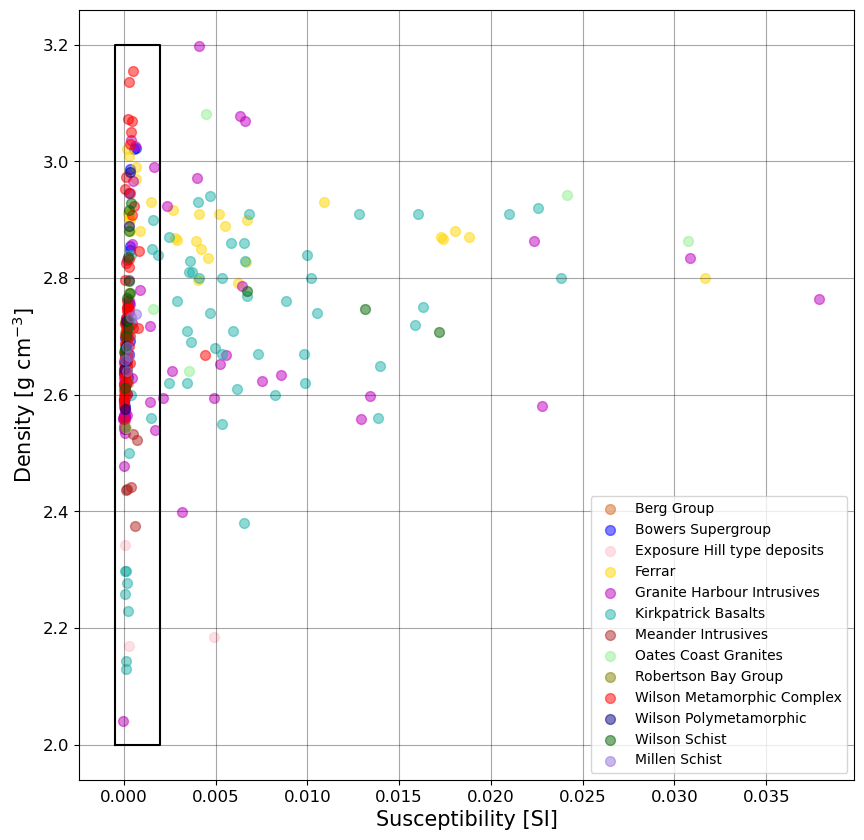

In [27]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


NAPA_Berg_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
    label="Berg Group",
)

NAPA_Bowers_Supergroup_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    color="blue",
    alpha=0.5,
    label="Bowers Supergroup",
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="pink",
    s=50,
    alpha=0.5,
    label="Exposure Hill type deposits",
)


NAPA_Ferrar_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="gold",
    s=50,
    alpha=0.5,
    label="Ferrar",
)


NAPA_GHI_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="m",
    s=50,
    alpha=0.5,
    label="Granite Harbour Intrusives",
)

NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="lightseagreen",
    s=50,
    alpha=0.5,
    label="Kirkpatrick Basalts",
)


NAPA_Meander_Intrusives_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="firebrick",
    s=50,
    alpha=0.5,
    label="Meander Intrusives",
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="lightgreen",
    s=50,
    alpha=0.5,
    label="Oates Coast Granites",
)


NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="olive",
    s=50,
    alpha=0.5,
    label="Robertson Bay Group",
)


NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="red",
    s=50,
    alpha=0.5,
    label="Wilson Metamorphic Complex",
)


NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="navy",
    s=50,
    alpha=0.5,
    label="Wilson Polymetamorphic",
)


NAPA_Wilson_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="darkgreen",
    s=50,
    alpha=0.5,
    label="Wilson Schist",
)


NAPA_Millen_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="mediumpurple",
    s=50,
    alpha=0.5,
    label="Millen Schist",
)

ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_formation_colored_error_bars_zoom_area.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

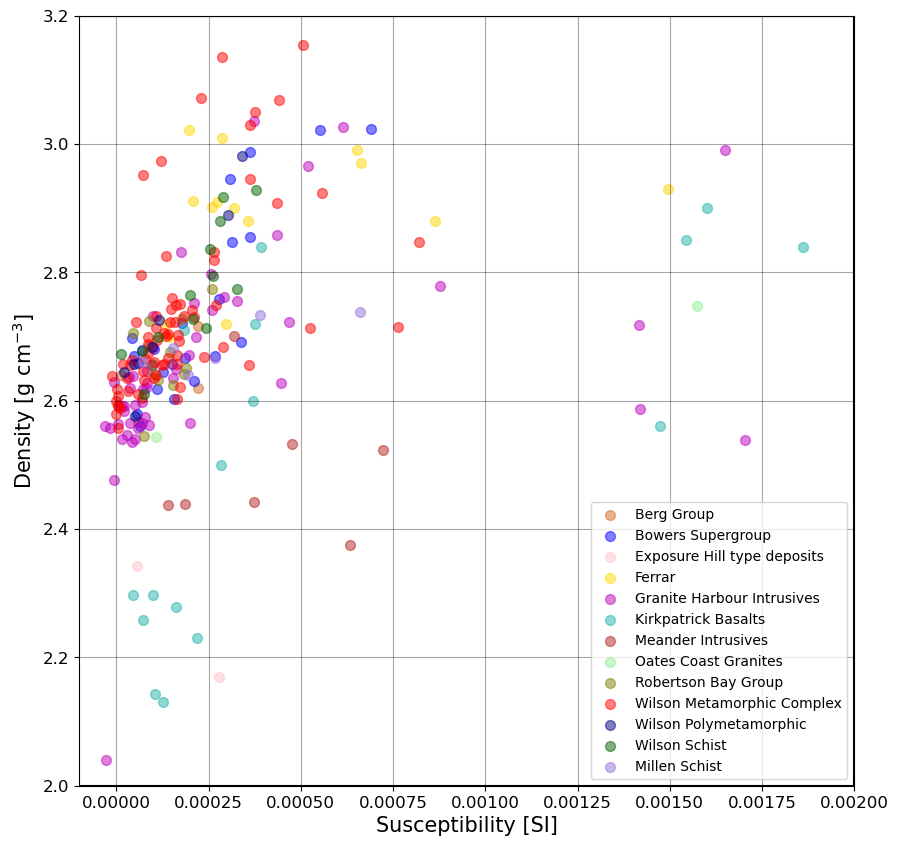

In [28]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


NAPA_Berg_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
    label="Berg Group",
)

NAPA_Bowers_Supergroup_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    color="blue",
    alpha=0.5,
    label="Bowers Supergroup",
)

NAPA_Exposure_Hill_type_deposits_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="pink",
    s=50,
    alpha=0.5,
    label="Exposure Hill type deposits",
)


NAPA_Ferrar_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="gold",
    s=50,
    alpha=0.5,
    label="Ferrar",
)


NAPA_GHI_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="m",
    s=50,
    alpha=0.5,
    label="Granite Harbour Intrusives",
)

NAPA_Kirkpatrick_Basalts_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="lightseagreen",
    s=50,
    alpha=0.5,
    label="Kirkpatrick Basalts",
)


NAPA_Meander_Intrusives_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="firebrick",
    s=50,
    alpha=0.5,
    label="Meander Intrusives",
)

NAPA_Oates_Coast_Granites_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="lightgreen",
    s=50,
    alpha=0.5,
    label="Oates Coast Granites",
)


NAPA_Robertson_Bay_Group_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="olive",
    s=50,
    alpha=0.5,
    label="Robertson Bay Group",
)


NAPA_Wilson_Metamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="red",
    s=50,
    alpha=0.5,
    label="Wilson Metamorphic Complex",
)


NAPA_Wilson_Polymetamorphic_Complex_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="navy",
    s=50,
    alpha=0.5,
    label="Wilson Polymetamorphic",
)


NAPA_Wilson_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="darkgreen",
    s=50,
    alpha=0.5,
    label="Wilson Schist",
)


NAPA_Millen_Schist_ps_gpdf.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    color="mediumpurple",
    s=50,
    alpha=0.5,
    label="Millen Schist",
)


ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")

ax1.set_xlim([-0.0001, 0.002])
ax1.set_ylim([2, 3.2])

plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_formation_colored_error_bars_zoomed.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

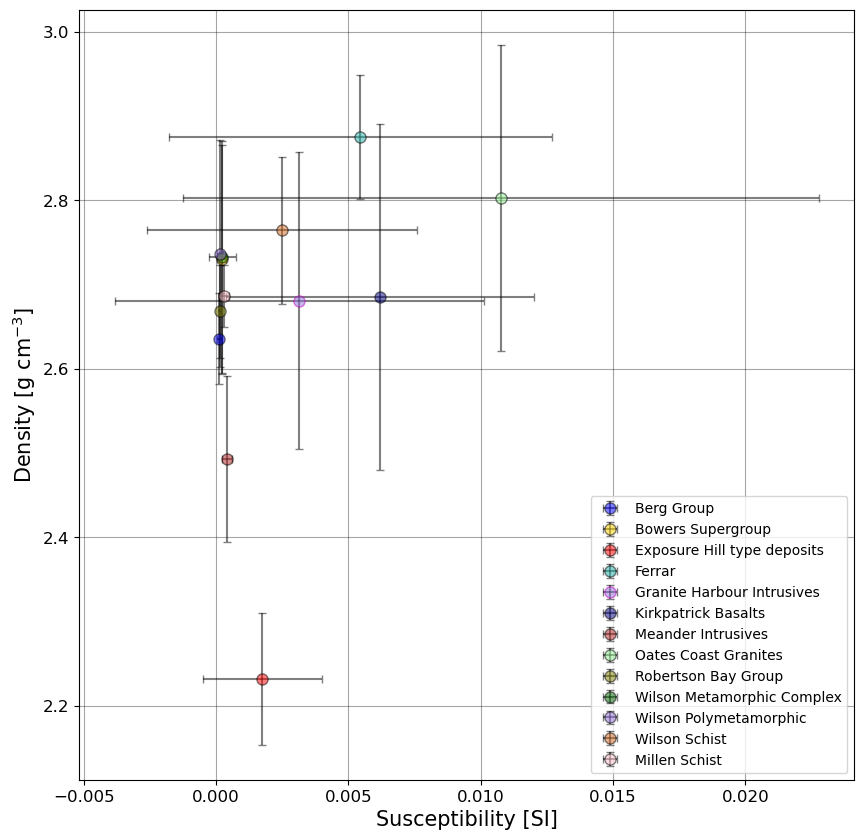

In [29]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


plt.errorbar(
    NAPA_Berg_Group_sus_mean,
    NAPA_Berg_Group_density_mean,
    xerr=NAPA_Berg_Group_sus_std,
    yerr=NAPA_Berg_Group_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="blue",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Berg Group",
)

plt.errorbar(
    NAPA_Bowers_Supergroup_sus_mean,
    NAPA_Bowers_Supergroup_density_mean,
    xerr=NAPA_Bowers_Supergroup_sus_std,
    yerr=NAPA_Bowers_Supergroup_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="gold",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Bowers Supergroup",
)

plt.errorbar(
    NAPA_Exposure_Hill_type_deposits_sus_mean,
    NAPA_Exposure_Hill_type_deposits_density_mean,
    xerr=NAPA_Exposure_Hill_type_deposits_sus_std,
    yerr=NAPA_Exposure_Hill_type_deposits_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="red",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Exposure Hill type deposits",
)

plt.errorbar(
    NAPA_Ferrar_sus_mean,
    NAPA_Ferrar_density_mean,
    xerr=NAPA_Ferrar_sus_std,
    yerr=NAPA_Ferrar_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="lightseagreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Ferrar",
)

plt.errorbar(
    NAPA_GHI_sus_mean,
    NAPA_GHI_density_mean,
    xerr=NAPA_GHI_sus_std,
    yerr=NAPA_GHI_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="mediumpurple",
    markeredgecolor="m",
    capsize=3,
    alpha=0.5,
    label="Granite Harbour Intrusives",
)


plt.errorbar(
    NAPA_Kirkpatrick_Basalts_sus_mean,
    NAPA_Kirkpatrick_Basalts_density_mean,
    xerr=NAPA_Kirkpatrick_Basalts_sus_std,
    yerr=NAPA_Kirkpatrick_Basalts_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="navy",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Kirkpatrick Basalts",
)

plt.errorbar(
    NAPA_Meander_Intrusives_sus_mean,
    NAPA_Meander_Intrusives_density_mean,
    xerr=NAPA_Meander_Intrusives_sus_std,
    yerr=NAPA_Meander_Intrusives_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="firebrick",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Meander Intrusives",
)


plt.errorbar(
    NAPA_Oates_Coast_Granites_sus_mean,
    NAPA_Oates_Coast_Granites_density_mean,
    xerr=NAPA_Oates_Coast_Granites_sus_std,
    yerr=NAPA_Oates_Coast_Granites_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="lightgreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Oates Coast Granites",
)


plt.errorbar(
    NAPA_Robertson_Bay_Group_sus_mean,
    NAPA_Robertson_Bay_Group_density_mean,
    xerr=NAPA_Robertson_Bay_Group_sus_std,
    yerr=NAPA_Robertson_Bay_Group_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="olive",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Robertson Bay Group",
)


plt.errorbar(
    NAPA_Wilson_Metamorphic_Complex_sus_mean,
    NAPA_Wilson_Metamorphic_Complex_density_mean,
    xerr=NAPA_Wilson_Metamorphic_Complex_sus_std,
    yerr=NAPA_Wilson_Metamorphic_Complex_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="darkgreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Wilson Metamorphic Complex",
)


plt.errorbar(
    NAPA_Wilson_Polymetamorphic_Complex_sus_mean,
    NAPA_Wilson_Polymetamorphic_Complex_density_mean,
    xerr=NAPA_Wilson_Polymetamorphic_Complex_sus_std,
    yerr=NAPA_Wilson_Polymetamorphic_Complex_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="mediumpurple",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Wilson Polymetamorphic",
)


plt.errorbar(
    NAPA_Wilson_Schist_sus_mean,
    NAPA_Wilson_Schist_density_mean,
    xerr=NAPA_Wilson_Schist_sus_std,
    yerr=NAPA_Wilson_Schist_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="chocolate",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Wilson Schist",
)


plt.errorbar(
    NAPA_Millen_Schist_sus_mean,
    NAPA_Millen_Schist_density_mean,
    xerr=NAPA_Millen_Schist_sus_std,
    yerr=NAPA_Millen_Schist_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="pink",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Millen Schist",
)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
plt.savefig(
    export_fig_path_NAPA + "sus_dens_error_bars_plot_formation_colored.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

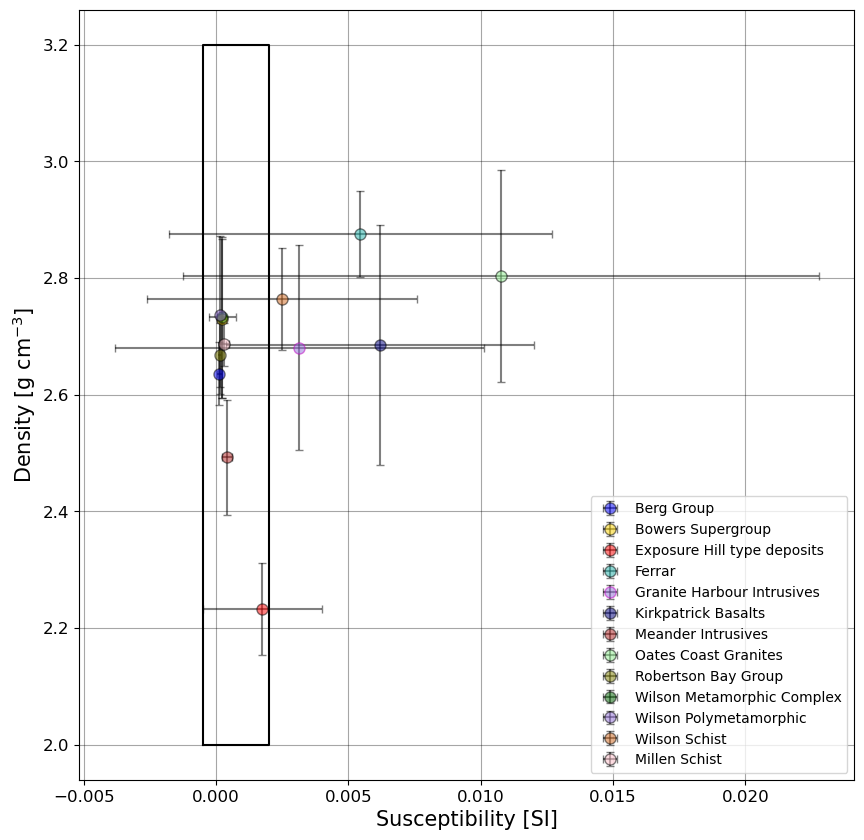

In [30]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


plt.errorbar(
    NAPA_Berg_Group_sus_mean,
    NAPA_Berg_Group_density_mean,
    xerr=NAPA_Berg_Group_sus_std,
    yerr=NAPA_Berg_Group_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="blue",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Berg Group",
)

plt.errorbar(
    NAPA_Bowers_Supergroup_sus_mean,
    NAPA_Bowers_Supergroup_density_mean,
    xerr=NAPA_Bowers_Supergroup_sus_std,
    yerr=NAPA_Bowers_Supergroup_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="gold",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Bowers Supergroup",
)

plt.errorbar(
    NAPA_Exposure_Hill_type_deposits_sus_mean,
    NAPA_Exposure_Hill_type_deposits_density_mean,
    xerr=NAPA_Exposure_Hill_type_deposits_sus_std,
    yerr=NAPA_Exposure_Hill_type_deposits_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="red",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Exposure Hill type deposits",
)

plt.errorbar(
    NAPA_Ferrar_sus_mean,
    NAPA_Ferrar_density_mean,
    xerr=NAPA_Ferrar_sus_std,
    yerr=NAPA_Ferrar_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="lightseagreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Ferrar",
)

plt.errorbar(
    NAPA_GHI_sus_mean,
    NAPA_GHI_density_mean,
    xerr=NAPA_GHI_sus_std,
    yerr=NAPA_GHI_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="mediumpurple",
    markeredgecolor="m",
    capsize=3,
    alpha=0.5,
    label="Granite Harbour Intrusives",
)


plt.errorbar(
    NAPA_Kirkpatrick_Basalts_sus_mean,
    NAPA_Kirkpatrick_Basalts_density_mean,
    xerr=NAPA_Kirkpatrick_Basalts_sus_std,
    yerr=NAPA_Kirkpatrick_Basalts_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="navy",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Kirkpatrick Basalts",
)

plt.errorbar(
    NAPA_Meander_Intrusives_sus_mean,
    NAPA_Meander_Intrusives_density_mean,
    xerr=NAPA_Meander_Intrusives_sus_std,
    yerr=NAPA_Meander_Intrusives_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="firebrick",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Meander Intrusives",
)


plt.errorbar(
    NAPA_Oates_Coast_Granites_sus_mean,
    NAPA_Oates_Coast_Granites_density_mean,
    xerr=NAPA_Oates_Coast_Granites_sus_std,
    yerr=NAPA_Oates_Coast_Granites_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="lightgreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Oates Coast Granites",
)


plt.errorbar(
    NAPA_Robertson_Bay_Group_sus_mean,
    NAPA_Robertson_Bay_Group_density_mean,
    xerr=NAPA_Robertson_Bay_Group_sus_std,
    yerr=NAPA_Robertson_Bay_Group_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="olive",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Robertson Bay Group",
)


plt.errorbar(
    NAPA_Wilson_Metamorphic_Complex_sus_mean,
    NAPA_Wilson_Metamorphic_Complex_density_mean,
    xerr=NAPA_Wilson_Metamorphic_Complex_sus_std,
    yerr=NAPA_Wilson_Metamorphic_Complex_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="darkgreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Wilson Metamorphic Complex",
)


plt.errorbar(
    NAPA_Wilson_Polymetamorphic_Complex_sus_mean,
    NAPA_Wilson_Polymetamorphic_Complex_density_mean,
    xerr=NAPA_Wilson_Polymetamorphic_Complex_sus_std,
    yerr=NAPA_Wilson_Polymetamorphic_Complex_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="mediumpurple",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Wilson Polymetamorphic",
)


plt.errorbar(
    NAPA_Wilson_Schist_sus_mean,
    NAPA_Wilson_Schist_density_mean,
    xerr=NAPA_Wilson_Schist_sus_std,
    yerr=NAPA_Wilson_Schist_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="chocolate",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Wilson Schist",
)


plt.errorbar(
    NAPA_Millen_Schist_sus_mean,
    NAPA_Millen_Schist_density_mean,
    xerr=NAPA_Millen_Schist_sus_std,
    yerr=NAPA_Millen_Schist_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="pink",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Millen Schist",
)

ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)

ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
plt.savefig(
    export_fig_path_NAPA + "sus_dens_error_bars_plot_formation_colored_zoom_area.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

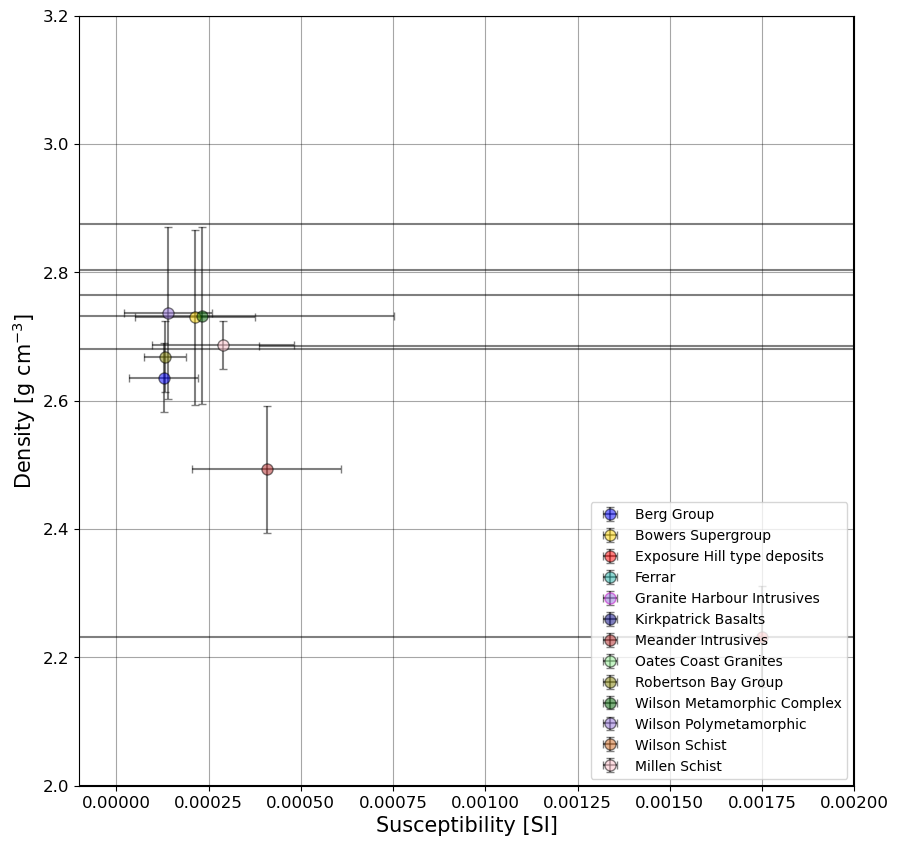

In [31]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


plt.errorbar(
    NAPA_Berg_Group_sus_mean,
    NAPA_Berg_Group_density_mean,
    xerr=NAPA_Berg_Group_sus_std,
    yerr=NAPA_Berg_Group_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="blue",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Berg Group",
)

plt.errorbar(
    NAPA_Bowers_Supergroup_sus_mean,
    NAPA_Bowers_Supergroup_density_mean,
    xerr=NAPA_Bowers_Supergroup_sus_std,
    yerr=NAPA_Bowers_Supergroup_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="gold",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Bowers Supergroup",
)

plt.errorbar(
    NAPA_Exposure_Hill_type_deposits_sus_mean,
    NAPA_Exposure_Hill_type_deposits_density_mean,
    xerr=NAPA_Exposure_Hill_type_deposits_sus_std,
    yerr=NAPA_Exposure_Hill_type_deposits_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="red",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Exposure Hill type deposits",
)

plt.errorbar(
    NAPA_Ferrar_sus_mean,
    NAPA_Ferrar_density_mean,
    xerr=NAPA_Ferrar_sus_std,
    yerr=NAPA_Ferrar_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="lightseagreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Ferrar",
)

plt.errorbar(
    NAPA_GHI_sus_mean,
    NAPA_GHI_density_mean,
    xerr=NAPA_GHI_sus_std,
    yerr=NAPA_GHI_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="mediumpurple",
    markeredgecolor="m",
    capsize=3,
    alpha=0.5,
    label="Granite Harbour Intrusives",
)


plt.errorbar(
    NAPA_Kirkpatrick_Basalts_sus_mean,
    NAPA_Kirkpatrick_Basalts_density_mean,
    xerr=NAPA_Kirkpatrick_Basalts_sus_std,
    yerr=NAPA_Kirkpatrick_Basalts_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="navy",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Kirkpatrick Basalts",
)

plt.errorbar(
    NAPA_Meander_Intrusives_sus_mean,
    NAPA_Meander_Intrusives_density_mean,
    xerr=NAPA_Meander_Intrusives_sus_std,
    yerr=NAPA_Meander_Intrusives_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="firebrick",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Meander Intrusives",
)


plt.errorbar(
    NAPA_Oates_Coast_Granites_sus_mean,
    NAPA_Oates_Coast_Granites_density_mean,
    xerr=NAPA_Oates_Coast_Granites_sus_std,
    yerr=NAPA_Oates_Coast_Granites_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="lightgreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Oates Coast Granites",
)


plt.errorbar(
    NAPA_Robertson_Bay_Group_sus_mean,
    NAPA_Robertson_Bay_Group_density_mean,
    xerr=NAPA_Robertson_Bay_Group_sus_std,
    yerr=NAPA_Robertson_Bay_Group_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="olive",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Robertson Bay Group",
)


plt.errorbar(
    NAPA_Wilson_Metamorphic_Complex_sus_mean,
    NAPA_Wilson_Metamorphic_Complex_density_mean,
    xerr=NAPA_Wilson_Metamorphic_Complex_sus_std,
    yerr=NAPA_Wilson_Metamorphic_Complex_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="darkgreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Wilson Metamorphic Complex",
)


plt.errorbar(
    NAPA_Wilson_Polymetamorphic_Complex_sus_mean,
    NAPA_Wilson_Polymetamorphic_Complex_density_mean,
    xerr=NAPA_Wilson_Polymetamorphic_Complex_sus_std,
    yerr=NAPA_Wilson_Polymetamorphic_Complex_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="mediumpurple",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Wilson Polymetamorphic",
)


plt.errorbar(
    NAPA_Wilson_Schist_sus_mean,
    NAPA_Wilson_Schist_density_mean,
    xerr=NAPA_Wilson_Schist_sus_std,
    yerr=NAPA_Wilson_Schist_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="chocolate",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Wilson Schist",
)


plt.errorbar(
    NAPA_Millen_Schist_sus_mean,
    NAPA_Millen_Schist_density_mean,
    xerr=NAPA_Millen_Schist_sus_std,
    yerr=NAPA_Millen_Schist_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="pink",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Millen Schist",
)

ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)

ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
ax1.set_xlim([-0.0001, 0.002])
ax1.set_ylim([2, 3.2])

plt.savefig(
    export_fig_path_NAPA + "sus_dens_error_bars_plot_formation_colored_zoomed.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

# Plot rock type data

#### Amphibolite

In [32]:
NAPA_amphibolite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Amphibolite")
    | (NAPA_measurments_df["rocktyp"] == "Granet-amphibol-schist")
    | (NAPA_measurments_df["rocktyp"] == 'Garnet-"Amphibolit"')
]


NAPA_amphibolite_density_mean = np.mean(NAPA_amphibolite_df["density [g/cm^3]"])
NAPA_amphibolite_density_std = np.std(NAPA_amphibolite_df["density [g/cm^3]"])
NAPA_amphibolite_sus_mean = np.mean(
    NAPA_amphibolite_df["susceptibility average [10-3 SI]"]
)
NAPA_amphibolite_sus_std = np.std(
    NAPA_amphibolite_df["susceptibility average [10-3 SI]"]
)


## convert lon lat to decimal
longitude_pd = NAPA_amphibolite_df["longitude"]
latitude_pd = NAPA_amphibolite_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_amphibolite_df), 1))
lat_decimal = np.zeros((len(NAPA_amphibolite_df), 1))

for i in range(len(NAPA_amphibolite_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_amphibolite_df = NAPA_amphibolite_df.assign(longitude_deg=lon_decimal)
NAPA_amphibolite_df = NAPA_amphibolite_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_amphibolite_gpdf = gpd.GeoDataFrame(
    NAPA_amphibolite_df,
    geometry=gpd.points_from_xy(
        NAPA_amphibolite_df.longitude_deg, NAPA_amphibolite_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_amphibolite_ps_gpdf = NAPA_amphibolite_gpdf.to_crs(3031)

#### Basalt 

In [33]:
NAPA_Basalt_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Basalt")
    | (NAPA_measurments_df["rocktyp"] == "Basalt-Sill")
    | (NAPA_measurments_df["rocktyp"] == "KPB")
]


NAPA_Basalt_density_mean = np.mean(NAPA_Basalt_df["density [g/cm^3]"])
NAPA_Basalt_density_std = np.std(NAPA_Basalt_df["density [g/cm^3]"])
NAPA_Basalt_sus_mean = np.mean(NAPA_Basalt_df["susceptibility average [10-3 SI]"])
NAPA_Basalt_sus_std = np.std(NAPA_Basalt_df["susceptibility average [10-3 SI]"])
NAPA_Basalt_sus_median = np.median(NAPA_Basalt_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Basalt_df["longitude"]
latitude_pd = NAPA_Basalt_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Basalt_df), 1))
lat_decimal = np.zeros((len(NAPA_Basalt_df), 1))

for i in range(len(NAPA_Basalt_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Basalt_df = NAPA_Basalt_df.assign(longitude_deg=lon_decimal)
NAPA_Basalt_df = NAPA_Basalt_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Basalt_gpdf = gpd.GeoDataFrame(
    NAPA_Basalt_df,
    geometry=gpd.points_from_xy(
        NAPA_Basalt_df.longitude_deg, NAPA_Basalt_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Basalt_ps_gpdf = NAPA_Basalt_gpdf.to_crs(3031)

print("Basalt density mean: ", NAPA_Basalt_density_mean)
print("Basalt density std: ", NAPA_Basalt_density_std)

print("Basalt sus mean: ", NAPA_Basalt_sus_mean)
print("Basalt sus std: ", NAPA_Basalt_sus_std)
print("Basalt sus median: ", NAPA_Basalt_sus_median)

Basalt density mean:  2.7503018867924527
Basalt density std:  0.12377361942015165
Basalt sus mean:  0.006949783018867925
Basalt sus std:  0.005613404356382086
Basalt sus median:  0.005368375000000001


#### Basite and ultrabasite

In [34]:
NAPA_Basite_and_ultrabasite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Ultrabasit")
    | (NAPA_measurments_df["rocktyp"] == "Basit")
    | (NAPA_measurments_df["rocktyp"] == "Basit or Ultrabasit")
]


NAPA_Basite_and_ultrabasite_density_mean = np.mean(
    NAPA_Basite_and_ultrabasite_df["density [g/cm^3]"]
)
NAPA_Basite_and_ultrabasite_density_std = np.std(
    NAPA_Basite_and_ultrabasite_df["density [g/cm^3]"]
)
NAPA_Basite_and_ultrabasite_sus_mean = np.mean(
    NAPA_Basite_and_ultrabasite_df["susceptibility average [10-3 SI]"]
)
NAPA_Basite_and_ultrabasite_sus_std = np.std(
    NAPA_Basite_and_ultrabasite_df["susceptibility average [10-3 SI]"]
)


## convert lon lat to decimal
longitude_pd = NAPA_Basite_and_ultrabasite_df["longitude"]
latitude_pd = NAPA_Basite_and_ultrabasite_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Basite_and_ultrabasite_df), 1))
lat_decimal = np.zeros((len(NAPA_Basite_and_ultrabasite_df), 1))

for i in range(len(NAPA_Basite_and_ultrabasite_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Basite_and_ultrabasite_df = NAPA_Basite_and_ultrabasite_df.assign(
    longitude_deg=lon_decimal
)
NAPA_Basite_and_ultrabasite_df = NAPA_Basite_and_ultrabasite_df.assign(
    latitude_deg=lat_decimal
)

## create geopanda dataframe
NAPA_Basite_and_ultrabasite_gpdf = gpd.GeoDataFrame(
    NAPA_Basite_and_ultrabasite_df,
    geometry=gpd.points_from_xy(
        NAPA_Basite_and_ultrabasite_df.longitude_deg,
        NAPA_Basite_and_ultrabasite_df.latitude_deg,
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Basite_and_ultrabasite_ps_gpdf = NAPA_Basite_and_ultrabasite_gpdf.to_crs(3031)

#### Diorite

In [35]:
NAPA_Diorit_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Diorit")
    | (NAPA_measurments_df["rocktyp"] == "Hbl-Diorit")
]


NAPA_Diorit_density_mean = np.mean(NAPA_Diorit_df["density [g/cm^3]"])
NAPA_Diorit_density_std = np.std(NAPA_Diorit_df["density [g/cm^3]"])
NAPA_Diorit_sus_mean = np.mean(NAPA_Diorit_df["susceptibility average [10-3 SI]"])
NAPA_Diorit_sus_std = np.std(NAPA_Diorit_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Diorit_df["longitude"]
latitude_pd = NAPA_Diorit_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Diorit_df), 1))
lat_decimal = np.zeros((len(NAPA_Diorit_df), 1))

for i in range(len(NAPA_Diorit_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Diorit_df = NAPA_Diorit_df.assign(longitude_deg=lon_decimal)
NAPA_Diorit_df = NAPA_Diorit_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Diorit_gpdf = gpd.GeoDataFrame(
    NAPA_Diorit_df,
    geometry=gpd.points_from_xy(
        NAPA_Diorit_df.longitude_deg, NAPA_Diorit_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Diorit_ps_gpdf = NAPA_Diorit_gpdf.to_crs(3031)

#### Dolerite

In [36]:
NAPA_Dolerite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Dolerit")
    | (NAPA_measurments_df["rocktyp"] == "Ferrar Dolerit")
    | (NAPA_measurments_df["rocktyp"] == "FD")
]


NAPA_Dolerite_density_mean = np.mean(NAPA_Dolerite_df["density [g/cm^3]"])
NAPA_Dolerite_density_std = np.std(NAPA_Dolerite_df["density [g/cm^3]"])
NAPA_Dolerite_sus_mean = np.mean(NAPA_Dolerite_df["susceptibility average [10-3 SI]"])
NAPA_Dolerite_sus_std = np.std(NAPA_Dolerite_df["susceptibility average [10-3 SI]"])
NAPA_Dolerite_sus_median = np.median(
    NAPA_Dolerite_df["susceptibility average [10-3 SI]"]
)


## convert lon lat to decimal
longitude_pd = NAPA_Dolerite_df["longitude"]
latitude_pd = NAPA_Dolerite_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Dolerite_df), 1))
lat_decimal = np.zeros((len(NAPA_Dolerite_df), 1))

for i in range(len(NAPA_Dolerite_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Dolerite_df = NAPA_Dolerite_df.assign(longitude_deg=lon_decimal)
NAPA_Dolerite_df = NAPA_Dolerite_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Dolerite_gpdf = gpd.GeoDataFrame(
    NAPA_Dolerite_df,
    geometry=gpd.points_from_xy(
        NAPA_Dolerite_df.longitude_deg, NAPA_Dolerite_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Dolerite_ps_gpdf = NAPA_Dolerite_gpdf.to_crs(3031)

print("FD density mean: ", NAPA_Dolerite_density_mean)
print("FD density std: ", NAPA_Dolerite_density_std)

print("FD sus mean: ", NAPA_Dolerite_sus_mean)
print("FD sus std: ", NAPA_Dolerite_sus_std)

print("FD sus median: ", NAPA_Dolerite_sus_median)

FD density mean:  2.8753214285714286
FD density std:  0.07768436759984437
FD sus mean:  0.0060319107142857145
FD sus std:  0.007627684921894567
FD sus median:  0.003467125


#### Gabbro

In [37]:
NAPA_Gabbro_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Gabbro")
    | (NAPA_measurments_df["rocktyp"] == "Hornblende/Gabbro")
    | (NAPA_measurments_df["rocktyp"] == "Gabbro (Diorite?)")
]


NAPA_Gabbro_density_mean = np.mean(NAPA_Gabbro_df["density [g/cm^3]"])
NAPA_Gabbro_density_std = np.std(NAPA_Gabbro_df["density [g/cm^3]"])
NAPA_Gabbro_sus_mean = np.mean(NAPA_Gabbro_df["susceptibility average [10-3 SI]"])
NAPA_Gabbro_sus_std = np.std(NAPA_Gabbro_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Gabbro_df["longitude"]
latitude_pd = NAPA_Gabbro_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Gabbro_df), 1))
lat_decimal = np.zeros((len(NAPA_Gabbro_df), 1))

for i in range(len(NAPA_Gabbro_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Gabbro_df = NAPA_Gabbro_df.assign(longitude_deg=lon_decimal)
NAPA_Gabbro_df = NAPA_Gabbro_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Gabbro_gpdf = gpd.GeoDataFrame(
    NAPA_Gabbro_df,
    geometry=gpd.points_from_xy(
        NAPA_Gabbro_df.longitude_deg, NAPA_Gabbro_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Gabbro_ps_gpdf = NAPA_Gabbro_gpdf.to_crs(3031)

#### Gneiss

In [38]:
NAPA_Gneis_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Sillimanit-Biotit-Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Hornblende-Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Orthogneiss/Granitoid")
    | (NAPA_measurments_df["rocktyp"] == "Biotitgneiss")
    | (NAPA_measurments_df["rocktyp"] == "Biotit-Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Orthogneiss")
    | (NAPA_measurments_df["rocktyp"] == "Bt-Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Garnet-Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Granite-Gneiss, medium-grain")
    | (NAPA_measurments_df["rocktyp"] == "Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Sillimanitgneiss")
    | (NAPA_measurments_df["rocktyp"] == "Bt-Gneise")
    | (NAPA_measurments_df["rocktyp"] == "Sillimanite-Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Garnet-Gneiss")
    | (NAPA_measurments_df["rocktyp"] == "Hornblende-Gneiss")
]


NAPA_Gneis_density_mean = np.mean(NAPA_Gneis_df["density [g/cm^3]"])
NAPA_Gneis_density_std = np.std(NAPA_Gneis_df["density [g/cm^3]"])
NAPA_Gneis_sus_mean = np.mean(NAPA_Gneis_df["susceptibility average [10-3 SI]"])
NAPA_Gneis_sus_std = np.std(NAPA_Gneis_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Gneis_df["longitude"]
latitude_pd = NAPA_Gneis_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Gneis_df), 1))
lat_decimal = np.zeros((len(NAPA_Gneis_df), 1))

for i in range(len(NAPA_Gneis_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Gneis_df = NAPA_Gneis_df.assign(longitude_deg=lon_decimal)
NAPA_Gneis_df = NAPA_Gneis_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Gneis_gpdf = gpd.GeoDataFrame(
    NAPA_Gneis_df,
    geometry=gpd.points_from_xy(
        NAPA_Gneis_df.longitude_deg, NAPA_Gneis_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Gneis_ps_gpdf = NAPA_Gneis_gpdf.to_crs(3031)

#### Granite

In [39]:
NAPA_Granite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Granite")
    | (NAPA_measurments_df["rocktyp"] == "Granite, fine-grained")
    | (NAPA_measurments_df["rocktyp"] == "Granite, small- to fine-grained")
    | (NAPA_measurments_df["rocktyp"] == "Granite, small-grained")
    | (NAPA_measurments_df["rocktyp"] == "Granite, medium to coarse-grained")
    | (NAPA_measurments_df["rocktyp"] == "Granite, medium-grained")
    | (NAPA_measurments_df["rocktyp"] == "Large grain-Granite")
    | (NAPA_measurments_df["rocktyp"] == "Granite/Orthogneiss")
    | (NAPA_measurments_df["rocktyp"] == "Granite-Gneiss, medium-grain")
    | (NAPA_measurments_df["rocktyp"] == "Granite-Mylonit")
    | (NAPA_measurments_df["rocktyp"] == "sc-Mylonite im Granite")
    | (NAPA_measurments_df["rocktyp"] == "Granite, coarse-grained")
]


NAPA_Granite_density_mean = np.mean(NAPA_Granite_df["density [g/cm^3]"])
NAPA_Granite_density_std = np.std(NAPA_Granite_df["density [g/cm^3]"])
NAPA_Granite_sus_mean = np.mean(NAPA_Granite_df["susceptibility average [10-3 SI]"])
NAPA_Granite_sus_std = np.std(NAPA_Granite_df["susceptibility average [10-3 SI]"])
NAPA_Granite_sus_median = np.median(NAPA_Granite_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Granite_df["longitude"]
latitude_pd = NAPA_Granite_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Granite_df), 1))
lat_decimal = np.zeros((len(NAPA_Granite_df), 1))

for i in range(len(NAPA_Granite_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Granite_df = NAPA_Granite_df.assign(longitude_deg=lon_decimal)
NAPA_Granite_df = NAPA_Granite_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Granite_gpdf = gpd.GeoDataFrame(
    NAPA_Granite_df,
    geometry=gpd.points_from_xy(
        NAPA_Granite_df.longitude_deg, NAPA_Granite_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Granite_ps_gpdf = NAPA_Granite_gpdf.to_crs(3031)

print("Granite density mean: ", NAPA_Granite_density_mean)
print("Granite density std: ", NAPA_Granite_density_std)
print("Granite sus mean: ", NAPA_Granite_sus_mean)
print("Granite sus std: ", NAPA_Granite_sus_std)
print("Granite sus median: ", NAPA_Granite_sus_median)

Granite density mean:  2.6025813953488375
Granite density std:  0.061454173721729
Granite sus mean:  0.0020376308139534887
Granite sus std:  0.004537216947971563
Granite sus median:  8.2125e-05


#### Granodiorite

In [40]:
NAPA_Granodiorite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Granodiorit")
]


NAPA_Granodiorite_density_mean = np.mean(NAPA_Granodiorite_df["density [g/cm^3]"])
NAPA_Granodiorite_density_std = np.std(NAPA_Granodiorite_df["density [g/cm^3]"])
NAPA_Granodiorite_sus_mean = np.mean(
    NAPA_Granodiorite_df["susceptibility average [10-3 SI]"]
)
NAPA_Granodiorite_sus_std = np.std(
    NAPA_Granodiorite_df["susceptibility average [10-3 SI]"]
)


## convert lon lat to decimal
longitude_pd = NAPA_Granodiorite_df["longitude"]
latitude_pd = NAPA_Granodiorite_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Granodiorite_df), 1))
lat_decimal = np.zeros((len(NAPA_Granodiorite_df), 1))

for i in range(len(NAPA_Granodiorite_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Granodiorite_df = NAPA_Granodiorite_df.assign(longitude_deg=lon_decimal)
NAPA_Granodiorite_df = NAPA_Granodiorite_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Granodiorite_gpdf = gpd.GeoDataFrame(
    NAPA_Granodiorite_df,
    geometry=gpd.points_from_xy(
        NAPA_Granodiorite_df.longitude_deg, NAPA_Granodiorite_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Granodiorite_ps_gpdf = NAPA_Granodiorite_gpdf.to_crs(3031)

#### Greywacke

In [41]:
NAPA_Grauwacke_df = NAPA_measurments_df[(NAPA_measurments_df["rocktyp"] == "Greywacke")]


NAPA_Grauwacke_density_mean = np.mean(NAPA_Grauwacke_df["density [g/cm^3]"])
NAPA_Grauwacke_density_std = np.std(NAPA_Grauwacke_df["density [g/cm^3]"])
NAPA_Grauwacke_sus_mean = np.mean(NAPA_Grauwacke_df["susceptibility average [10-3 SI]"])
NAPA_Grauwacke_sus_std = np.std(NAPA_Grauwacke_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Grauwacke_df["longitude"]
latitude_pd = NAPA_Grauwacke_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Grauwacke_df), 1))
lat_decimal = np.zeros((len(NAPA_Grauwacke_df), 1))

for i in range(len(NAPA_Grauwacke_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Grauwacke_df = NAPA_Grauwacke_df.assign(longitude_deg=lon_decimal)
NAPA_Grauwacke_df = NAPA_Grauwacke_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Grauwacke_gpdf = gpd.GeoDataFrame(
    NAPA_Grauwacke_df,
    geometry=gpd.points_from_xy(
        NAPA_Grauwacke_df.longitude_deg, NAPA_Grauwacke_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Grauwacke_ps_gpdf = NAPA_Grauwacke_gpdf.to_crs(3031)

#### Pegmatite

In [42]:
NAPA_Pegmatite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Pegmatite with Andalusite")
    | (NAPA_measurments_df["rocktyp"] == "Pegmatite")
    | (NAPA_measurments_df["rocktyp"] == "Garnet-Pegmatite")
]


NAPA_Pegmatite_density_mean = np.mean(NAPA_Pegmatite_df["density [g/cm^3]"])
NAPA_Pegmatite_density_std = np.std(NAPA_Pegmatite_df["density [g/cm^3]"])
NAPA_Pegmatite_sus_mean = np.mean(NAPA_Pegmatite_df["susceptibility average [10-3 SI]"])
NAPA_Pegmatite_sus_std = np.std(NAPA_Pegmatite_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Pegmatite_df["longitude"]
latitude_pd = NAPA_Pegmatite_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Pegmatite_df), 1))
lat_decimal = np.zeros((len(NAPA_Pegmatite_df), 1))

for i in range(len(NAPA_Pegmatite_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Pegmatite_df = NAPA_Pegmatite_df.assign(longitude_deg=lon_decimal)
NAPA_Pegmatite_df = NAPA_Pegmatite_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Pegmatite_gpdf = gpd.GeoDataFrame(
    NAPA_Pegmatite_df,
    geometry=gpd.points_from_xy(
        NAPA_Pegmatite_df.longitude_deg, NAPA_Pegmatite_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Pegmatite_ps_gpdf = NAPA_Pegmatite_gpdf.to_crs(3031)

#### Phonolite

In [43]:
NAPA_Phonolite_df = NAPA_measurments_df[(NAPA_measurments_df["rocktyp"] == "Phonolite")]


NAPA_Phonolite_density_mean = np.mean(NAPA_Phonolite_df["density [g/cm^3]"])
NAPA_Phonolite_density_std = np.std(NAPA_Phonolite_df["density [g/cm^3]"])
NAPA_Phonolite_sus_mean = np.mean(NAPA_Phonolite_df["susceptibility average [10-3 SI]"])
NAPA_Phonolite_sus_std = np.std(NAPA_Phonolite_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Phonolite_df["longitude"]
latitude_pd = NAPA_Phonolite_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Phonolite_df), 1))
lat_decimal = np.zeros((len(NAPA_Phonolite_df), 1))

for i in range(len(NAPA_Phonolite_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Phonolite_df = NAPA_Phonolite_df.assign(longitude_deg=lon_decimal)
NAPA_Phonolite_df = NAPA_Phonolite_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Phonolite_gpdf = gpd.GeoDataFrame(
    NAPA_Phonolite_df,
    geometry=gpd.points_from_xy(
        NAPA_Phonolite_df.longitude_deg, NAPA_Phonolite_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Phonolite_ps_gpdf = NAPA_Phonolite_gpdf.to_crs(3031)

#### phyllite

In [44]:
NAPA_Phyllit_df = NAPA_measurments_df[(NAPA_measurments_df["rocktyp"] == "Phyllit")]


NAPA_Phyllit_density_mean = np.mean(NAPA_Phyllit_df["density [g/cm^3]"])
NAPA_Phyllit_density_std = np.std(NAPA_Phyllit_df["density [g/cm^3]"])
NAPA_Phyllit_sus_mean = np.mean(NAPA_Phyllit_df["susceptibility average [10-3 SI]"])
NAPA_Phyllit_sus_std = np.std(NAPA_Phyllit_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Phyllit_df["longitude"]
latitude_pd = NAPA_Phyllit_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Phyllit_df), 1))
lat_decimal = np.zeros((len(NAPA_Phyllit_df), 1))

for i in range(len(NAPA_Phyllit_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Phyllit_df = NAPA_Phyllit_df.assign(longitude_deg=lon_decimal)
NAPA_Phyllit_df = NAPA_Phyllit_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Phyllit_gpdf = gpd.GeoDataFrame(
    NAPA_Phyllit_df,
    geometry=gpd.points_from_xy(
        NAPA_Phyllit_df.longitude_deg, NAPA_Phyllit_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Phyllit_ps_gpdf = NAPA_Phyllit_gpdf.to_crs(3031)

#### Pyroxenite

In [45]:
NAPA_Pyroxenit_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "pyroxenite")
]


NAPA_Pyroxenit_density_mean = np.mean(NAPA_Pyroxenit_df["density [g/cm^3]"])
NAPA_Pyroxenit_density_std = np.std(NAPA_Pyroxenit_df["density [g/cm^3]"])
NAPA_Pyroxenit_sus_mean = np.mean(NAPA_Pyroxenit_df["susceptibility average [10-3 SI]"])
NAPA_Pyroxenit_sus_std = np.std(NAPA_Pyroxenit_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Pyroxenit_df["longitude"]
latitude_pd = NAPA_Pyroxenit_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Pyroxenit_df), 1))
lat_decimal = np.zeros((len(NAPA_Pyroxenit_df), 1))

for i in range(len(NAPA_Pyroxenit_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Pyroxenit_df = NAPA_Pyroxenit_df.assign(longitude_deg=lon_decimal)
NAPA_Pyroxenit_df = NAPA_Pyroxenit_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Pyroxenit_gpdf = gpd.GeoDataFrame(
    NAPA_Pyroxenit_df,
    geometry=gpd.points_from_xy(
        NAPA_Pyroxenit_df.longitude_deg, NAPA_Pyroxenit_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Pyroxenit_ps_gpdf = NAPA_Pyroxenit_gpdf.to_crs(3031)

#### Quartzite

In [46]:
NAPA_Quarzit_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Biotitquarzit")
    | (NAPA_measurments_df["rocktyp"] == "Quartzite")
    | (NAPA_measurments_df["rocktyp"] == "Bt-Quartzite")
    | (NAPA_measurments_df["rocktyp"] == "dark Mica-Quarzit")
    | (NAPA_measurments_df["rocktyp"] == "Priestley-Quartzite")
    | (NAPA_measurments_df["rocktyp"] == "Biotitquartzite")
    | (NAPA_measurments_df["rocktyp"] == "Mica Schist to Quartzite")
]


NAPA_Quarzit_density_mean = np.mean(NAPA_Quarzit_df["density [g/cm^3]"])
NAPA_Quarzit_density_std = np.std(NAPA_Quarzit_df["density [g/cm^3]"])
NAPA_Quarzit_sus_mean = np.mean(NAPA_Quarzit_df["susceptibility average [10-3 SI]"])
NAPA_Quarzit_sus_std = np.std(NAPA_Quarzit_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Quarzit_df["longitude"]
latitude_pd = NAPA_Quarzit_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Quarzit_df), 1))
lat_decimal = np.zeros((len(NAPA_Quarzit_df), 1))

for i in range(len(NAPA_Quarzit_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Quarzit_df = NAPA_Quarzit_df.assign(longitude_deg=lon_decimal)
NAPA_Quarzit_df = NAPA_Quarzit_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Quarzit_gpdf = gpd.GeoDataFrame(
    NAPA_Quarzit_df,
    geometry=gpd.points_from_xy(
        NAPA_Quarzit_df.longitude_deg, NAPA_Quarzit_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Quarzit_ps_gpdf = NAPA_Quarzit_gpdf.to_crs(3031)

#### Sandstone

In [47]:
NAPA_Sandstone_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "sandstone")
    | (NAPA_measurments_df["rocktyp"] == "Metasandstone")
    | (NAPA_measurments_df["rocktyp"] == "sandstone")
]


NAPA_Sandstone_density_mean = np.mean(NAPA_Sandstone_df["density [g/cm^3]"])
NAPA_Sandstone_density_std = np.std(NAPA_Sandstone_df["density [g/cm^3]"])
NAPA_Sandstone_sus_mean = np.mean(NAPA_Sandstone_df["susceptibility average [10-3 SI]"])
NAPA_Sandstone_sus_std = np.std(NAPA_Sandstone_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Sandstone_df["longitude"]
latitude_pd = NAPA_Sandstone_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Sandstone_df), 1))
lat_decimal = np.zeros((len(NAPA_Sandstone_df), 1))

for i in range(len(NAPA_Sandstone_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Sandstone_df = NAPA_Sandstone_df.assign(longitude_deg=lon_decimal)
NAPA_Sandstone_df = NAPA_Sandstone_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Sandstone_gpdf = gpd.GeoDataFrame(
    NAPA_Sandstone_df,
    geometry=gpd.points_from_xy(
        NAPA_Sandstone_df.longitude_deg, NAPA_Sandstone_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Sandstone_ps_gpdf = NAPA_Sandstone_gpdf.to_crs(3031)

#### schist

In [48]:
NAPA_schist_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Biotit-schist")
    | (NAPA_measurments_df["rocktyp"] == "Bt-Schist")
    | (NAPA_measurments_df["rocktyp"] == "Priestley-schist")
    | (NAPA_measurments_df["rocktyp"] == "schist")
    | (NAPA_measurments_df["rocktyp"] == "Clayschist")
    | (NAPA_measurments_df["rocktyp"] == "Granet-amphibol-schist")
    | (NAPA_measurments_df["rocktyp"] == "Granet amphibol schist")
    | (NAPA_measurments_df["rocktyp"] == "greenschist")
    | (NAPA_measurments_df["rocktyp"] == "Mica Schist to Quartzite")
    | (NAPA_measurments_df["rocktyp"] == "Schist")
    | (NAPA_measurments_df["rocktyp"] == "Millen Schist")
]


NAPA_schist_density_mean = np.mean(NAPA_schist_df["density [g/cm^3]"])
NAPA_schist_density_std = np.std(NAPA_schist_df["density [g/cm^3]"])
NAPA_schist_sus_mean = np.mean(NAPA_schist_df["susceptibility average [10-3 SI]"])
NAPA_schist_sus_std = np.std(NAPA_schist_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_schist_df["longitude"]
latitude_pd = NAPA_schist_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_schist_df), 1))
lat_decimal = np.zeros((len(NAPA_schist_df), 1))

for i in range(len(NAPA_schist_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_schist_df = NAPA_schist_df.assign(longitude_deg=lon_decimal)
NAPA_schist_df = NAPA_schist_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_schist_gpdf = gpd.GeoDataFrame(
    NAPA_schist_df,
    geometry=gpd.points_from_xy(
        NAPA_schist_df.longitude_deg, NAPA_schist_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_schist_ps_gpdf = NAPA_schist_gpdf.to_crs(3031)

#### Syenite

In [49]:
NAPA_Syenite_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Syenite, medium-grain")
    | (NAPA_measurments_df["rocktyp"] == "Syenite")
]


NAPA_Syenite_density_mean = np.mean(NAPA_Syenite_df["density [g/cm^3]"])
NAPA_Syenite_density_std = np.std(NAPA_Syenite_df["density [g/cm^3]"])
NAPA_Syenite_sus_mean = np.mean(NAPA_Syenite_df["susceptibility average [10-3 SI]"])
NAPA_Syenite_sus_std = np.std(NAPA_Syenite_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Syenite_df["longitude"]
latitude_pd = NAPA_Syenite_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Syenite_df), 1))
lat_decimal = np.zeros((len(NAPA_Syenite_df), 1))

for i in range(len(NAPA_Syenite_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Syenite_df = NAPA_Syenite_df.assign(longitude_deg=lon_decimal)
NAPA_Syenite_df = NAPA_Syenite_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Syenite_gpdf = gpd.GeoDataFrame(
    NAPA_Syenite_df,
    geometry=gpd.points_from_xy(
        NAPA_Syenite_df.longitude_deg, NAPA_Syenite_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Syenite_ps_gpdf = NAPA_Syenite_gpdf.to_crs(3031)

#### Tuff

In [50]:
NAPA_Tuff_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "tuff")
    | (NAPA_measurments_df["rocktyp"] == "tuff/tuffite")
    | (NAPA_measurments_df["rocktyp"] == "KPB/tuffitic sandstone")
]


NAPA_Tuff_density_mean = np.mean(NAPA_Tuff_df["density [g/cm^3]"])
NAPA_Tuff_density_std = np.std(NAPA_Tuff_df["density [g/cm^3]"])
NAPA_Tuff_sus_mean = np.mean(NAPA_Tuff_df["susceptibility average [10-3 SI]"])
NAPA_Tuff_sus_std = np.std(NAPA_Tuff_df["susceptibility average [10-3 SI]"])


## convert lon lat to decimal
longitude_pd = NAPA_Tuff_df["longitude"]
latitude_pd = NAPA_Tuff_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Tuff_df), 1))
lat_decimal = np.zeros((len(NAPA_Tuff_df), 1))

for i in range(len(NAPA_Tuff_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Tuff_df = NAPA_Tuff_df.assign(longitude_deg=lon_decimal)
NAPA_Tuff_df = NAPA_Tuff_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Tuff_gpdf = gpd.GeoDataFrame(
    NAPA_Tuff_df,
    geometry=gpd.points_from_xy(NAPA_Tuff_df.longitude_deg, NAPA_Tuff_df.latitude_deg),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Tuff_ps_gpdf = NAPA_Tuff_gpdf.to_crs(3031)

#### other rock samples

In [51]:
NAPA_Spectail_rocks_df = NAPA_measurments_df[
    (NAPA_measurments_df["rocktyp"] == "Pyroxen rock")
    | (NAPA_measurments_df["rocktyp"] == "Hornblendit")
    | (NAPA_measurments_df["rocktyp"] == "Granulit")
    | (NAPA_measurments_df["rocktyp"] == "Harzburgit")
    | (NAPA_measurments_df["rocktyp"] == "marble")
    | (NAPA_measurments_df["rocktyp"] == "Serpentinit")
    | (NAPA_measurments_df["rocktyp"] == "aplitic Xenolith")
    | (NAPA_measurments_df["rocktyp"] == "Calc–silicate rock")
]

NAPA_Spectail_rocks_density_mean = np.mean(NAPA_Spectail_rocks_df["density [g/cm^3]"])
NAPA_Spectail_rocks_density_std = np.std(NAPA_Spectail_rocks_df["density [g/cm^3]"])
NAPA_Spectail_rocks_sus_mean = np.mean(
    NAPA_Spectail_rocks_df["susceptibility average [10-3 SI]"]
)
NAPA_Spectail_rocks_sus_std = np.std(
    NAPA_Spectail_rocks_df["susceptibility average [10-3 SI]"]
)


## convert lon lat to decimal
longitude_pd = NAPA_Spectail_rocks_df["longitude"]
latitude_pd = NAPA_Spectail_rocks_df["latitude"]

longitude = longitude_pd.to_numpy()
latitude = latitude_pd.to_numpy()

lon_decimal = np.zeros((len(NAPA_Spectail_rocks_df), 1))
lat_decimal = np.zeros((len(NAPA_Spectail_rocks_df), 1))

for i in range(len(NAPA_Spectail_rocks_df)):
    if pd.isna(latitude[i]) != True:
        lon_deg = float(longitude[i][0:3])
        lon_min = float(longitude[i][5:7])
        lon_ix = lon_deg + ((lon_min) / 60)
        lon_decimal[i] = lon_ix

        lat_deg = float(latitude[i][0:2])
        lat_min = float(latitude[i][4:6])
        lat_ix = (
            lat_deg + ((lat_min) / 60)
        ) * -1  # south needs minus for maps plotting
        lat_decimal[i] = lat_ix
NAPA_Spectail_rocks_df = NAPA_Spectail_rocks_df.assign(longitude_deg=lon_decimal)
NAPA_Spectail_rocks_df = NAPA_Spectail_rocks_df.assign(latitude_deg=lat_decimal)

## create geopanda dataframe
NAPA_Spectail_rocks_gpdf = gpd.GeoDataFrame(
    NAPA_Spectail_rocks_df,
    geometry=gpd.points_from_xy(
        NAPA_Spectail_rocks_df.longitude_deg, NAPA_Spectail_rocks_df.latitude_deg
    ),
    crs="EPSG:4326",
)

## reproject geopanda dataframe to sterographic coordinates
NAPA_Spectail_rocks_ps_gpdf = NAPA_Spectail_rocks_gpdf.to_crs(3031)

# All data plots

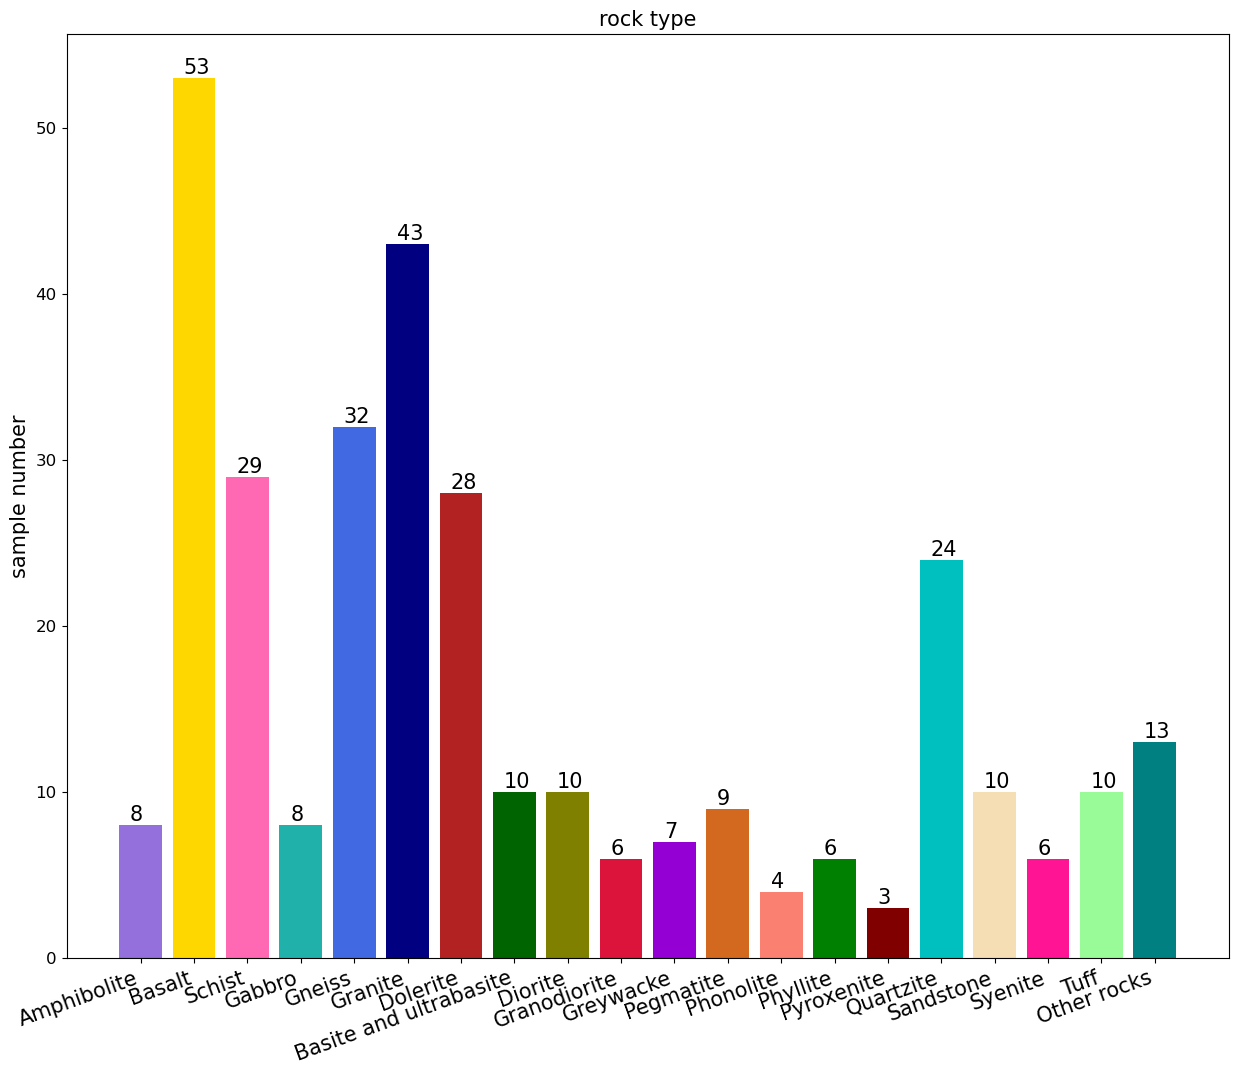

In [52]:
x_category = [
    "Amphibolite",
    "Basalt",
    "Schist",
    "Gabbro",
    "Gneiss",
    "Granite",
    "Dolerite",
    "Basite and ultrabasite",
    "Diorite",
    "Granodiorite",
    "Greywacke",
    "Pegmatite",
    "Phonolite",
    "Phyllite",
    "Pyroxenite",
    "Quartzite",
    "Sandstone",
    "Syenite",
    "Tuff",
    "Other rocks",
]

y_sample_num = [
    len(NAPA_amphibolite_df),
    len(NAPA_Basalt_df),
    len(NAPA_schist_df),
    len(NAPA_Gabbro_df),
    len(NAPA_Gneis_df),
    len(NAPA_Granite_df),
    len(NAPA_Dolerite_df),
    len(NAPA_Basite_and_ultrabasite_df),
    len(NAPA_Diorit_df),
    len(NAPA_Granodiorite_df),
    len(NAPA_Grauwacke_df),
    len(NAPA_Pegmatite_df),
    len(NAPA_Phonolite_df),
    len(NAPA_Phyllit_df),
    len(NAPA_Pyroxenit_df),
    len(NAPA_Quarzit_df),
    len(NAPA_Sandstone_df),
    len(NAPA_Syenite_df),
    len(NAPA_Tuff_df),
    len(NAPA_Spectail_rocks_df),
]

# plot
figure1 = plt.figure(figsize=(15, 12), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

plt.bar(
    x_category,
    y_sample_num,
    color=[
        "mediumpurple",
        "gold",
        "hotpink",
        "lightseagreen",
        "royalblue",
        "navy",
        "firebrick",
        "darkgreen",
        "olive",
        "crimson",
        "darkviolet",
        "chocolate",
        "salmon",
        "green",
        "maroon",
        "c",
        "wheat",
        "deeppink",
        "palegreen",
        "teal",
    ],
)

plt.title("rock type", fontsize=15)
plt.ylabel("sample number", fontsize=15)
plt.setp(ax1.get_xticklabels(), rotation=20, ha="right")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.xaxis.set_tick_params(labelsize=15)
# ax1.grid(visible=True, which='major' ,axis='y' , color='k', linestyle='-' , alpha=0.35)

for p in ax1.patches:
    ax1.annotate(
        "{:.0f}".format(p.get_height()),
        (p.get_x() + 0.20, p.get_height() + 0.25),
        fontsize=15,
    )

plt.savefig(
    export_fig_path_NAPA + "sample_histogramm_rock_typ.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

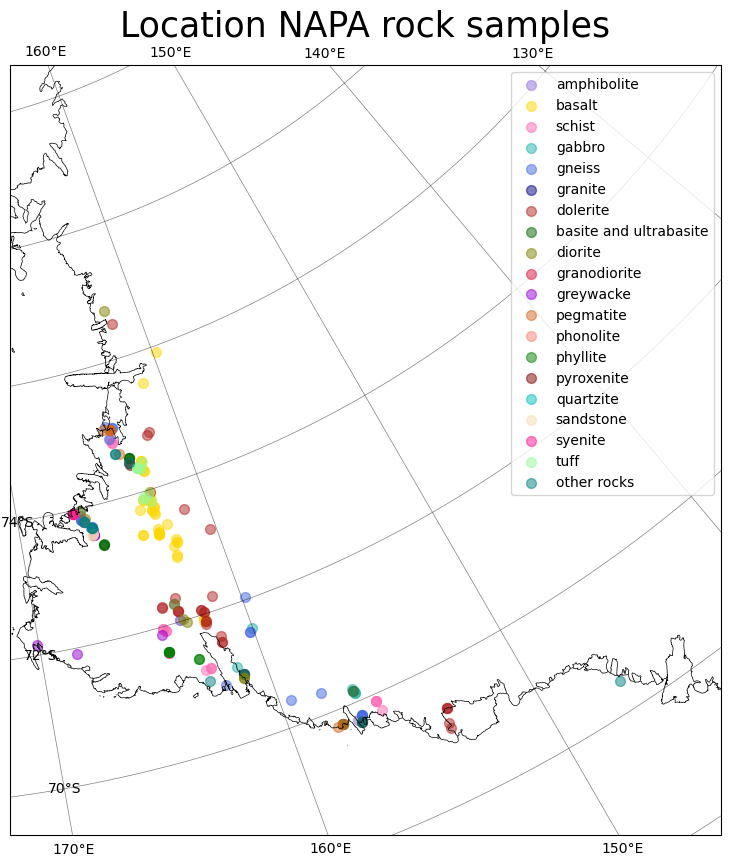

In [53]:
makersize_ix = 15

# create figure
figure1 = plt.figure(figsize=(15, 10), facecolor="white")

# subplot BA gravity data
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
plt.title("Location NAPA rock samples", fontsize=25)

NAPA_amphibolite_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="mediumpurple",
    markersize=50,
    alpha=0.5,
    label="amphibolite",
)
NAPA_Basalt_ps_gpdf.plot(
    ax=ax1, marker="o", color="gold", markersize=50, alpha=0.5, label="basalt"
)
NAPA_schist_ps_gpdf.plot(
    ax=ax1, marker="o", color="hotpink", markersize=50, alpha=0.5, label="schist"
)
NAPA_Gabbro_ps_gpdf.plot(
    ax=ax1, marker="o", color="lightseagreen", markersize=50, alpha=0.5, label="gabbro"
)
NAPA_Gneis_ps_gpdf.plot(
    ax=ax1, marker="o", color="royalblue", markersize=50, alpha=0.5, label="gneiss"
)
NAPA_Granite_gpdf.plot(
    ax=ax1, marker="o", color="navy", markersize=50, alpha=0.5, label="granite"
)
NAPA_Dolerite_ps_gpdf.plot(
    ax=ax1, marker="o", color="firebrick", markersize=50, alpha=0.5, label="dolerite"
)
NAPA_Basite_and_ultrabasite_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="darkgreen",
    markersize=50,
    alpha=0.5,
    label="basite and ultrabasite",
)
NAPA_Diorit_ps_gpdf.plot(
    ax=ax1, marker="o", color="olive", markersize=50, alpha=0.5, label="diorite"
)
NAPA_Granodiorite_gpdf.plot(
    ax=ax1, marker="o", color="crimson", markersize=50, alpha=0.5, label="granodiorite"
)
NAPA_Grauwacke_ps_gpdf.plot(
    ax=ax1, marker="o", color="darkviolet", markersize=50, alpha=0.5, label="greywacke"
)
NAPA_Pegmatite_ps_gpdf.plot(
    ax=ax1, marker="o", color="chocolate", markersize=50, alpha=0.5, label="pegmatite"
)
NAPA_Phonolite_ps_gpdf.plot(
    ax=ax1, marker="o", color="salmon", markersize=50, alpha=0.5, label="phonolite"
)
NAPA_Phyllit_ps_gpdf.plot(
    ax=ax1, marker="o", color="green", markersize=50, alpha=0.5, label="phyllite"
)
NAPA_Pyroxenit_ps_gpdf.plot(
    ax=ax1, marker="o", color="maroon", markersize=50, alpha=0.5, label="pyroxenite"
)
NAPA_Quarzit_gpdf.plot(
    ax=ax1, marker="o", color="c", markersize=50, alpha=0.5, label="quartzite"
)
NAPA_Sandstone_ps_gpdf.plot(
    ax=ax1, marker="o", color="wheat", markersize=50, alpha=0.5, label="sandstone"
)
NAPA_Syenite_ps_gpdf.plot(
    ax=ax1, marker="o", color="deeppink", markersize=50, alpha=0.5, label="syenite"
)
NAPA_Tuff_ps_gpdf.plot(
    ax=ax1, marker="o", color="palegreen", markersize=50, alpha=0.5, label="tuff"
)
NAPA_Spectail_rocks_ps_gpdf.plot(
    ax=ax1, marker="o", color="teal", markersize=50, alpha=0.5, label="other rocks"
)


ax1.set_xlim([0.3e6, 1.5e6])
ax1.set_ylim([-2.3e6, -1e6])
ax1.legend(loc="upper right")
ax1.gridlines(
    linewidth=0.5,
    draw_labels=True,
    color="k",
    alpha=0.5,
    linestyle="-",
    rotate_labels=0,
)
Coastline.plot(ax=ax1, color="k", linewidth=0.5)
plt.savefig(
    export_fig_path_NAPA + "rock_typ_location.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

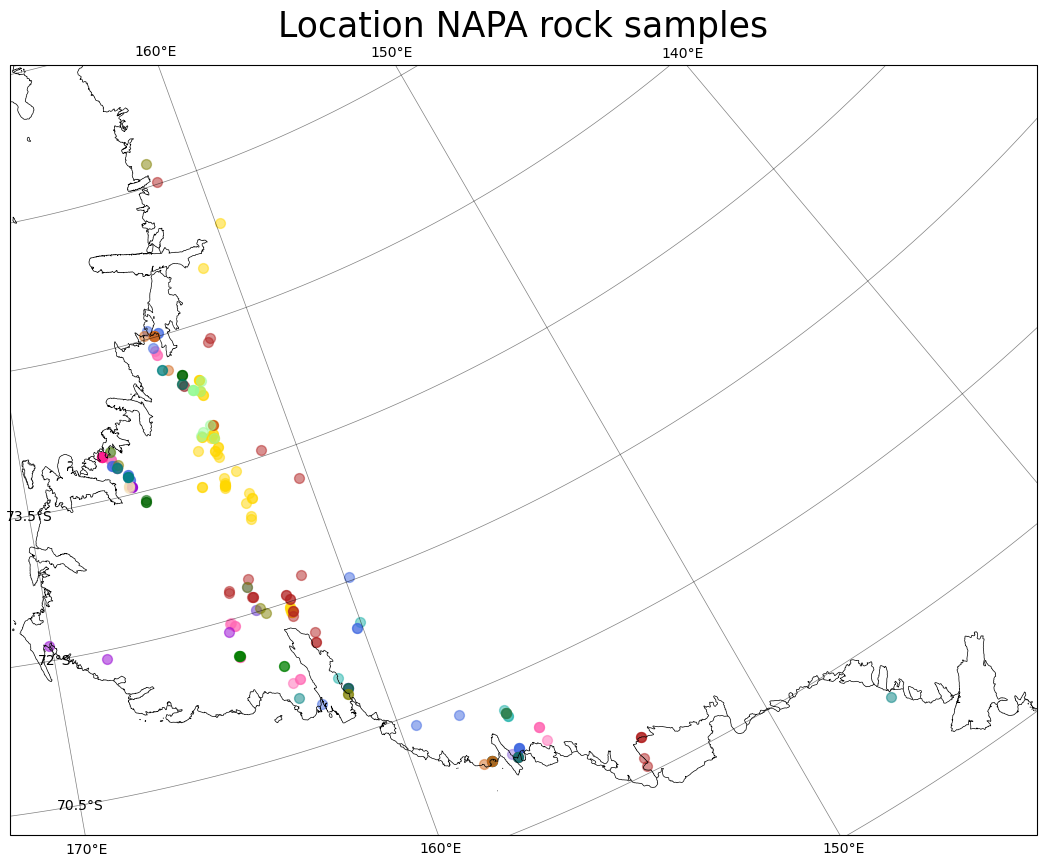

In [54]:
makersize_ix = 15

# create figure
figure1 = plt.figure(figsize=(15, 10), facecolor="white")

# subplot BA gravity data
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
plt.title("Location NAPA rock samples", fontsize=25)

NAPA_amphibolite_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="mediumpurple",
    markersize=50,
    alpha=0.5,
    label="amphibolite",
)
NAPA_Basalt_ps_gpdf.plot(
    ax=ax1, marker="o", color="gold", markersize=50, alpha=0.5, label="basalt"
)
NAPA_schist_ps_gpdf.plot(
    ax=ax1, marker="o", color="hotpink", markersize=50, alpha=0.5, label="schist"
)
NAPA_Gabbro_ps_gpdf.plot(
    ax=ax1, marker="o", color="lightseagreen", markersize=50, alpha=0.5, label="gabbro"
)
NAPA_Gneis_ps_gpdf.plot(
    ax=ax1, marker="o", color="royalblue", markersize=50, alpha=0.5, label="gneiss"
)
NAPA_Granite_gpdf.plot(
    ax=ax1, marker="o", color="navy", markersize=50, alpha=0.5, label="granite"
)
NAPA_Dolerite_ps_gpdf.plot(
    ax=ax1, marker="o", color="firebrick", markersize=50, alpha=0.5, label="dolerite"
)
NAPA_Basite_and_ultrabasite_ps_gpdf.plot(
    ax=ax1,
    marker="o",
    color="darkgreen",
    markersize=50,
    alpha=0.5,
    label="basite and ultrabasite",
)
NAPA_Diorit_ps_gpdf.plot(
    ax=ax1, marker="o", color="olive", markersize=50, alpha=0.5, label="diorite"
)
NAPA_Granodiorite_gpdf.plot(
    ax=ax1, marker="o", color="crimson", markersize=50, alpha=0.5, label="granodiorite"
)
NAPA_Grauwacke_ps_gpdf.plot(
    ax=ax1, marker="o", color="darkviolet", markersize=50, alpha=0.5, label="greywacke"
)
NAPA_Pegmatite_ps_gpdf.plot(
    ax=ax1, marker="o", color="chocolate", markersize=50, alpha=0.5, label="pegmatite"
)
NAPA_Phonolite_ps_gpdf.plot(
    ax=ax1, marker="o", color="salmon", markersize=50, alpha=0.5, label="phonolite"
)
NAPA_Phyllit_ps_gpdf.plot(
    ax=ax1, marker="o", color="green", markersize=50, alpha=0.5, label="phyllite"
)
NAPA_Pyroxenit_ps_gpdf.plot(
    ax=ax1, marker="o", color="maroon", markersize=50, alpha=0.5, label="pyroxenite"
)
NAPA_Quarzit_gpdf.plot(
    ax=ax1, marker="o", color="c", markersize=50, alpha=0.5, label="quartzite"
)
NAPA_Sandstone_ps_gpdf.plot(
    ax=ax1, marker="o", color="wheat", markersize=50, alpha=0.5, label="sandstone"
)
NAPA_Syenite_ps_gpdf.plot(
    ax=ax1, marker="o", color="deeppink", markersize=50, alpha=0.5, label="syenite"
)
NAPA_Tuff_ps_gpdf.plot(
    ax=ax1, marker="o", color="palegreen", markersize=50, alpha=0.5, label="tuff"
)
NAPA_Spectail_rocks_ps_gpdf.plot(
    ax=ax1, marker="o", color="teal", markersize=50, alpha=0.5, label="other rocks"
)

ax1.set_xlim([0.3e6, 1.5e6])
ax1.set_ylim([-2.2e6, -1.3e6])

# ax1.legend(loc='upper right')
ax1.gridlines(
    linewidth=0.5,
    draw_labels=True,
    color="k",
    alpha=0.5,
    linestyle="-",
    rotate_labels=0,
)
Coastline.plot(ax=ax1, color="k", linewidth=0.5)
plt.savefig(
    export_fig_path_NAPA + "rock_typ_location_zoom_paper.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

#### plot density box plot

In [55]:
amphibolite_all_sus_NAPA = np.vstack(
    [
        NAPA_amphibolite_df["susceptibility 1 [10-3 SI]"],
        NAPA_amphibolite_df["susceptibility 2 [10-3 SI]"],
        NAPA_amphibolite_df["susceptibility 3 [10-3 SI]"],
        NAPA_amphibolite_df["susceptibility 4 [10-3 SI]"],
        NAPA_amphibolite_df["susceptibility 5 [10-3 SI]"],
        NAPA_amphibolite_df["susceptibility 6 [10-3 SI]"],
        NAPA_amphibolite_df["susceptibility 7 [10-3 SI]"],
        NAPA_amphibolite_df["susceptibility 8 [10-3 SI]"],
    ]
).T

basalt_all_sus_NAPA = np.vstack(
    [
        NAPA_Basalt_df["susceptibility 1 [10-3 SI]"],
        NAPA_Basalt_df["susceptibility 2 [10-3 SI]"],
        NAPA_Basalt_df["susceptibility 3 [10-3 SI]"],
        NAPA_Basalt_df["susceptibility 4 [10-3 SI]"],
        NAPA_Basalt_df["susceptibility 5 [10-3 SI]"],
        NAPA_Basalt_df["susceptibility 6 [10-3 SI]"],
        NAPA_Basalt_df["susceptibility 7 [10-3 SI]"],
        NAPA_Basalt_df["susceptibility 8 [10-3 SI]"],
    ]
).T

basite_ultrabasite_all_sus_NAPA = np.vstack(
    [
        NAPA_Basite_and_ultrabasite_df["susceptibility 1 [10-3 SI]"],
        NAPA_Basite_and_ultrabasite_df["susceptibility 2 [10-3 SI]"],
        NAPA_Basite_and_ultrabasite_df["susceptibility 3 [10-3 SI]"],
        NAPA_Basite_and_ultrabasite_df["susceptibility 4 [10-3 SI]"],
        NAPA_Basite_and_ultrabasite_df["susceptibility 5 [10-3 SI]"],
        NAPA_Basite_and_ultrabasite_df["susceptibility 6 [10-3 SI]"],
        NAPA_Basite_and_ultrabasite_df["susceptibility 7 [10-3 SI]"],
        NAPA_Basite_and_ultrabasite_df["susceptibility 8 [10-3 SI]"],
    ]
).T

diorite_all_sus_NAPA = np.vstack(
    [
        NAPA_Diorit_df["susceptibility 1 [10-3 SI]"],
        NAPA_Diorit_df["susceptibility 2 [10-3 SI]"],
        NAPA_Diorit_df["susceptibility 3 [10-3 SI]"],
        NAPA_Diorit_df["susceptibility 4 [10-3 SI]"],
        NAPA_Diorit_df["susceptibility 5 [10-3 SI]"],
        NAPA_Diorit_df["susceptibility 6 [10-3 SI]"],
        NAPA_Diorit_df["susceptibility 7 [10-3 SI]"],
        NAPA_Diorit_df["susceptibility 8 [10-3 SI]"],
    ]
).T

dolerite_all_sus_NAPA = np.vstack(
    [
        NAPA_Dolerite_df["susceptibility 1 [10-3 SI]"],
        NAPA_Dolerite_df["susceptibility 2 [10-3 SI]"],
        NAPA_Dolerite_df["susceptibility 3 [10-3 SI]"],
        NAPA_Dolerite_df["susceptibility 4 [10-3 SI]"],
        NAPA_Dolerite_df["susceptibility 5 [10-3 SI]"],
        NAPA_Dolerite_df["susceptibility 6 [10-3 SI]"],
        NAPA_Dolerite_df["susceptibility 7 [10-3 SI]"],
        NAPA_Dolerite_df["susceptibility 8 [10-3 SI]"],
    ]
).T

gabbro_all_sus_NAPA = np.vstack(
    [
        NAPA_Gabbro_df["susceptibility 1 [10-3 SI]"],
        NAPA_Gabbro_df["susceptibility 2 [10-3 SI]"],
        NAPA_Gabbro_df["susceptibility 3 [10-3 SI]"],
        NAPA_Gabbro_df["susceptibility 4 [10-3 SI]"],
        NAPA_Gabbro_df["susceptibility 5 [10-3 SI]"],
        NAPA_Gabbro_df["susceptibility 6 [10-3 SI]"],
        NAPA_Gabbro_df["susceptibility 7 [10-3 SI]"],
        NAPA_Gabbro_df["susceptibility 8 [10-3 SI]"],
    ]
).T

gneiss_all_sus_NAPA = np.vstack(
    [
        NAPA_Gneis_df["susceptibility 1 [10-3 SI]"],
        NAPA_Gneis_df["susceptibility 2 [10-3 SI]"],
        NAPA_Gneis_df["susceptibility 3 [10-3 SI]"],
        NAPA_Gneis_df["susceptibility 4 [10-3 SI]"],
        NAPA_Gneis_df["susceptibility 5 [10-3 SI]"],
        NAPA_Gneis_df["susceptibility 6 [10-3 SI]"],
        NAPA_Gneis_df["susceptibility 7 [10-3 SI]"],
        NAPA_Gneis_df["susceptibility 8 [10-3 SI]"],
    ]
).T

granite_all_sus_NAPA = np.vstack(
    [
        NAPA_Granite_df["susceptibility 1 [10-3 SI]"],
        NAPA_Granite_df["susceptibility 2 [10-3 SI]"],
        NAPA_Granite_df["susceptibility 3 [10-3 SI]"],
        NAPA_Granite_df["susceptibility 4 [10-3 SI]"],
        NAPA_Granite_df["susceptibility 5 [10-3 SI]"],
        NAPA_Granite_df["susceptibility 6 [10-3 SI]"],
        NAPA_Granite_df["susceptibility 7 [10-3 SI]"],
        NAPA_Granite_df["susceptibility 8 [10-3 SI]"],
    ]
).T

granodiorite_all_sus_NAPA = np.vstack(
    [
        NAPA_Granodiorite_df["susceptibility 1 [10-3 SI]"],
        NAPA_Granodiorite_df["susceptibility 2 [10-3 SI]"],
        NAPA_Granodiorite_df["susceptibility 3 [10-3 SI]"],
        NAPA_Granodiorite_df["susceptibility 4 [10-3 SI]"],
        NAPA_Granodiorite_df["susceptibility 5 [10-3 SI]"],
        NAPA_Granodiorite_df["susceptibility 6 [10-3 SI]"],
        NAPA_Granodiorite_df["susceptibility 7 [10-3 SI]"],
        NAPA_Granodiorite_df["susceptibility 8 [10-3 SI]"],
    ]
).T

greywacke_all_sus_NAPA = np.vstack(
    [
        NAPA_Grauwacke_df["susceptibility 1 [10-3 SI]"],
        NAPA_Grauwacke_df["susceptibility 2 [10-3 SI]"],
        NAPA_Grauwacke_df["susceptibility 3 [10-3 SI]"],
        NAPA_Grauwacke_df["susceptibility 4 [10-3 SI]"],
        NAPA_Grauwacke_df["susceptibility 5 [10-3 SI]"],
        NAPA_Grauwacke_df["susceptibility 6 [10-3 SI]"],
        NAPA_Grauwacke_df["susceptibility 7 [10-3 SI]"],
        NAPA_Grauwacke_df["susceptibility 8 [10-3 SI]"],
    ]
).T

pegmatite_all_sus_NAPA = np.vstack(
    [
        NAPA_Pegmatite_df["susceptibility 1 [10-3 SI]"],
        NAPA_Pegmatite_df["susceptibility 2 [10-3 SI]"],
        NAPA_Pegmatite_df["susceptibility 3 [10-3 SI]"],
        NAPA_Pegmatite_df["susceptibility 4 [10-3 SI]"],
        NAPA_Pegmatite_df["susceptibility 5 [10-3 SI]"],
        NAPA_Pegmatite_df["susceptibility 6 [10-3 SI]"],
        NAPA_Pegmatite_df["susceptibility 7 [10-3 SI]"],
        NAPA_Pegmatite_df["susceptibility 8 [10-3 SI]"],
    ]
).T

phonolite_all_sus_NAPA = np.vstack(
    [
        NAPA_Phonolite_df["susceptibility 1 [10-3 SI]"],
        NAPA_Phonolite_df["susceptibility 2 [10-3 SI]"],
        NAPA_Phonolite_df["susceptibility 3 [10-3 SI]"],
        NAPA_Phonolite_df["susceptibility 4 [10-3 SI]"],
        NAPA_Phonolite_df["susceptibility 5 [10-3 SI]"],
        NAPA_Phonolite_df["susceptibility 6 [10-3 SI]"],
        NAPA_Phonolite_df["susceptibility 7 [10-3 SI]"],
        NAPA_Phonolite_df["susceptibility 8 [10-3 SI]"],
    ]
).T

phyllite_all_sus_NAPA = np.vstack(
    [
        NAPA_Phyllit_df["susceptibility 1 [10-3 SI]"],
        NAPA_Phyllit_df["susceptibility 2 [10-3 SI]"],
        NAPA_Phyllit_df["susceptibility 3 [10-3 SI]"],
        NAPA_Phyllit_df["susceptibility 4 [10-3 SI]"],
        NAPA_Phyllit_df["susceptibility 5 [10-3 SI]"],
        NAPA_Phyllit_df["susceptibility 6 [10-3 SI]"],
        NAPA_Phyllit_df["susceptibility 7 [10-3 SI]"],
        NAPA_Phyllit_df["susceptibility 8 [10-3 SI]"],
    ]
).T

pyroxenite_all_sus_NAPA = np.vstack(
    [
        NAPA_Pyroxenit_df["susceptibility 1 [10-3 SI]"],
        NAPA_Pyroxenit_df["susceptibility 2 [10-3 SI]"],
        NAPA_Pyroxenit_df["susceptibility 3 [10-3 SI]"],
        NAPA_Pyroxenit_df["susceptibility 4 [10-3 SI]"],
        NAPA_Pyroxenit_df["susceptibility 5 [10-3 SI]"],
        NAPA_Pyroxenit_df["susceptibility 6 [10-3 SI]"],
        NAPA_Pyroxenit_df["susceptibility 7 [10-3 SI]"],
        NAPA_Pyroxenit_df["susceptibility 8 [10-3 SI]"],
    ]
).T

quartzite_all_sus_NAPA = np.vstack(
    [
        NAPA_Quarzit_df["susceptibility 1 [10-3 SI]"],
        NAPA_Quarzit_df["susceptibility 2 [10-3 SI]"],
        NAPA_Quarzit_df["susceptibility 3 [10-3 SI]"],
        NAPA_Quarzit_df["susceptibility 4 [10-3 SI]"],
        NAPA_Quarzit_df["susceptibility 5 [10-3 SI]"],
        NAPA_Quarzit_df["susceptibility 6 [10-3 SI]"],
        NAPA_Quarzit_df["susceptibility 7 [10-3 SI]"],
        NAPA_Quarzit_df["susceptibility 8 [10-3 SI]"],
    ]
).T

sandstone_all_sus_NAPA = np.vstack(
    [
        NAPA_Sandstone_df["susceptibility 1 [10-3 SI]"],
        NAPA_Sandstone_df["susceptibility 2 [10-3 SI]"],
        NAPA_Sandstone_df["susceptibility 3 [10-3 SI]"],
        NAPA_Sandstone_df["susceptibility 4 [10-3 SI]"],
        NAPA_Sandstone_df["susceptibility 5 [10-3 SI]"],
        NAPA_Sandstone_df["susceptibility 6 [10-3 SI]"],
        NAPA_Sandstone_df["susceptibility 7 [10-3 SI]"],
        NAPA_Sandstone_df["susceptibility 8 [10-3 SI]"],
    ]
).T

schist_all_sus_NAPA = np.vstack(
    [
        NAPA_schist_df["susceptibility 1 [10-3 SI]"],
        NAPA_schist_df["susceptibility 2 [10-3 SI]"],
        NAPA_schist_df["susceptibility 3 [10-3 SI]"],
        NAPA_schist_df["susceptibility 4 [10-3 SI]"],
        NAPA_schist_df["susceptibility 5 [10-3 SI]"],
        NAPA_schist_df["susceptibility 6 [10-3 SI]"],
        NAPA_schist_df["susceptibility 7 [10-3 SI]"],
        NAPA_schist_df["susceptibility 8 [10-3 SI]"],
    ]
).T


syenite_all_sus_NAPA = np.vstack(
    [
        NAPA_Syenite_df["susceptibility 1 [10-3 SI]"],
        NAPA_Syenite_df["susceptibility 2 [10-3 SI]"],
        NAPA_Syenite_df["susceptibility 3 [10-3 SI]"],
        NAPA_Syenite_df["susceptibility 4 [10-3 SI]"],
        NAPA_Syenite_df["susceptibility 5 [10-3 SI]"],
        NAPA_Syenite_df["susceptibility 6 [10-3 SI]"],
        NAPA_Syenite_df["susceptibility 7 [10-3 SI]"],
        NAPA_Syenite_df["susceptibility 8 [10-3 SI]"],
    ]
).T

tuff_all_sus_NAPA = np.vstack(
    [
        NAPA_Tuff_df["susceptibility 1 [10-3 SI]"],
        NAPA_Tuff_df["susceptibility 2 [10-3 SI]"],
        NAPA_Tuff_df["susceptibility 3 [10-3 SI]"],
        NAPA_Tuff_df["susceptibility 4 [10-3 SI]"],
        NAPA_Tuff_df["susceptibility 5 [10-3 SI]"],
        NAPA_Tuff_df["susceptibility 6 [10-3 SI]"],
        NAPA_Tuff_df["susceptibility 7 [10-3 SI]"],
        NAPA_Tuff_df["susceptibility 8 [10-3 SI]"],
    ]
).T

special_rocks_all_sus_NAPA = np.vstack(
    [
        NAPA_Spectail_rocks_df["susceptibility 1 [10-3 SI]"],
        NAPA_Spectail_rocks_df["susceptibility 2 [10-3 SI]"],
        NAPA_Spectail_rocks_df["susceptibility 3 [10-3 SI]"],
        NAPA_Spectail_rocks_df["susceptibility 4 [10-3 SI]"],
        NAPA_Spectail_rocks_df["susceptibility 5 [10-3 SI]"],
        NAPA_Spectail_rocks_df["susceptibility 6 [10-3 SI]"],
        NAPA_Spectail_rocks_df["susceptibility 7 [10-3 SI]"],
        NAPA_Spectail_rocks_df["susceptibility 8 [10-3 SI]"],
    ]
).T

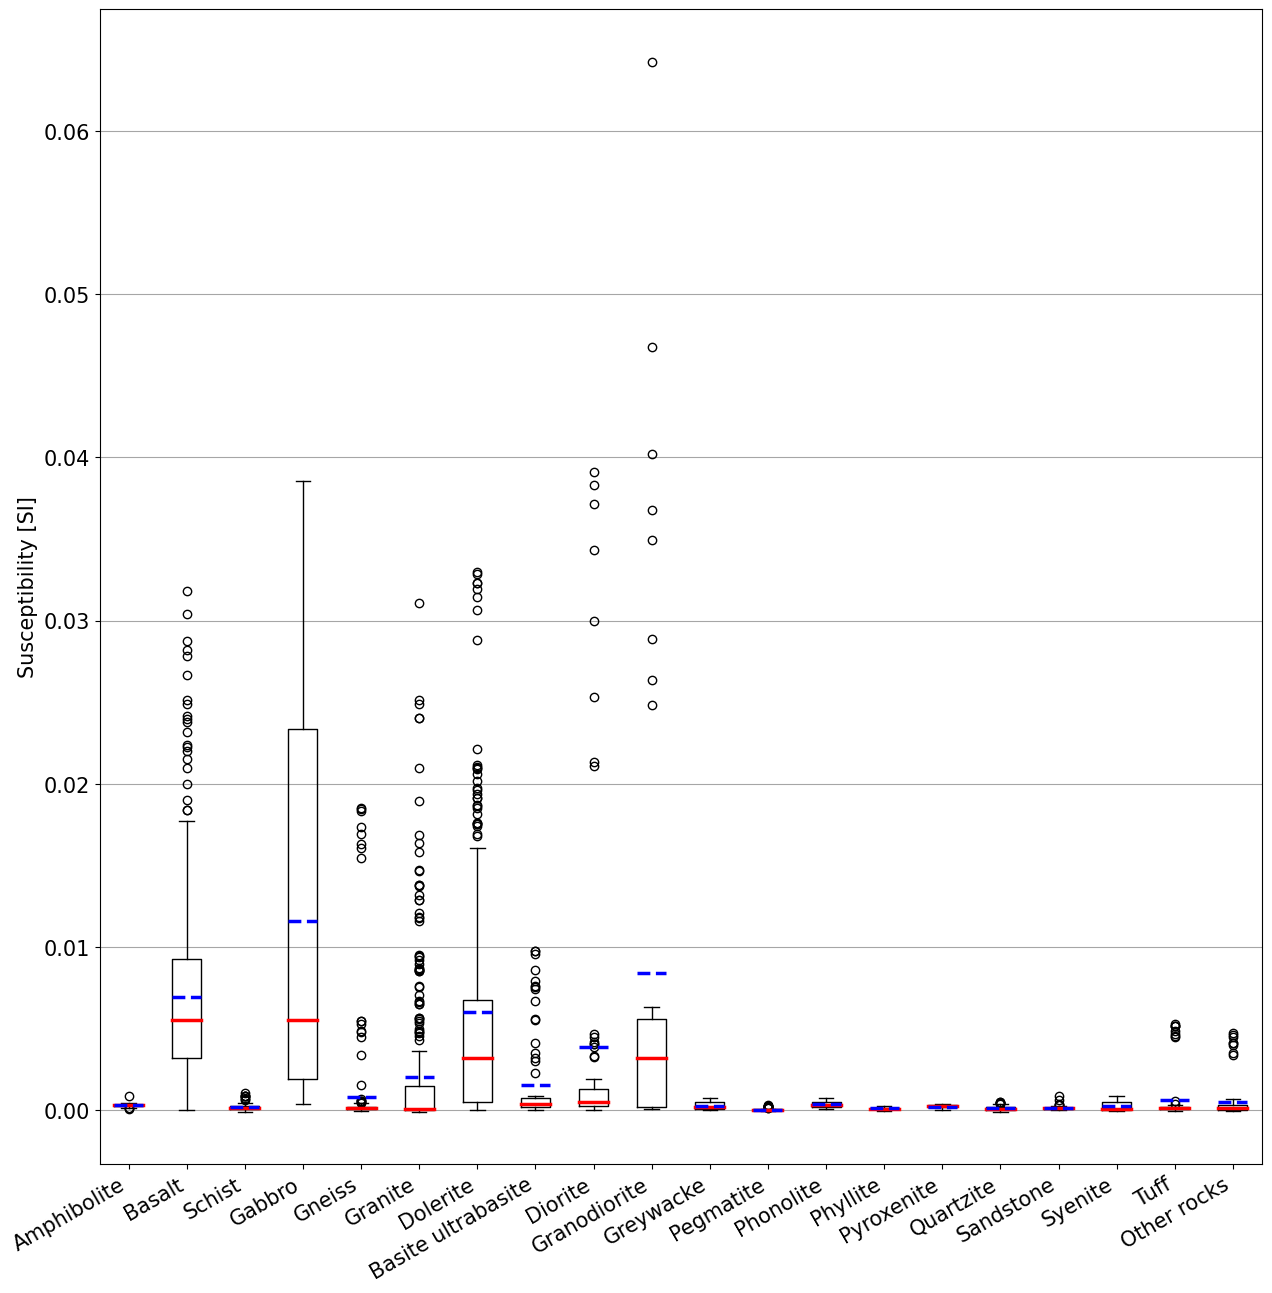

In [56]:
medianprops = dict(linestyle="-", linewidth=2.5, color="r")
mean = dict(linestyle="--", linewidth=2.5, color="b")


sus_values_ls = [
    amphibolite_all_sus_NAPA.flatten(),
    basalt_all_sus_NAPA.flatten(),
    schist_all_sus_NAPA.flatten(),
    gabbro_all_sus_NAPA.flatten(),
    gneiss_all_sus_NAPA.flatten(),
    granite_all_sus_NAPA.flatten(),
    dolerite_all_sus_NAPA.flatten(),
    basite_ultrabasite_all_sus_NAPA.flatten(),
    diorite_all_sus_NAPA.flatten(),
    granodiorite_all_sus_NAPA.flatten(),
    greywacke_all_sus_NAPA.flatten(),
    pegmatite_all_sus_NAPA.flatten(),
    phonolite_all_sus_NAPA.flatten(),
    phyllite_all_sus_NAPA.flatten(),
    pyroxenite_all_sus_NAPA.flatten(),
    quartzite_all_sus_NAPA.flatten(),
    sandstone_all_sus_NAPA.flatten(),
    syenite_all_sus_NAPA.flatten(),
    tuff_all_sus_NAPA.flatten(),
    special_rocks_all_sus_NAPA.flatten(),
]

figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

ax1.boxplot(
    sus_values_ls,
    medianprops=medianprops,
    meanline=True,
    showmeans=True,
    meanprops=mean,
)

x_labels = [
    "Amphibolite",
    "Basalt",
    "Schist",
    "Gabbro",
    "Gneiss",
    "Granite",
    "Dolerite",
    "Basite ultrabasite",
    "Diorite",
    "Granodiorite",
    "Greywacke",
    "Pegmatite",
    "Phonolite",
    "Phyllite",
    "Pyroxenite",
    "Quartzite",
    "Sandstone",
    "Syenite",
    "Tuff",
    "Other rocks",
]

x_ticks_num = np.arange(1, 21, 1)
plt.xticks(x_ticks_num, x_labels)
plt.setp(ax1.get_xticklabels(), rotation=30, ha="right")
ax1.set_ylabel("Susceptibility [SI]", fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.grid(visible=True, which="major", axis="y", color="k", linestyle="-", alpha=0.35)
plt.savefig(
    export_fig_path_NAPA + "box_plot_susceptibility_rock_typ.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

#### Plot density box plot 

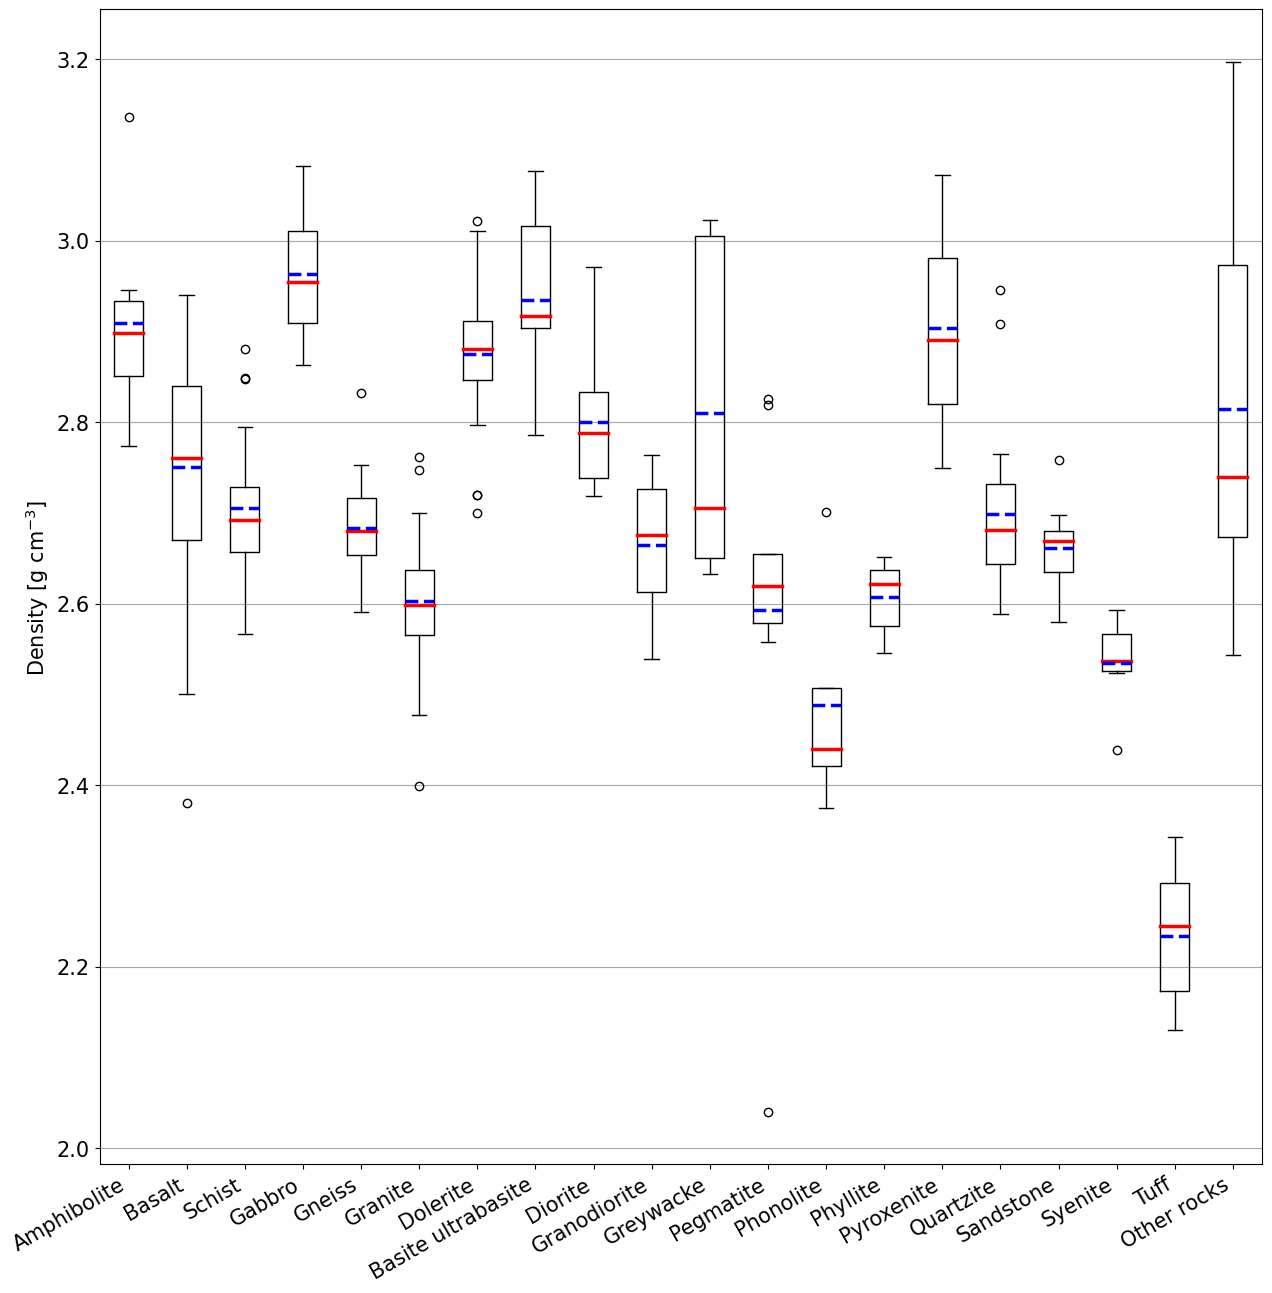

In [57]:
medianprops = dict(linestyle="-", linewidth=2.5, color="r")
mean = dict(linestyle="--", linewidth=2.5, color="b")


dens_values_ls = [
    NAPA_amphibolite_df["density [g/cm^3]"],
    NAPA_Basalt_df["density [g/cm^3]"],
    NAPA_schist_df["density [g/cm^3]"],
    NAPA_Gabbro_df["density [g/cm^3]"],
    NAPA_Gneis_df["density [g/cm^3]"],
    NAPA_Granite_df["density [g/cm^3]"],
    NAPA_Dolerite_df["density [g/cm^3]"],
    NAPA_Basite_and_ultrabasite_df["density [g/cm^3]"],
    NAPA_Diorit_df["density [g/cm^3]"],
    NAPA_Granodiorite_df["density [g/cm^3]"],
    NAPA_Grauwacke_df["density [g/cm^3]"],
    NAPA_Pegmatite_df["density [g/cm^3]"],
    NAPA_Phonolite_df["density [g/cm^3]"],
    NAPA_Phyllit_df["density [g/cm^3]"],
    NAPA_Pyroxenit_df["density [g/cm^3]"],
    NAPA_Quarzit_df["density [g/cm^3]"],
    NAPA_Sandstone_df["density [g/cm^3]"],
    NAPA_Syenite_df["density [g/cm^3]"],
    NAPA_Tuff_df["density [g/cm^3]"],
    NAPA_Spectail_rocks_df["density [g/cm^3]"],
]

figure1 = plt.figure(figsize=(15, 15), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

ax1.boxplot(
    dens_values_ls,
    medianprops=medianprops,
    meanline=True,
    showmeans=True,
    meanprops=mean,
)

x_labels = [
    "Amphibolite",
    "Basalt",
    "Schist",
    "Gabbro",
    "Gneiss",
    "Granite",
    "Dolerite",
    "Basite ultrabasite",
    "Diorite",
    "Granodiorite",
    "Greywacke",
    "Pegmatite",
    "Phonolite",
    "Phyllite",
    "Pyroxenite",
    "Quartzite",
    "Sandstone",
    "Syenite",
    "Tuff",
    "Other rocks",
]

x_ticks_num = np.arange(1, 21, 1)
plt.xticks(x_ticks_num, x_labels)
plt.setp(ax1.get_xticklabels(), rotation=30, ha="right")
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.grid(visible=True, which="major", axis="y", color="k", linestyle="-", alpha=0.35)
plt.savefig(
    export_fig_path_NAPA + "box_plot_density_rock_typ.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

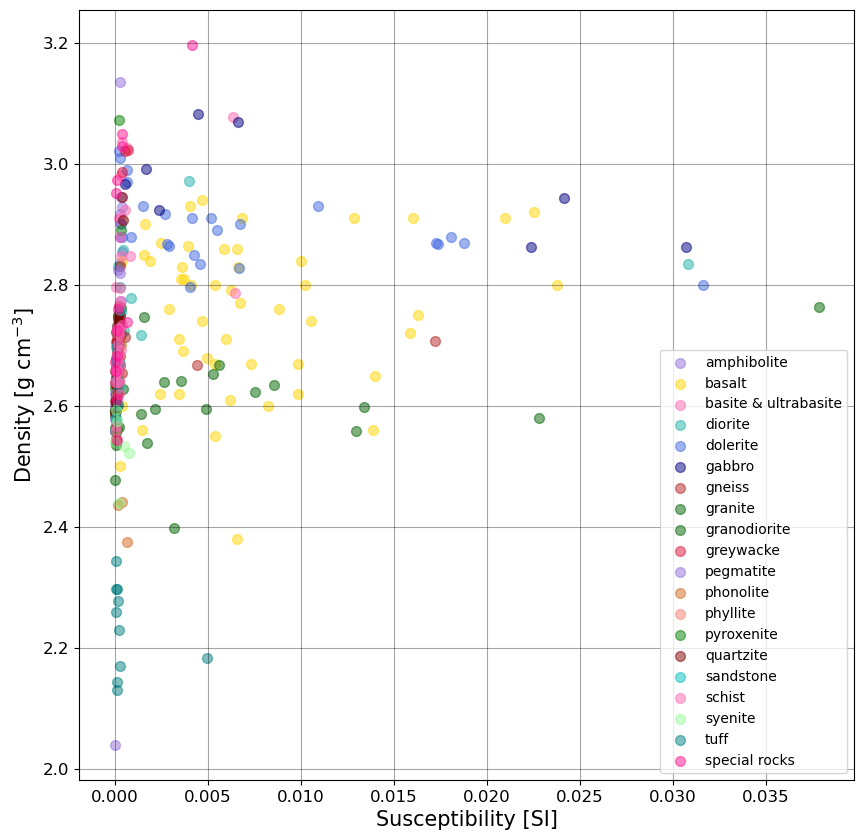

In [58]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

NAPA_amphibolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
    label="amphibolite",
)
NAPA_Basalt_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="gold",
    alpha=0.5,
    label="basalt",
)
NAPA_Basite_and_ultrabasite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
    label="basite & ultrabasite",
)
NAPA_Diorit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="lightseagreen",
    alpha=0.5,
    label="diorite",
)
NAPA_Dolerite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="royalblue",
    alpha=0.5,
    label="dolerite",
)
NAPA_Gabbro_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="navy",
    alpha=0.5,
    label="gabbro",
)
NAPA_Gneis_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="firebrick",
    alpha=0.5,
    label="gneiss",
)
NAPA_Granite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
    label="granite",
)
NAPA_Granodiorite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
    label="granodiorite",
)
NAPA_Grauwacke_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="crimson",
    alpha=0.5,
    label="greywacke",
)
NAPA_Pegmatite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
    label="pegmatite",
)
NAPA_Phonolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
    label="phonolite",
)
NAPA_Phyllit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="salmon",
    alpha=0.5,
    label="phyllite",
)
NAPA_Pyroxenit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="green",
    alpha=0.5,
    label="pyroxenite",
)
NAPA_Quarzit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="maroon",
    alpha=0.5,
    label="quartzite",
)
NAPA_Sandstone_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="c",
    alpha=0.5,
    label="sandstone",
)
NAPA_schist_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
    label="schist",
)
NAPA_Syenite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="palegreen",
    alpha=0.5,
    label="syenite",
)
NAPA_Tuff_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="teal",
    alpha=0.5,
    label="tuff",
)
NAPA_Spectail_rocks_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="deeppink",
    alpha=0.5,
    label="special rocks",
)

ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_rock_type_colored.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

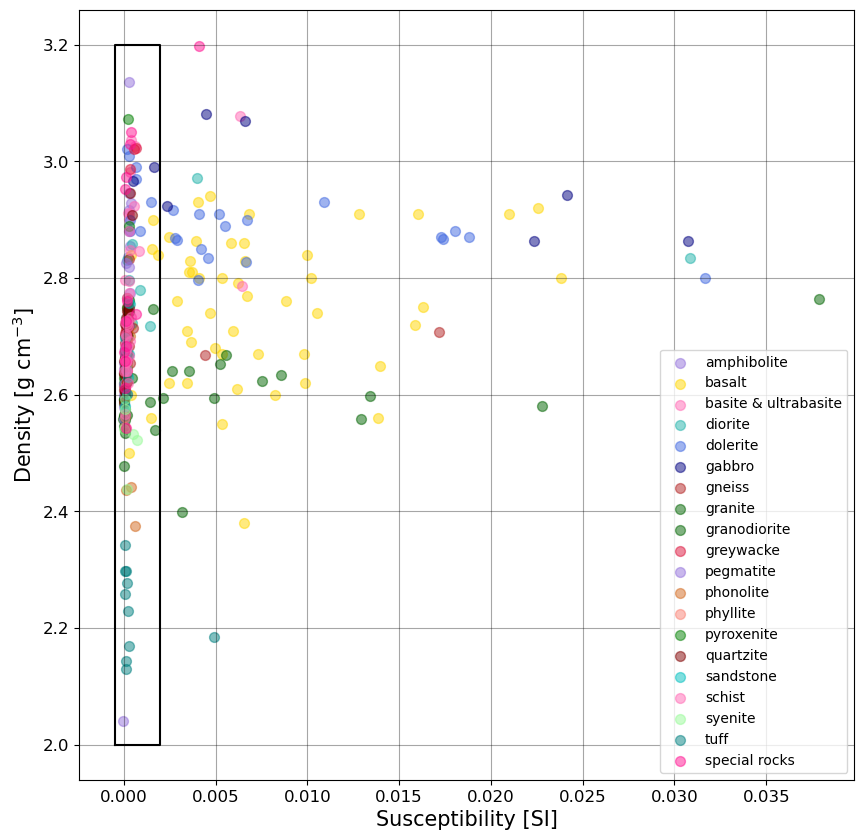

In [59]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

NAPA_amphibolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
    label="amphibolite",
)
NAPA_Basalt_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="gold",
    alpha=0.5,
    label="basalt",
)
NAPA_Basite_and_ultrabasite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
    label="basite & ultrabasite",
)
NAPA_Diorit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="lightseagreen",
    alpha=0.5,
    label="diorite",
)
NAPA_Dolerite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="royalblue",
    alpha=0.5,
    label="dolerite",
)
NAPA_Gabbro_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="navy",
    alpha=0.5,
    label="gabbro",
)
NAPA_Gneis_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="firebrick",
    alpha=0.5,
    label="gneiss",
)
NAPA_Granite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
    label="granite",
)
NAPA_Granodiorite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
    label="granodiorite",
)
NAPA_Grauwacke_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="crimson",
    alpha=0.5,
    label="greywacke",
)
NAPA_Pegmatite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
    label="pegmatite",
)
NAPA_Phonolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
    label="phonolite",
)
NAPA_Phyllit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="salmon",
    alpha=0.5,
    label="phyllite",
)
NAPA_Pyroxenit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="green",
    alpha=0.5,
    label="pyroxenite",
)
NAPA_Quarzit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="maroon",
    alpha=0.5,
    label="quartzite",
)
NAPA_Sandstone_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="c",
    alpha=0.5,
    label="sandstone",
)
NAPA_schist_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
    label="schist",
)
NAPA_Syenite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="palegreen",
    alpha=0.5,
    label="syenite",
)
NAPA_Tuff_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="teal",
    alpha=0.5,
    label="tuff",
)
NAPA_Spectail_rocks_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="deeppink",
    alpha=0.5,
    label="special rocks",
)

ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)

ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend(loc="lower right")
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_rock_type_colored_zoom_area.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

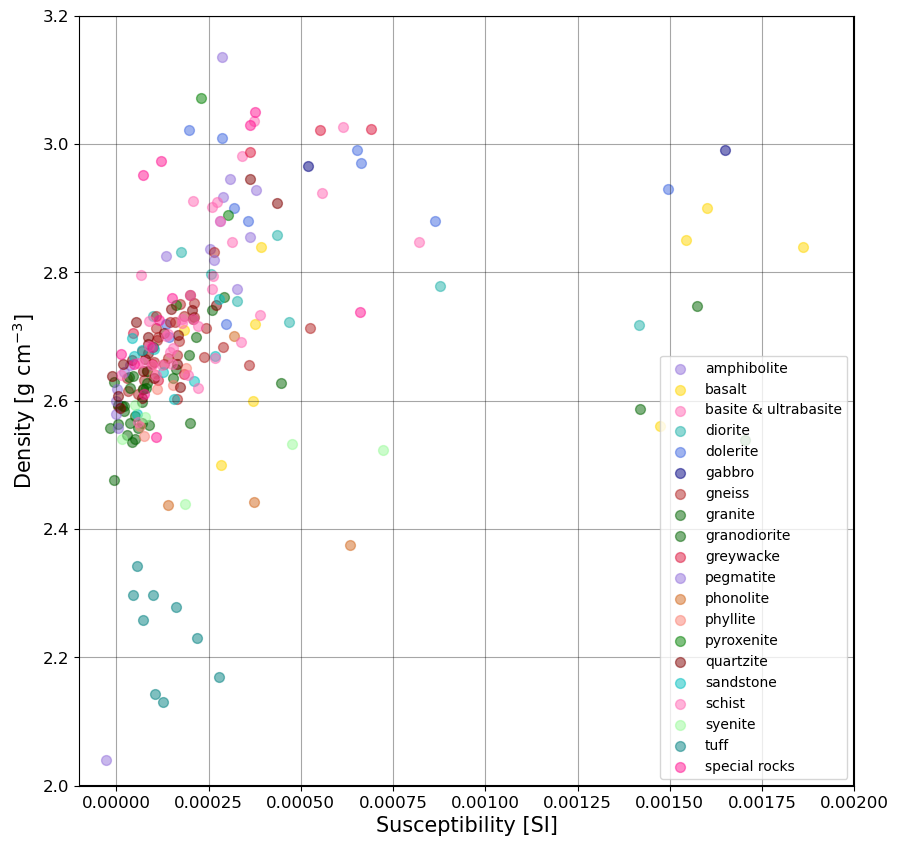

In [60]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

NAPA_amphibolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
    label="amphibolite",
)
NAPA_Basalt_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="gold",
    alpha=0.5,
    label="basalt",
)
NAPA_Basite_and_ultrabasite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
    label="basite & ultrabasite",
)
NAPA_Diorit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="lightseagreen",
    alpha=0.5,
    label="diorite",
)
NAPA_Dolerite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="royalblue",
    alpha=0.5,
    label="dolerite",
)
NAPA_Gabbro_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="navy",
    alpha=0.5,
    label="gabbro",
)
NAPA_Gneis_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="firebrick",
    alpha=0.5,
    label="gneiss",
)
NAPA_Granite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
    label="granite",
)
NAPA_Granodiorite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
    label="granodiorite",
)
NAPA_Grauwacke_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="crimson",
    alpha=0.5,
    label="greywacke",
)
NAPA_Pegmatite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
    label="pegmatite",
)
NAPA_Phonolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
    label="phonolite",
)
NAPA_Phyllit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="salmon",
    alpha=0.5,
    label="phyllite",
)
NAPA_Pyroxenit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="green",
    alpha=0.5,
    label="pyroxenite",
)
NAPA_Quarzit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="maroon",
    alpha=0.5,
    label="quartzite",
)
NAPA_Sandstone_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="c",
    alpha=0.5,
    label="sandstone",
)
NAPA_schist_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
    label="schist",
)
NAPA_Syenite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="palegreen",
    alpha=0.5,
    label="syenite",
)
NAPA_Tuff_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="teal",
    alpha=0.5,
    label="tuff",
)
NAPA_Spectail_rocks_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="deeppink",
    alpha=0.5,
    label="special rocks",
)


ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)

ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend(loc="lower right")

ax1.set_xlim([-0.0001, 0.002])
ax1.set_ylim([2, 3.2])
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_rock_type_zoomed.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

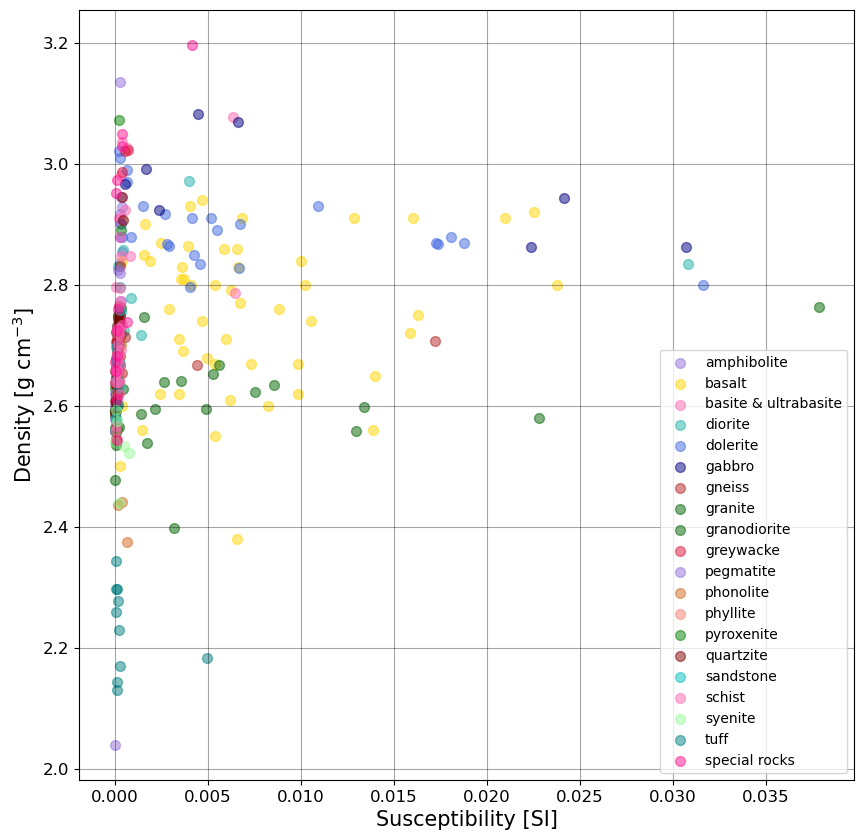

In [61]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

NAPA_amphibolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
    label="amphibolite",
)
NAPA_Basalt_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="gold",
    alpha=0.5,
    label="basalt",
)
NAPA_Basite_and_ultrabasite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
    label="basite & ultrabasite",
)
NAPA_Diorit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="lightseagreen",
    alpha=0.5,
    label="diorite",
)
NAPA_Dolerite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="royalblue",
    alpha=0.5,
    label="dolerite",
)
NAPA_Gabbro_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="navy",
    alpha=0.5,
    label="gabbro",
)
NAPA_Gneis_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="firebrick",
    alpha=0.5,
    label="gneiss",
)
NAPA_Granite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
    label="granite",
)
NAPA_Granodiorite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
    label="granodiorite",
)
NAPA_Grauwacke_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="crimson",
    alpha=0.5,
    label="greywacke",
)
NAPA_Pegmatite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
    label="pegmatite",
)
NAPA_Phonolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
    label="phonolite",
)
NAPA_Phyllit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="salmon",
    alpha=0.5,
    label="phyllite",
)
NAPA_Pyroxenit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="green",
    alpha=0.5,
    label="pyroxenite",
)
NAPA_Quarzit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="maroon",
    alpha=0.5,
    label="quartzite",
)
NAPA_Sandstone_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="c",
    alpha=0.5,
    label="sandstone",
)
NAPA_schist_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
    label="schist",
)
NAPA_Syenite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="palegreen",
    alpha=0.5,
    label="syenite",
)
NAPA_Tuff_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="teal",
    alpha=0.5,
    label="tuff",
)
NAPA_Spectail_rocks_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="deeppink",
    alpha=0.5,
    label="special rocks",
)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_rock_type_colored_error_bars.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

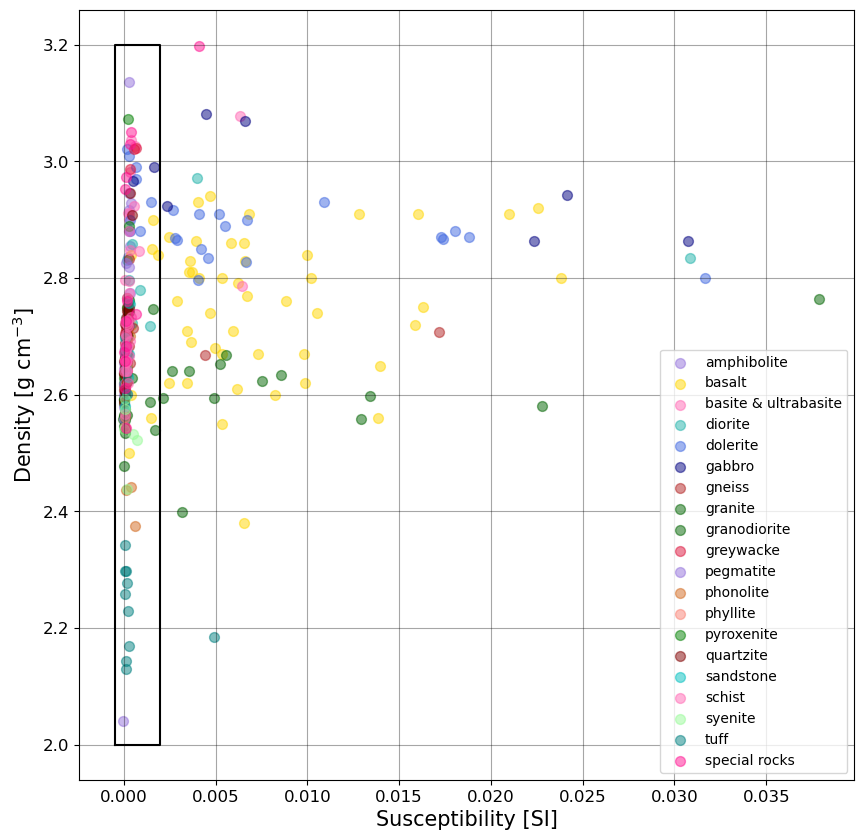

In [62]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

NAPA_amphibolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
    label="amphibolite",
)
NAPA_Basalt_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="gold",
    alpha=0.5,
    label="basalt",
)
NAPA_Basite_and_ultrabasite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
    label="basite & ultrabasite",
)
NAPA_Diorit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="lightseagreen",
    alpha=0.5,
    label="diorite",
)
NAPA_Dolerite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="royalblue",
    alpha=0.5,
    label="dolerite",
)
NAPA_Gabbro_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="navy",
    alpha=0.5,
    label="gabbro",
)
NAPA_Gneis_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="firebrick",
    alpha=0.5,
    label="gneiss",
)
NAPA_Granite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
    label="granite",
)
NAPA_Granodiorite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
    label="granodiorite",
)
NAPA_Grauwacke_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="crimson",
    alpha=0.5,
    label="greywacke",
)
NAPA_Pegmatite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
    label="pegmatite",
)
NAPA_Phonolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
    label="phonolite",
)
NAPA_Phyllit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="salmon",
    alpha=0.5,
    label="phyllite",
)
NAPA_Pyroxenit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="green",
    alpha=0.5,
    label="pyroxenite",
)
NAPA_Quarzit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="maroon",
    alpha=0.5,
    label="quartzite",
)
NAPA_Sandstone_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="c",
    alpha=0.5,
    label="sandstone",
)
NAPA_schist_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
    label="schist",
)
NAPA_Syenite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="palegreen",
    alpha=0.5,
    label="syenite",
)
NAPA_Tuff_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="teal",
    alpha=0.5,
    label="tuff",
)
NAPA_Spectail_rocks_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="deeppink",
    alpha=0.5,
    label="special rocks",
)

ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
plt.savefig(
    export_fig_path_NAPA
    + "sus_dens_plot_rock_type_colored_error_bars_zoom_location.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

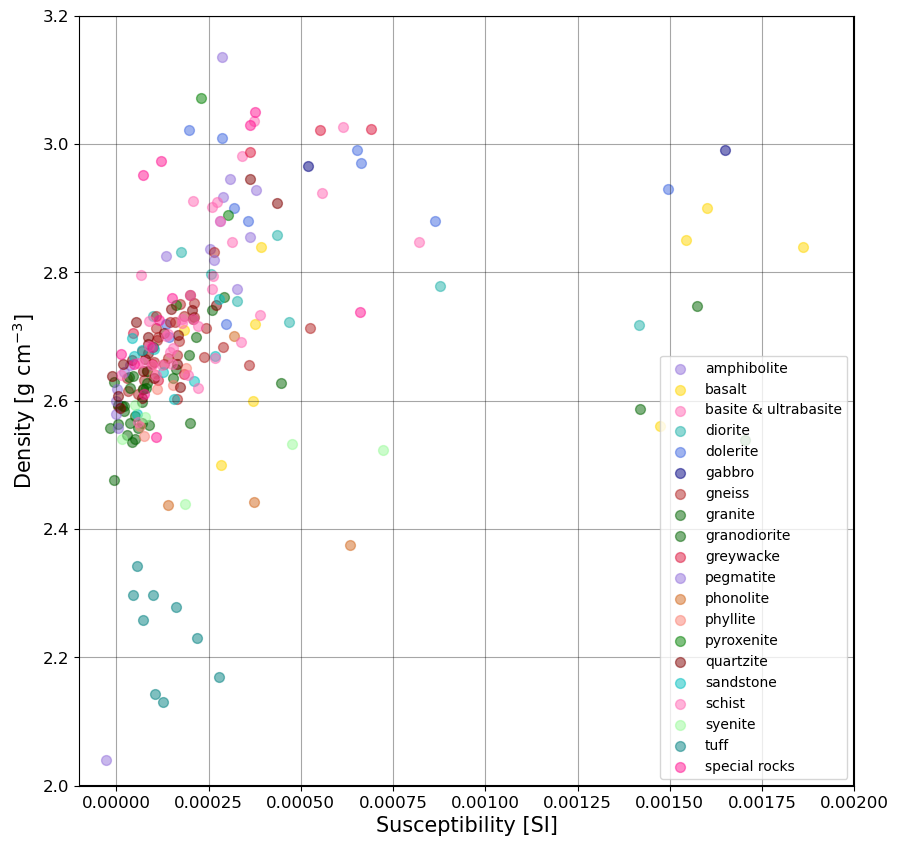

In [63]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)

NAPA_amphibolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
    label="amphibolite",
)
NAPA_Basalt_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="gold",
    alpha=0.5,
    label="basalt",
)
NAPA_Basite_and_ultrabasite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
    label="basite & ultrabasite",
)
NAPA_Diorit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="lightseagreen",
    alpha=0.5,
    label="diorite",
)
NAPA_Dolerite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="royalblue",
    alpha=0.5,
    label="dolerite",
)
NAPA_Gabbro_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="navy",
    alpha=0.5,
    label="gabbro",
)
NAPA_Gneis_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="firebrick",
    alpha=0.5,
    label="gneiss",
)
NAPA_Granite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
    label="granite",
)
NAPA_Granodiorite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="darkgreen",
    alpha=0.5,
    label="granodiorite",
)
NAPA_Grauwacke_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="crimson",
    alpha=0.5,
    label="greywacke",
)
NAPA_Pegmatite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="mediumpurple",
    alpha=0.5,
    label="pegmatite",
)
NAPA_Phonolite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="chocolate",
    alpha=0.5,
    label="phonolite",
)
NAPA_Phyllit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="salmon",
    alpha=0.5,
    label="phyllite",
)
NAPA_Pyroxenit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="green",
    alpha=0.5,
    label="pyroxenite",
)
NAPA_Quarzit_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="maroon",
    alpha=0.5,
    label="quartzite",
)
NAPA_Sandstone_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="c",
    alpha=0.5,
    label="sandstone",
)
NAPA_schist_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="hotpink",
    alpha=0.5,
    label="schist",
)
NAPA_Syenite_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="palegreen",
    alpha=0.5,
    label="syenite",
)
NAPA_Tuff_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="teal",
    alpha=0.5,
    label="tuff",
)
NAPA_Spectail_rocks_df.plot(
    kind="scatter",
    ax=ax1,
    x="susceptibility average [10-3 SI]",
    y="density [g/cm^3]",
    marker="o",
    s=50,
    c="deeppink",
    alpha=0.5,
    label="special rocks",
)

ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
ax1.set_xlim([-0.0001, 0.002])
ax1.set_ylim([2, 3.2])
plt.savefig(
    export_fig_path_NAPA + "sus_dens_plot_rock_type_colored_error_bars_zoomed.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

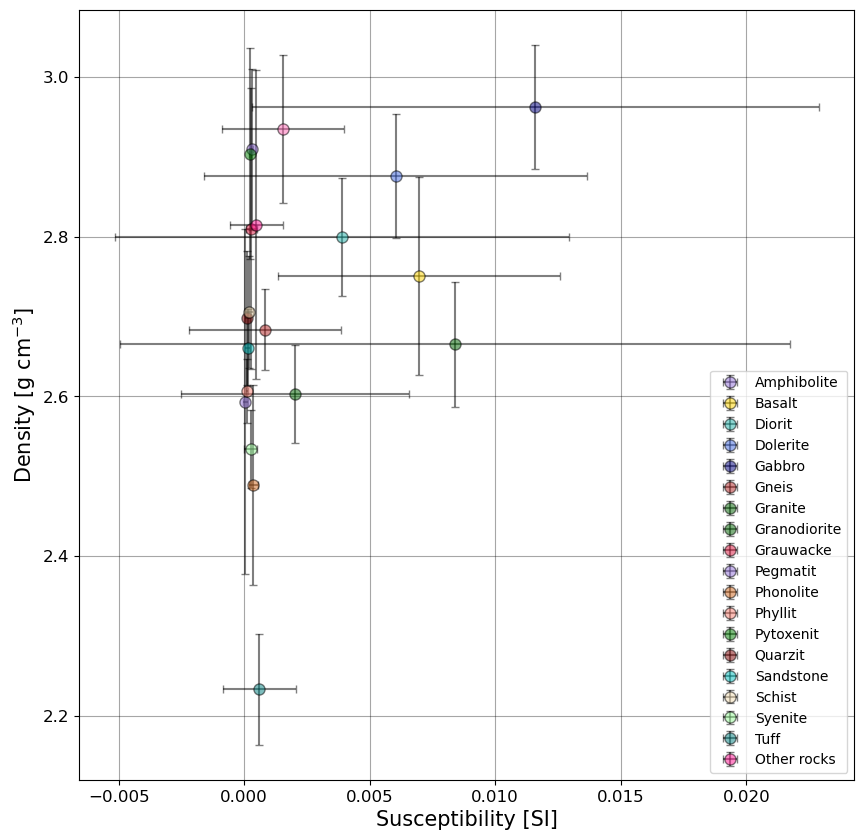

In [64]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


plt.errorbar(
    NAPA_amphibolite_sus_mean,
    NAPA_amphibolite_density_mean,
    xerr=NAPA_amphibolite_sus_std,
    yerr=NAPA_amphibolite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="mediumpurple",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Amphibolite",
)


plt.errorbar(
    NAPA_Basalt_sus_mean,
    NAPA_Basalt_density_mean,
    xerr=NAPA_Basalt_sus_std,
    yerr=NAPA_Basalt_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="gold",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Basalt",
)


plt.errorbar(
    NAPA_Basite_and_ultrabasite_sus_mean,
    NAPA_Basite_and_ultrabasite_density_mean,
    xerr=NAPA_Basite_and_ultrabasite_sus_std,
    yerr=NAPA_Basite_and_ultrabasite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="hotpink",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
)


plt.errorbar(
    NAPA_Diorit_sus_mean,
    NAPA_Diorit_density_mean,
    xerr=NAPA_Diorit_sus_std,
    yerr=NAPA_Diorit_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="lightseagreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Diorit",
)


plt.errorbar(
    NAPA_Dolerite_sus_mean,
    NAPA_Dolerite_density_mean,
    xerr=NAPA_Dolerite_sus_std,
    yerr=NAPA_Dolerite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="royalblue",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Dolerite",
)


plt.errorbar(
    NAPA_Gabbro_sus_mean,
    NAPA_Gabbro_density_mean,
    xerr=NAPA_Gabbro_sus_std,
    yerr=NAPA_Gabbro_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="navy",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Gabbro",
)


plt.errorbar(
    NAPA_Gneis_sus_mean,
    NAPA_Gneis_density_mean,
    xerr=NAPA_Gneis_sus_std,
    yerr=NAPA_Gneis_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="firebrick",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Gneis",
)


plt.errorbar(
    NAPA_Granite_sus_mean,
    NAPA_Granite_density_mean,
    xerr=NAPA_Granite_sus_std,
    yerr=NAPA_Granite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="darkgreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Granite",
)


plt.errorbar(
    NAPA_Granodiorite_sus_mean,
    NAPA_Granodiorite_density_mean,
    xerr=NAPA_Granodiorite_sus_std,
    yerr=NAPA_Granodiorite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="darkgreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Granodiorite",
)


plt.errorbar(
    NAPA_Grauwacke_sus_mean,
    NAPA_Grauwacke_density_mean,
    xerr=NAPA_Grauwacke_sus_std,
    yerr=NAPA_Grauwacke_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="crimson",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Grauwacke",
)


plt.errorbar(
    NAPA_Pegmatite_sus_mean,
    NAPA_Pegmatite_density_mean,
    xerr=NAPA_Pegmatite_sus_std,
    yerr=NAPA_Pegmatite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="mediumpurple",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Pegmatit",
)


plt.errorbar(
    NAPA_Phonolite_sus_mean,
    NAPA_Phonolite_density_mean,
    xerr=NAPA_Phonolite_sus_std,
    yerr=NAPA_Phonolite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="chocolate",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Phonolite",
)


plt.errorbar(
    NAPA_Phyllit_sus_mean,
    NAPA_Phyllit_density_mean,
    xerr=NAPA_Phyllit_sus_std,
    yerr=NAPA_Phyllit_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="salmon",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Phyllit",
)


plt.errorbar(
    NAPA_Pyroxenit_sus_mean,
    NAPA_Pyroxenit_density_mean,
    xerr=NAPA_Pyroxenit_sus_std,
    yerr=NAPA_Pyroxenit_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="green",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Pytoxenit",
)


plt.errorbar(
    NAPA_Quarzit_sus_mean,
    NAPA_Quarzit_density_mean,
    xerr=NAPA_Quarzit_sus_std,
    yerr=NAPA_Quarzit_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="maroon",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Quarzit",
)


plt.errorbar(
    NAPA_Sandstone_sus_mean,
    NAPA_Sandstone_density_mean,
    xerr=NAPA_Sandstone_sus_std,
    yerr=NAPA_Sandstone_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="c",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Sandstone",
)


plt.errorbar(
    NAPA_schist_sus_mean,
    NAPA_schist_density_mean,
    xerr=NAPA_schist_sus_std,
    yerr=NAPA_schist_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="wheat",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Schist",
)


plt.errorbar(
    NAPA_Syenite_sus_mean,
    NAPA_Syenite_density_mean,
    xerr=NAPA_Syenite_sus_std,
    yerr=NAPA_Syenite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="palegreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Syenite",
)


plt.errorbar(
    NAPA_Tuff_sus_mean,
    NAPA_Tuff_density_mean,
    xerr=NAPA_Tuff_sus_std,
    yerr=NAPA_Tuff_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="teal",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Tuff",
)


plt.errorbar(
    NAPA_Spectail_rocks_sus_mean,
    NAPA_Spectail_rocks_density_mean,
    xerr=NAPA_Spectail_rocks_sus_std,
    yerr=NAPA_Spectail_rocks_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="deeppink",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Other rocks",
)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
plt.savefig(
    export_fig_path_NAPA + "sus_dens_error_bars_plot_rock_type_colored.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

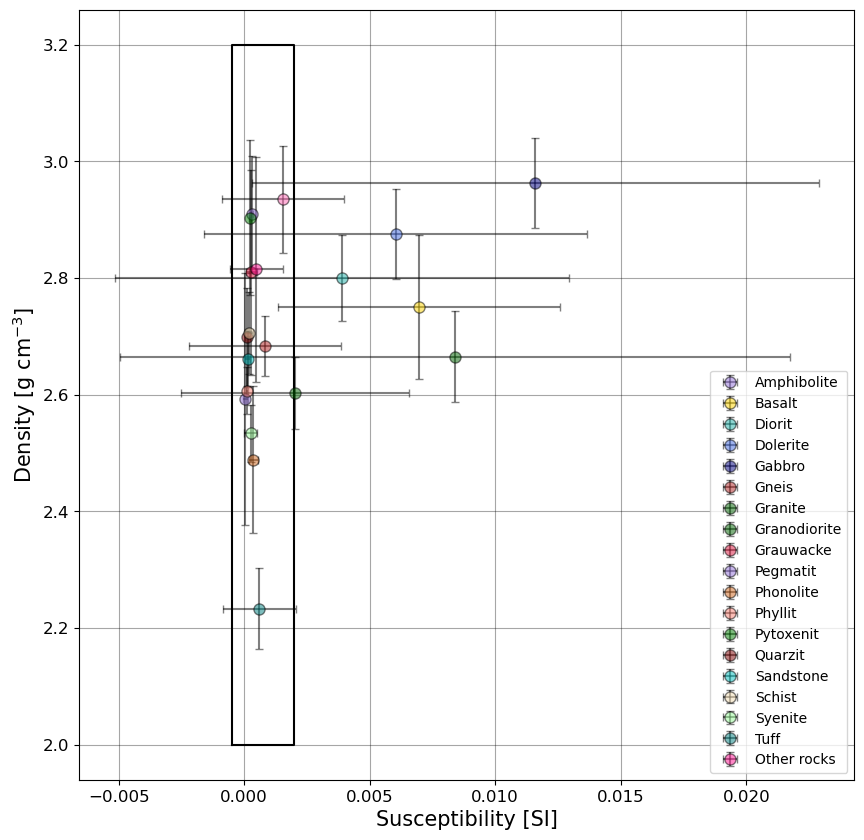

In [65]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


plt.errorbar(
    NAPA_amphibolite_sus_mean,
    NAPA_amphibolite_density_mean,
    xerr=NAPA_amphibolite_sus_std,
    yerr=NAPA_amphibolite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="mediumpurple",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Amphibolite",
)


plt.errorbar(
    NAPA_Basalt_sus_mean,
    NAPA_Basalt_density_mean,
    xerr=NAPA_Basalt_sus_std,
    yerr=NAPA_Basalt_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="gold",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Basalt",
)


plt.errorbar(
    NAPA_Basite_and_ultrabasite_sus_mean,
    NAPA_Basite_and_ultrabasite_density_mean,
    xerr=NAPA_Basite_and_ultrabasite_sus_std,
    yerr=NAPA_Basite_and_ultrabasite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="hotpink",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
)


plt.errorbar(
    NAPA_Diorit_sus_mean,
    NAPA_Diorit_density_mean,
    xerr=NAPA_Diorit_sus_std,
    yerr=NAPA_Diorit_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="lightseagreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Diorit",
)


plt.errorbar(
    NAPA_Dolerite_sus_mean,
    NAPA_Dolerite_density_mean,
    xerr=NAPA_Dolerite_sus_std,
    yerr=NAPA_Dolerite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="royalblue",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Dolerite",
)


plt.errorbar(
    NAPA_Gabbro_sus_mean,
    NAPA_Gabbro_density_mean,
    xerr=NAPA_Gabbro_sus_std,
    yerr=NAPA_Gabbro_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="navy",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Gabbro",
)


plt.errorbar(
    NAPA_Gneis_sus_mean,
    NAPA_Gneis_density_mean,
    xerr=NAPA_Gneis_sus_std,
    yerr=NAPA_Gneis_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="firebrick",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Gneis",
)


plt.errorbar(
    NAPA_Granite_sus_mean,
    NAPA_Granite_density_mean,
    xerr=NAPA_Granite_sus_std,
    yerr=NAPA_Granite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="darkgreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Granite",
)


plt.errorbar(
    NAPA_Granodiorite_sus_mean,
    NAPA_Granodiorite_density_mean,
    xerr=NAPA_Granodiorite_sus_std,
    yerr=NAPA_Granodiorite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="darkgreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Granodiorite",
)


plt.errorbar(
    NAPA_Grauwacke_sus_mean,
    NAPA_Grauwacke_density_mean,
    xerr=NAPA_Grauwacke_sus_std,
    yerr=NAPA_Grauwacke_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="crimson",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Grauwacke",
)


plt.errorbar(
    NAPA_Pegmatite_sus_mean,
    NAPA_Pegmatite_density_mean,
    xerr=NAPA_Pegmatite_sus_std,
    yerr=NAPA_Pegmatite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="mediumpurple",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Pegmatit",
)


plt.errorbar(
    NAPA_Phonolite_sus_mean,
    NAPA_Phonolite_density_mean,
    xerr=NAPA_Phonolite_sus_std,
    yerr=NAPA_Phonolite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="chocolate",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Phonolite",
)


plt.errorbar(
    NAPA_Phyllit_sus_mean,
    NAPA_Phyllit_density_mean,
    xerr=NAPA_Phyllit_sus_std,
    yerr=NAPA_Phyllit_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="salmon",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Phyllit",
)


plt.errorbar(
    NAPA_Pyroxenit_sus_mean,
    NAPA_Pyroxenit_density_mean,
    xerr=NAPA_Pyroxenit_sus_std,
    yerr=NAPA_Pyroxenit_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="green",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Pytoxenit",
)


plt.errorbar(
    NAPA_Quarzit_sus_mean,
    NAPA_Quarzit_density_mean,
    xerr=NAPA_Quarzit_sus_std,
    yerr=NAPA_Quarzit_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="maroon",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Quarzit",
)


plt.errorbar(
    NAPA_Sandstone_sus_mean,
    NAPA_Sandstone_density_mean,
    xerr=NAPA_Sandstone_sus_std,
    yerr=NAPA_Sandstone_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="c",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Sandstone",
)


plt.errorbar(
    NAPA_schist_sus_mean,
    NAPA_schist_density_mean,
    xerr=NAPA_schist_sus_std,
    yerr=NAPA_schist_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="wheat",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Schist",
)


plt.errorbar(
    NAPA_Syenite_sus_mean,
    NAPA_Syenite_density_mean,
    xerr=NAPA_Syenite_sus_std,
    yerr=NAPA_Syenite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="palegreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Syenite",
)


plt.errorbar(
    NAPA_Tuff_sus_mean,
    NAPA_Tuff_density_mean,
    xerr=NAPA_Tuff_sus_std,
    yerr=NAPA_Tuff_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="teal",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Tuff",
)


plt.errorbar(
    NAPA_Spectail_rocks_sus_mean,
    NAPA_Spectail_rocks_density_mean,
    xerr=NAPA_Spectail_rocks_sus_std,
    yerr=NAPA_Spectail_rocks_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="deeppink",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Other rocks",
)


ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")

plt.savefig(
    export_fig_path_NAPA + "sus_dens_error_bars_plot_rock_type_colored_zoom_area.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)

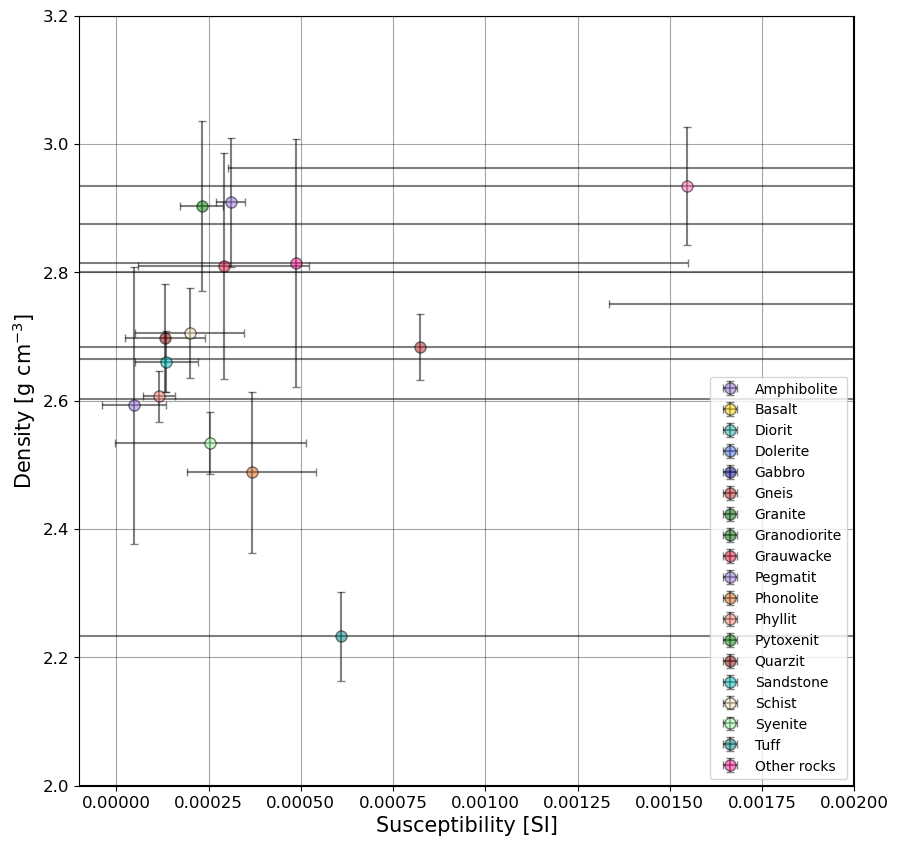

In [66]:
# density suceptibility relationship

figure2 = plt.figure(figsize=(10, 10), facecolor="white")
ax1 = plt.subplot(1, 1, 1)


plt.errorbar(
    NAPA_amphibolite_sus_mean,
    NAPA_amphibolite_density_mean,
    xerr=NAPA_amphibolite_sus_std,
    yerr=NAPA_amphibolite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="mediumpurple",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Amphibolite",
)


plt.errorbar(
    NAPA_Basalt_sus_mean,
    NAPA_Basalt_density_mean,
    xerr=NAPA_Basalt_sus_std,
    yerr=NAPA_Basalt_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="gold",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Basalt",
)


plt.errorbar(
    NAPA_Basite_and_ultrabasite_sus_mean,
    NAPA_Basite_and_ultrabasite_density_mean,
    xerr=NAPA_Basite_and_ultrabasite_sus_std,
    yerr=NAPA_Basite_and_ultrabasite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="hotpink",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
)


plt.errorbar(
    NAPA_Diorit_sus_mean,
    NAPA_Diorit_density_mean,
    xerr=NAPA_Diorit_sus_std,
    yerr=NAPA_Diorit_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="lightseagreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Diorit",
)


plt.errorbar(
    NAPA_Dolerite_sus_mean,
    NAPA_Dolerite_density_mean,
    xerr=NAPA_Dolerite_sus_std,
    yerr=NAPA_Dolerite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="royalblue",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Dolerite",
)


plt.errorbar(
    NAPA_Gabbro_sus_mean,
    NAPA_Gabbro_density_mean,
    xerr=NAPA_Gabbro_sus_std,
    yerr=NAPA_Gabbro_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="navy",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Gabbro",
)


plt.errorbar(
    NAPA_Gneis_sus_mean,
    NAPA_Gneis_density_mean,
    xerr=NAPA_Gneis_sus_std,
    yerr=NAPA_Gneis_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="firebrick",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Gneis",
)


plt.errorbar(
    NAPA_Granite_sus_mean,
    NAPA_Granite_density_mean,
    xerr=NAPA_Granite_sus_std,
    yerr=NAPA_Granite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="darkgreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Granite",
)


plt.errorbar(
    NAPA_Granodiorite_sus_mean,
    NAPA_Granodiorite_density_mean,
    xerr=NAPA_Granodiorite_sus_std,
    yerr=NAPA_Granodiorite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="darkgreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Granodiorite",
)


plt.errorbar(
    NAPA_Grauwacke_sus_mean,
    NAPA_Grauwacke_density_mean,
    xerr=NAPA_Grauwacke_sus_std,
    yerr=NAPA_Grauwacke_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="crimson",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Grauwacke",
)


plt.errorbar(
    NAPA_Pegmatite_sus_mean,
    NAPA_Pegmatite_density_mean,
    xerr=NAPA_Pegmatite_sus_std,
    yerr=NAPA_Pegmatite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="mediumpurple",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Pegmatit",
)


plt.errorbar(
    NAPA_Phonolite_sus_mean,
    NAPA_Phonolite_density_mean,
    xerr=NAPA_Phonolite_sus_std,
    yerr=NAPA_Phonolite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="chocolate",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Phonolite",
)


plt.errorbar(
    NAPA_Phyllit_sus_mean,
    NAPA_Phyllit_density_mean,
    xerr=NAPA_Phyllit_sus_std,
    yerr=NAPA_Phyllit_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="salmon",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Phyllit",
)


plt.errorbar(
    NAPA_Pyroxenit_sus_mean,
    NAPA_Pyroxenit_density_mean,
    xerr=NAPA_Pyroxenit_sus_std,
    yerr=NAPA_Pyroxenit_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="green",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Pytoxenit",
)


plt.errorbar(
    NAPA_Quarzit_sus_mean,
    NAPA_Quarzit_density_mean,
    xerr=NAPA_Quarzit_sus_std,
    yerr=NAPA_Quarzit_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="maroon",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Quarzit",
)


plt.errorbar(
    NAPA_Sandstone_sus_mean,
    NAPA_Sandstone_density_mean,
    xerr=NAPA_Sandstone_sus_std,
    yerr=NAPA_Sandstone_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="c",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Sandstone",
)


plt.errorbar(
    NAPA_schist_sus_mean,
    NAPA_schist_density_mean,
    xerr=NAPA_schist_sus_std,
    yerr=NAPA_schist_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="wheat",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Schist",
)


plt.errorbar(
    NAPA_Syenite_sus_mean,
    NAPA_Syenite_density_mean,
    xerr=NAPA_Syenite_sus_std,
    yerr=NAPA_Syenite_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="palegreen",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Syenite",
)


plt.errorbar(
    NAPA_Tuff_sus_mean,
    NAPA_Tuff_density_mean,
    xerr=NAPA_Tuff_sus_std,
    yerr=NAPA_Tuff_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="teal",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Tuff",
)


plt.errorbar(
    NAPA_Spectail_rocks_sus_mean,
    NAPA_Spectail_rocks_density_mean,
    xerr=NAPA_Spectail_rocks_sus_std,
    yerr=NAPA_Spectail_rocks_density_std,
    fmt="ko",
    markersize=8,
    markerfacecolor="deeppink",
    markeredgecolor="k",
    capsize=3,
    alpha=0.5,
    label="Other rocks",
)


ax1.plot(zoom_x, zoom_y, "k", linewidth=1.5)


ax1.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.35)
ax1.set_xlabel("Susceptibility [SI]", fontsize=15)
ax1.set_ylabel("Density [g cm$^{-3}$]", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right")
ax1.set_xlim([-0.0001, 0.002])
ax1.set_ylim([2, 3.2])

plt.savefig(
    export_fig_path_NAPA + "sus_dens_error_bars_plot_rock_type_colored_zoomed.png",
    facecolor=figure1.get_facecolor(),
    transparent=True,
)